# ELITE exome data

In [1]:
# install.packages("tidyverse")
# install.packages("labeling",repos = "cran")
# install.packages("ggplot2",dependencies = T)
# install.packages("ggpointdensity",lib="~/R/packages3.5/",dependencies=T)
library(labeling,lib.loc = "~/R/packages3.5")
library(ggplot2,lib.loc = "~/R/packages3.5")
library(data.table)
library(labeling)
library(ggplot2)
library(ggpointdensity,lib.loc = "~/R/packages3.5")
suppressPackageStartupMessages(library(qqman))
library(corrplot)

corrplot 0.84 loaded


## Parse annotation info (skip if output file already exists - this is slow)

In [ ]:
install.packages("hash")
library(parallel);library(hash)
# helper functions for reading and filtering the annotation data
my.read.lines2=function(fname) {
 s = file.info( fname )$size 
 buf = readChar( fname, s, useBytes=T)
 strsplit( buf,"\n",fixed=T,useBytes=T)[[1]]
}
filter_line_by_hashkeys<-function(line,cols,sep_read="\t",sep_id=":",ids_hash){
    arr=strsplit(line,split=sep_read)[[1]][cols]
    id = paste(arr,collapse=sep_id)
    return(has.key(id,ids_hash))
}
# read the data and limit to the gwasres annotations
annots_file = "/oak/stanford/groups/euan/projects/elite/ukbb_exome/variant_anno/variant_to_basic_annots.tsv"
# path to the overlapping variants between the two datasets
our_ids = fread("/oak/stanford/groups/euan/projects/elite/ukbb_exome/test_positions/shared_ukbb_elite_raw.txt",
               data.table=F,stringsAsFactors=F)
our_ids = our_ids[,1]

h = hash()
for(id in our_ids){h[id]=1}
annots = my.read.lines2(annots_file)
annots_to_keep = mclapply(annots,filter_line_by_hashkeys,cols=1:4,ids_hash=h,mc.cores=24)
annots_to_keep = unname(unlist(annots_to_keep))
annots_to_keep[1] = T
table(annots_to_keep)

annots2 = annots[annots_to_keep]
rm(annots);gc()

annots_split = sapply(annots2,strsplit,split="\t")
ls = sapply(annots_split,length)
annots_split = annots_split[ls==10]
annots_m = sapply(annots_split,function(x){x})
dim(annots_m)
annots_m = t(annots_m)
rownames(annots_m) = apply(annots_m[,1:4],1,paste,collapse=":")
colnames(annots_m) = annots_m[1,]
annots_m = annots_m[-1,]
annots_m = cbind(rownames(annots_m),annots_m)
rownames(annots_m) = NULL
colnames(annots_m)[1:6] = c("ID","CHROM","POS","REF","ALT","rsID")
head(annots_m)
fwrite(annots_m,
      file = "/oak/stanford/groups/euan/projects/elite/ukbb_exome/variant_anno/variant_to_basic_annots_filtered.tsv",
      sep="\t",row.names=F,col.names=T,quote=F)



Installing package into ‘/home/users/davidama/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
hash-2.2.6.1 provided by Decision Patterns


Attaching package: ‘hash’

The following object is masked from ‘package:data.table’:

    copy



In [2]:
annots_m = fread(
    "/oak/stanford/groups/euan/projects/elite/ukbb_exome/variant_anno/variant_to_basic_annots_filtered.tsv",
    data.table = F, stringsAsFactors=F)
rownames(annots_m) = annots_m[,1]
dim(annots_m)
head(annots_m)

Warning message in fread("/oak/stanford/groups/euan/projects/elite/ukbb_exome/variant_anno/variant_to_basic_annots_filtered.tsv", :
“Found and resolved improper quoting out-of-sample. First healed line 802: <<1:1753033:C:T	1	1753033	C	T	rs7407	ENSG00000008130	synonymous_variant	ENSP00000341679.5:p.Pro404=,ENSP00000344340.3:p.Pro404=,ENSP00000339727.5:p.Pro372=,ENSP00000367890.1:p.Pro549=	""	""DK>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”

[1] 253402     11

ID               CHROM POS    REF ALT   rsID       
1:69511:A:G      1:69511:A:G      1      69511 A   G     rs2691305  
1:925881:G:A     1:925881:G:A     1     925881 G   A     rs144896029
1:930314:C:T     1:930314:C:T     1     930314 C   T     rs9988179  
1:930358:A:G     1:930358:A:G     1     930358 A   G     rs139570490
1:931131:C:CCCCT 1:931131:C:CCCCT 1     931131 C   CCCCT rs375757231
1:935779:G:A     1:935779:G:A     1     935779 G   A     rs143282473
                 Gene            Consequence     
1:69511:A:G      ENSG00000186092 missense_variant
1:925881:G:A     ENSG00000187634 intron_variant  
1:930314:C:T     ENSG00000187634 missense_variant
1:930358:A:G     ENSG00000187634 intron_variant  
1:931131:C:CCCCT ENSG00000187634 intron_variant  
1:935779:G:A     ENSG00000187634 missense_variant
                 HGVSp                                                                                                                                                                                                                                                                                                                                                      
1:69511:A:G      ENSP00000334393.3:p.Thr141Ala,ENSP00000493376.2:p.Thr162Ala                                                                                                                                                                                                                                                                                                
1:925881:G:A                                                                                                                                                                                                                                                                                                                                                                
1:930314:C:T     ENSP00000349216.4:p.His2Tyr,ENSP00000342313.3:p.His78Tyr,ENSP00000411579.2:p.His257Tyr,ENSP00000393181.1:p.His78Tyr,ENSP00000478421.1:p.His78Tyr,ENSP00000484643.1:p.His78Tyr,ENSP00000482090.1:p.His78Tyr,ENSP00000480870.1:p.His78Tyr,ENSP00000480678.1:p.His78Tyr,ENSP00000484256.1:p.His78Tyr,ENSP00000484820.1:p.His78Tyr,ENSP00000482138.1:p.His78Tyr
1:930358:A:G                                                                                                                                                                                                                                                                                                                                                                
1:931131:C:CCCCT                                                                                                                                                                                                                                                                                                                                                            
1:935779:G:A     ENSP00000349216.4:p.Gly29Ser,ENSP00000342313.3:p.Gly105Ser,ENSP00000411579.2:p.Gly284Ser,ENSP00000393181.1:p.Gly105Ser,ENSP00000478421.1:p.Gly105Ser,ENSP00000484643.1:p.Gly105Ser,ENSP00000482090.1:p.Gly105Ser,ENSP00000480870.1:p.Gly88Ser,ENSP00000480678.1:p.Gly105Ser,ENSP00000484256.1:p.Gly105Ser,ENSP00000482138.1:p.Gly105Ser                    
                 LoF Gene_symbol
1:69511:A:G          OR4F5      
1:925881:G:A         SAMD11     
1:930314:C:T         SAMD11     
1:930358:A:G         SAMD11     
1:931131:C:CCCCT     SAMD11     
1:935779:G:A         SAMD11

# GWAS

In [3]:
add_annots<-function(res,annots){
    shared = intersect(rownames(res),rownames(annots))
    for(j in names(annots)){
        res[[j]] = NA
        res[shared,j] = annots[shared,j]
    }
    return(res)
}
parse_gwasres<-function(f,annots){
    gwasres = fread(f,data.table = F,stringsAsFactors = F)
    gwasres = gwasres[!is.na(gwasres$P),]
    rownames(gwasres) = gwasres$ID
    names(gwasres)[1] = "CHR"
    colnames(gwasres)[2] = "BP"
    gwasres$SNP = gwasres$ID
    gwasres = add_annots(gwasres,annots)
    return(gwasres)
}

setwd("/oak/stanford/groups/euan/projects/elite/ukbb_exome/")

# All EUs together

[1] "synonymous_variant"
[1] 22340    23


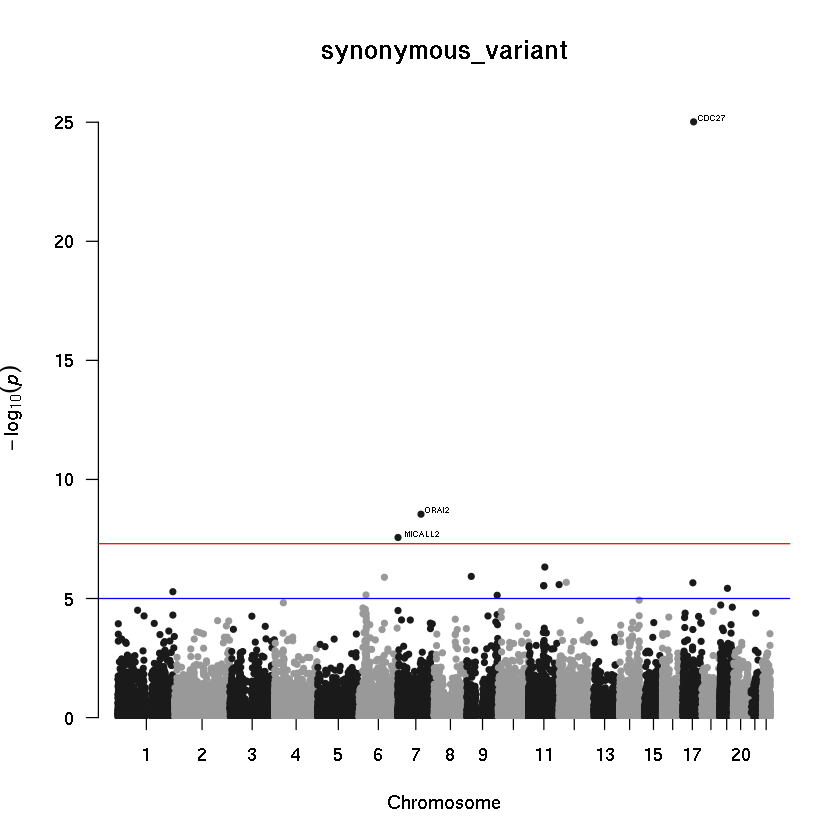

[1] "missense_variant"
[1] 22165    23


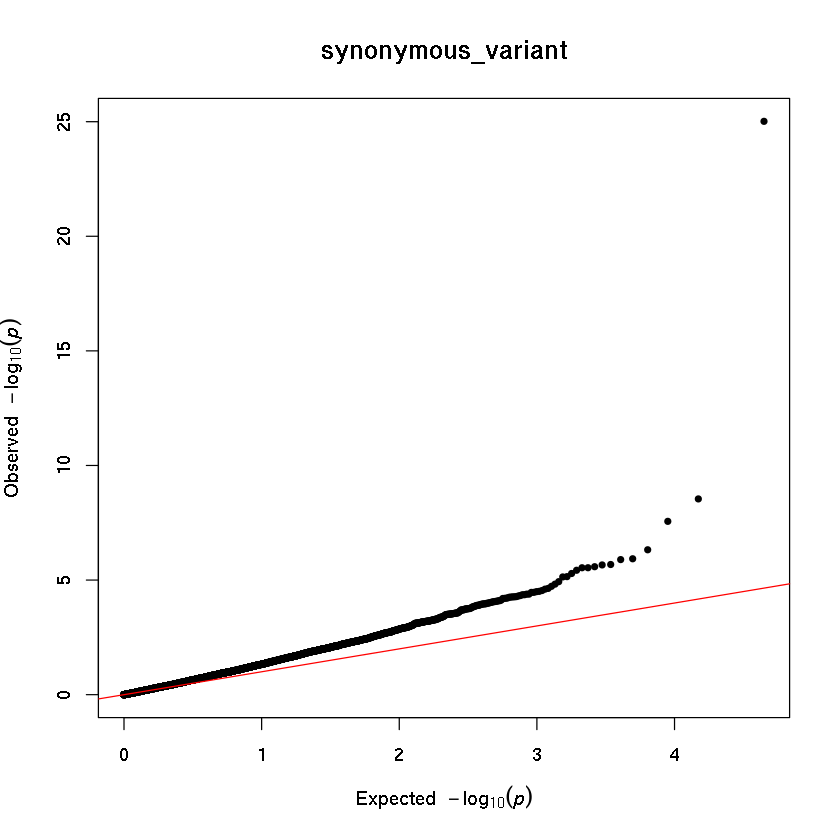

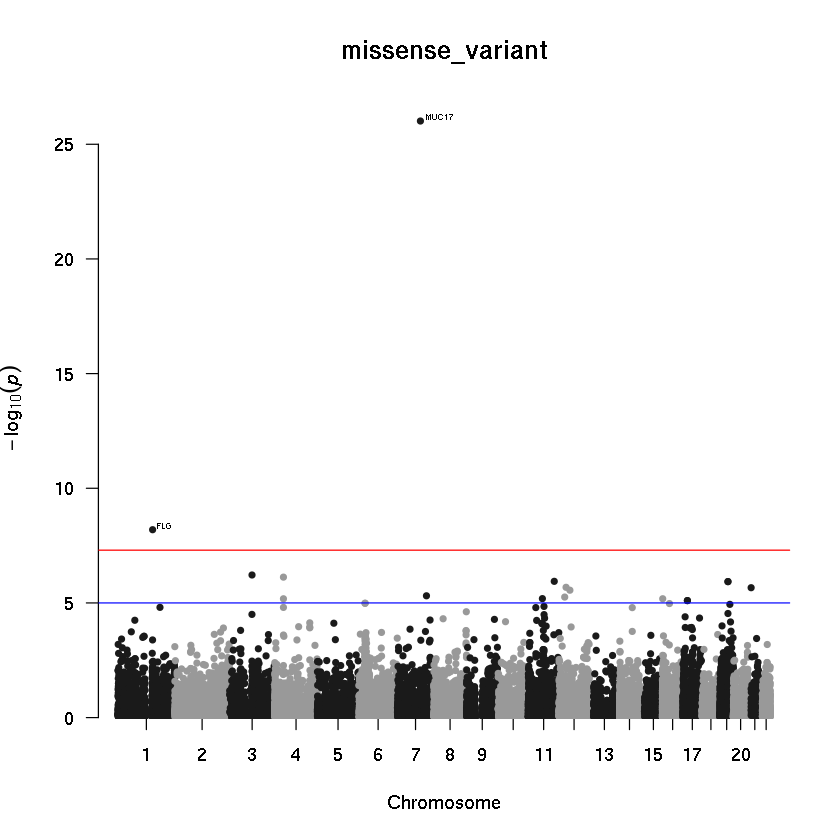

[1] "3_prime_UTR_variant"
[1] 6555   23


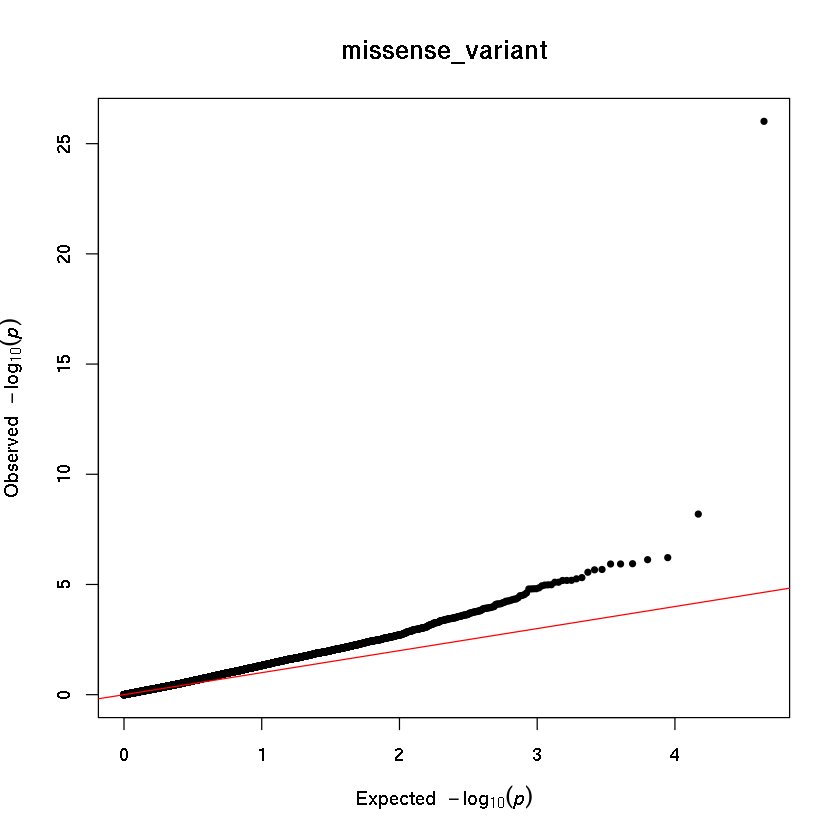

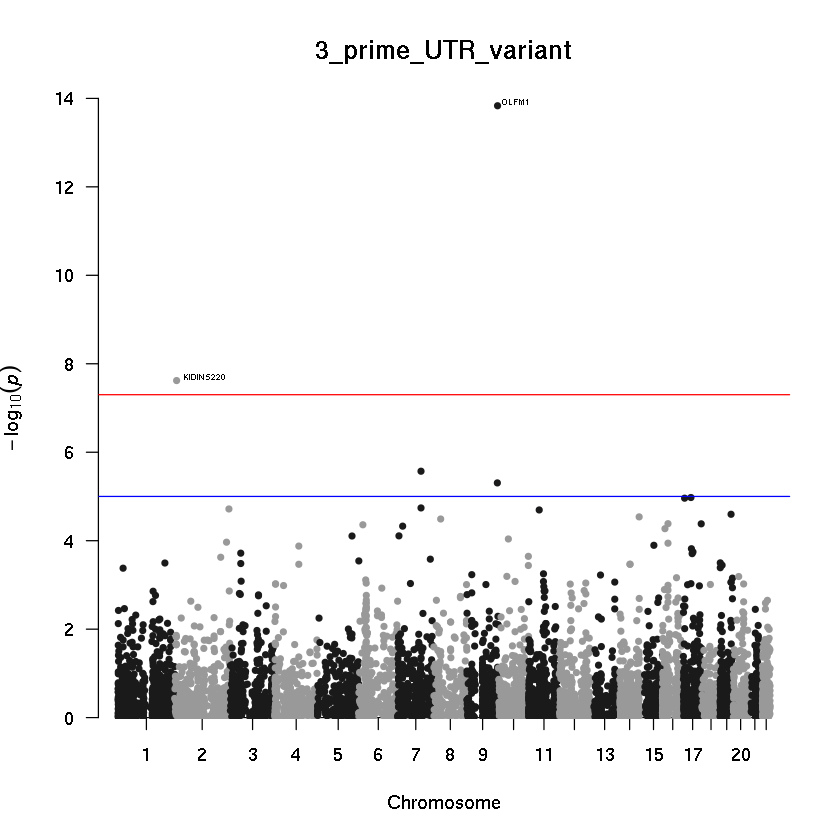

[1] "intron_variant"
[1] 31950    23


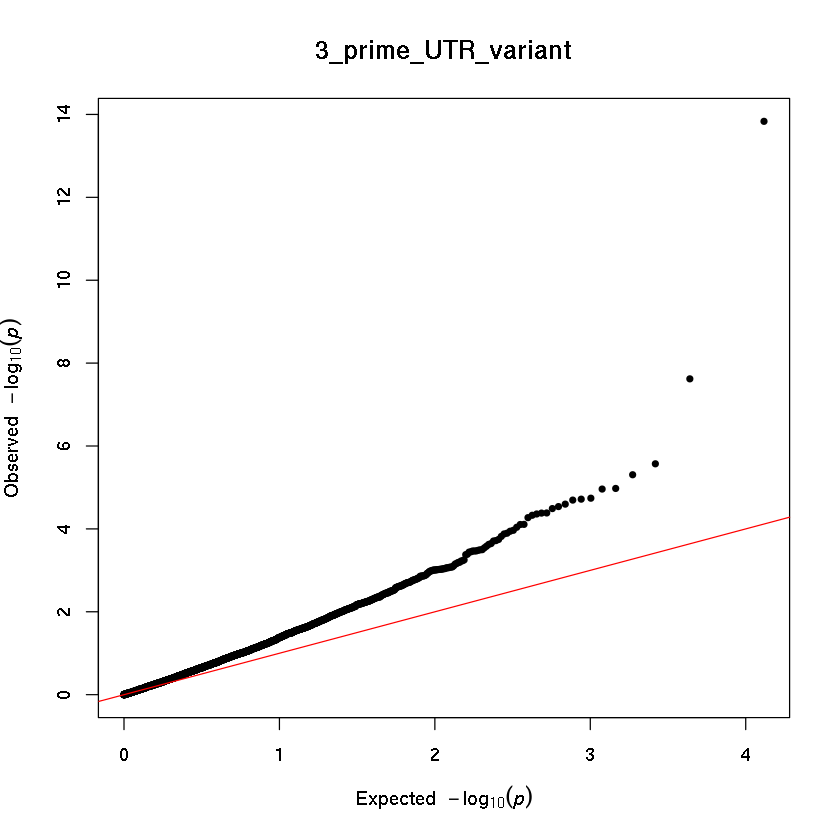

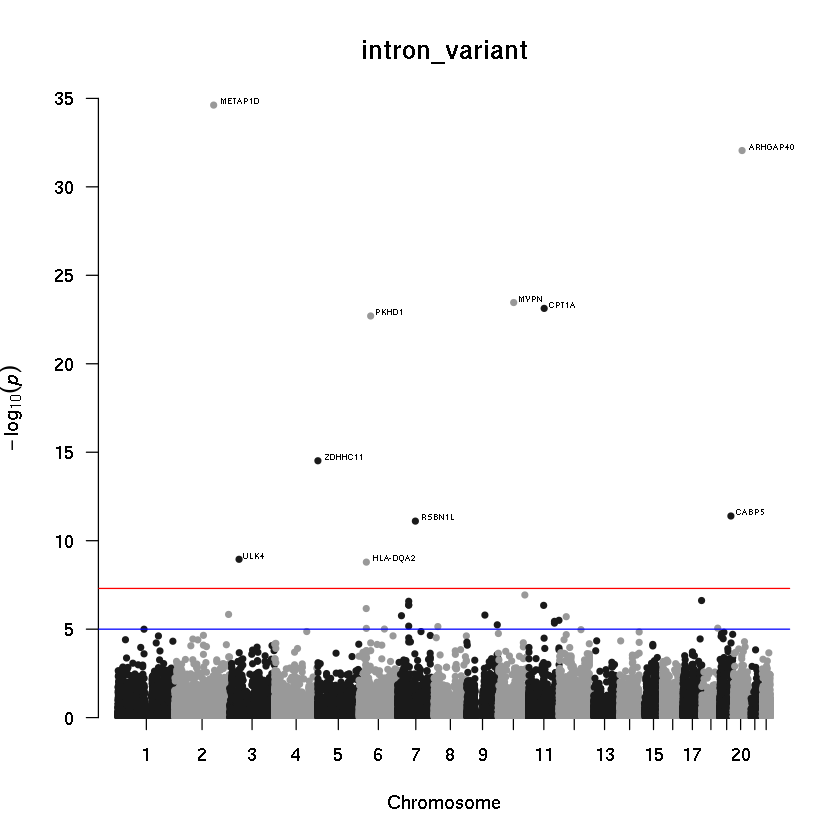

[1] "splice_region_variant"
[1] 3994   23


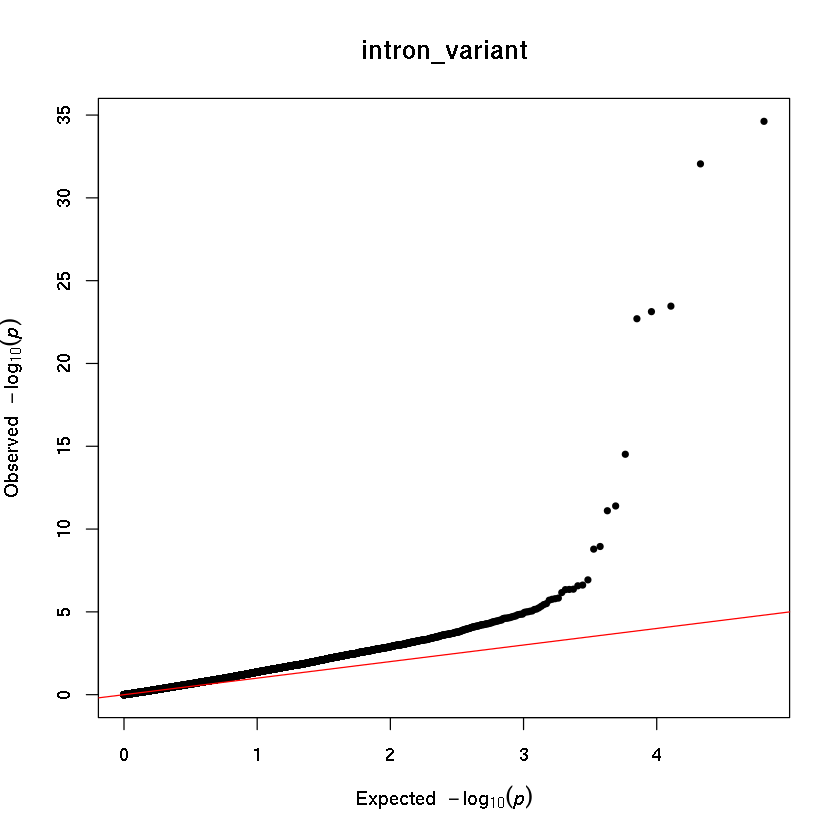

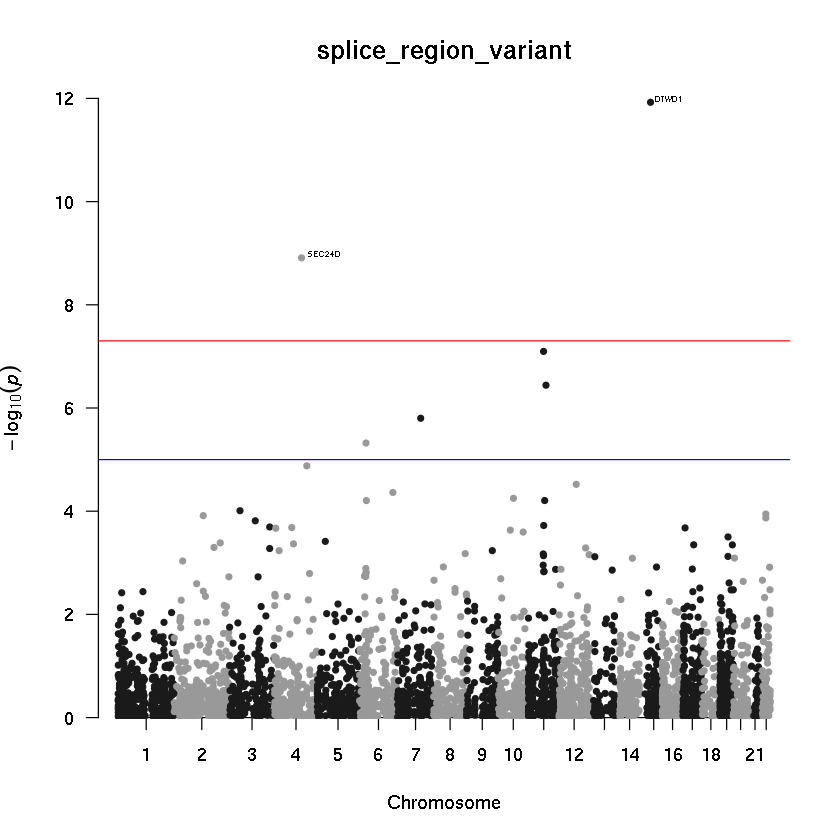

[1] "5_prime_UTR_variant"
[1] 3550   23


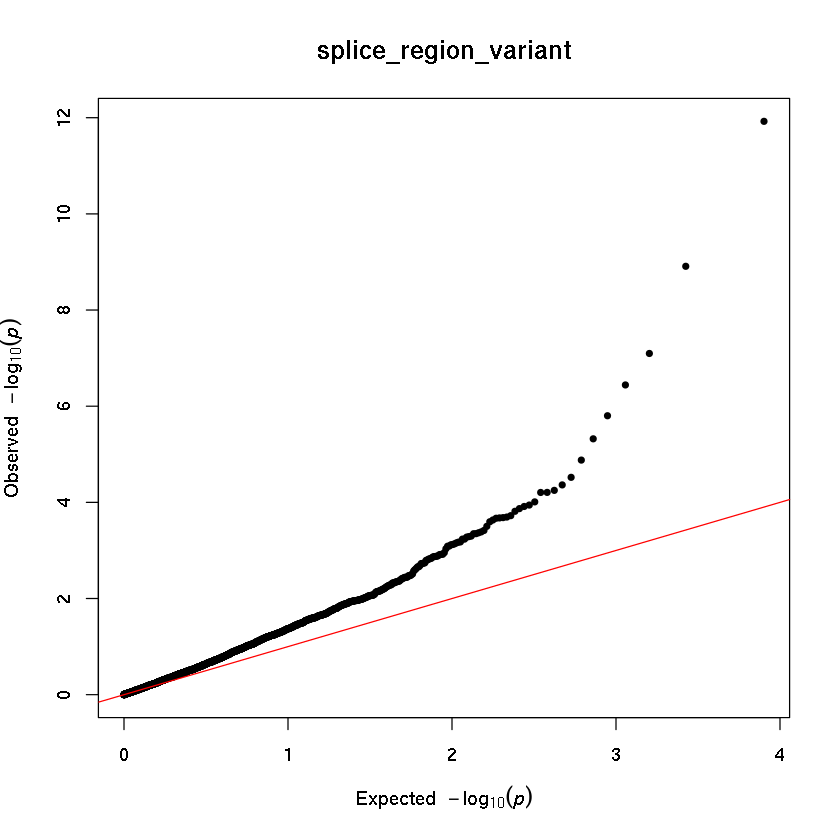

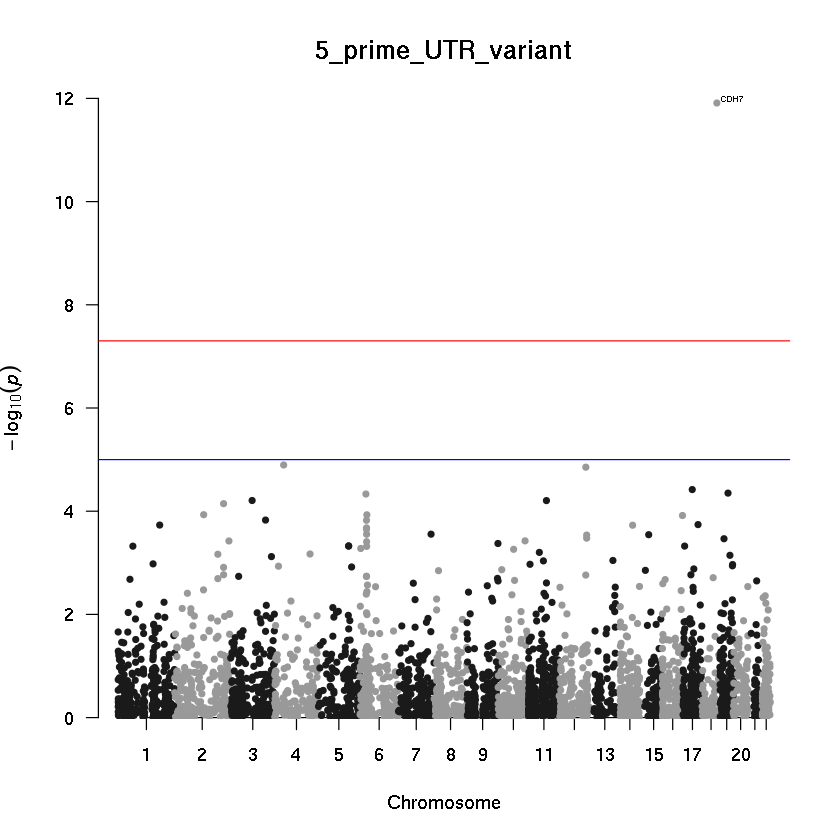

[1] "upstream_gene_variant"
[1] 251  23


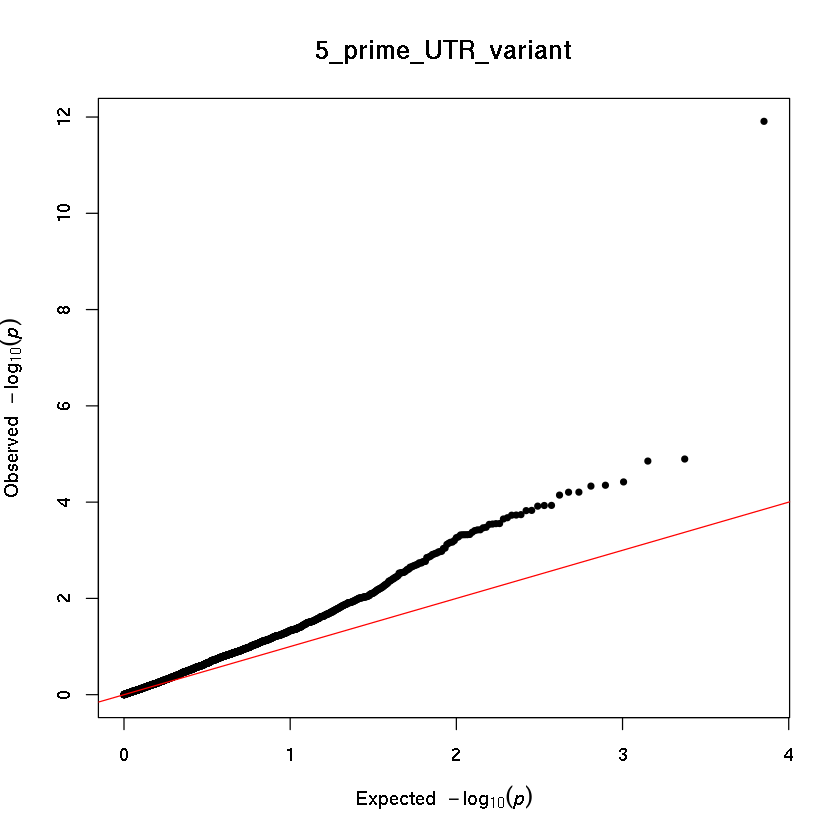

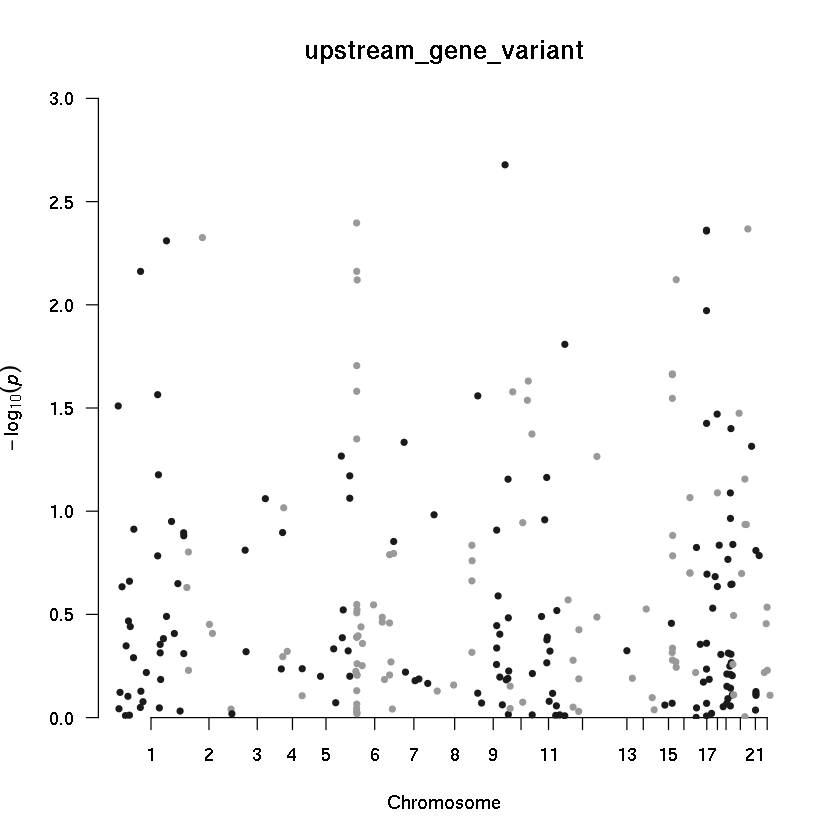

[1] "non_coding_transcript_exon_variant"
[1] 4592   23


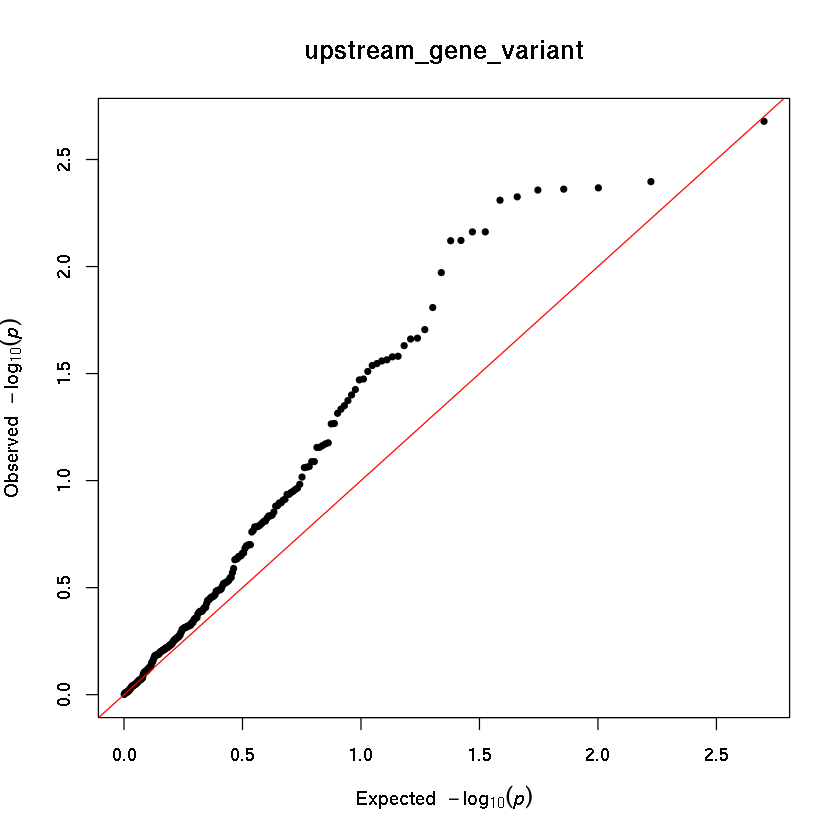

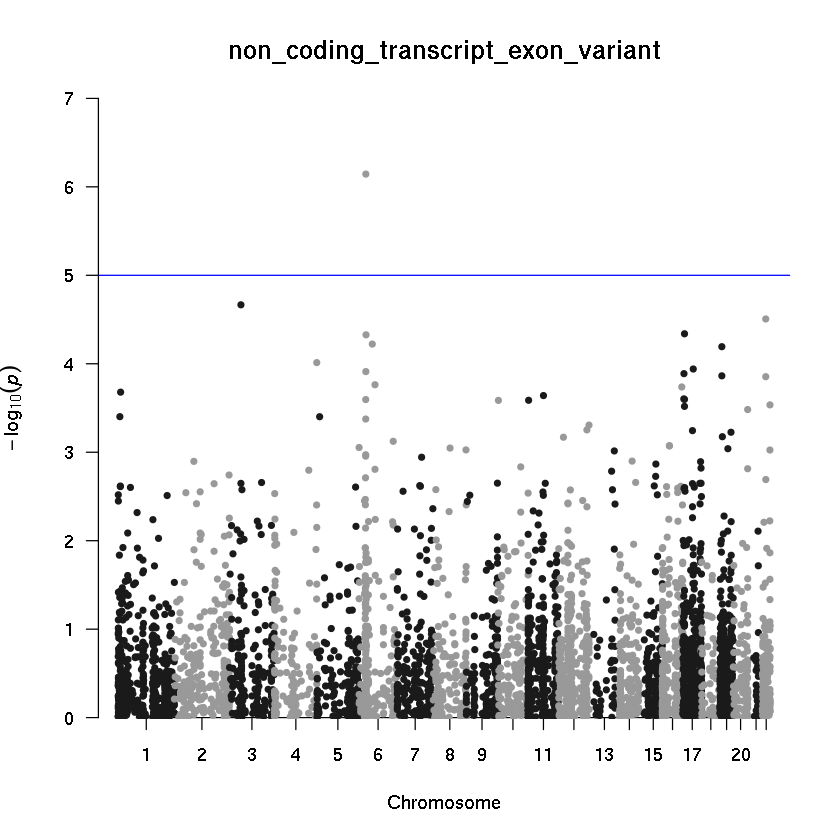

[1] "NA"
[1] 1515   23


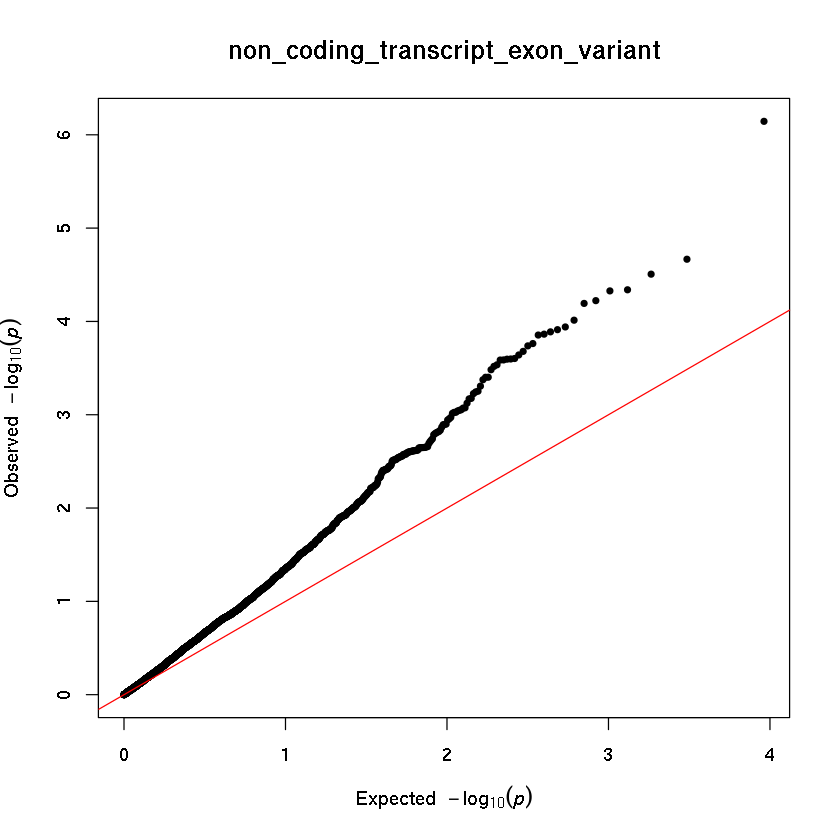

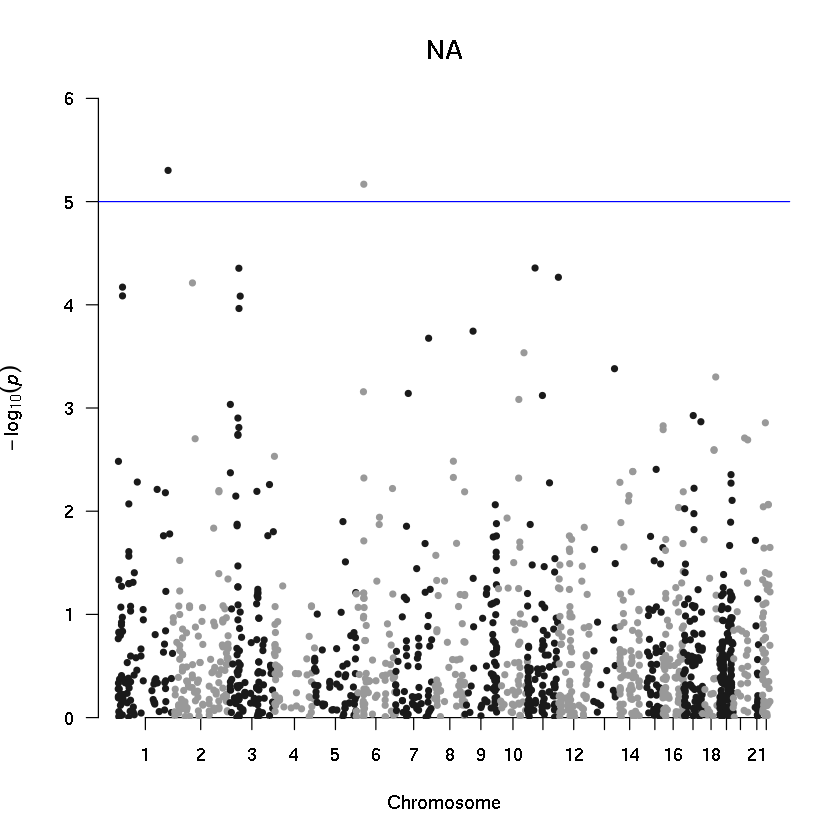

[1] "splice_acceptor_variant"
[1] 80 23


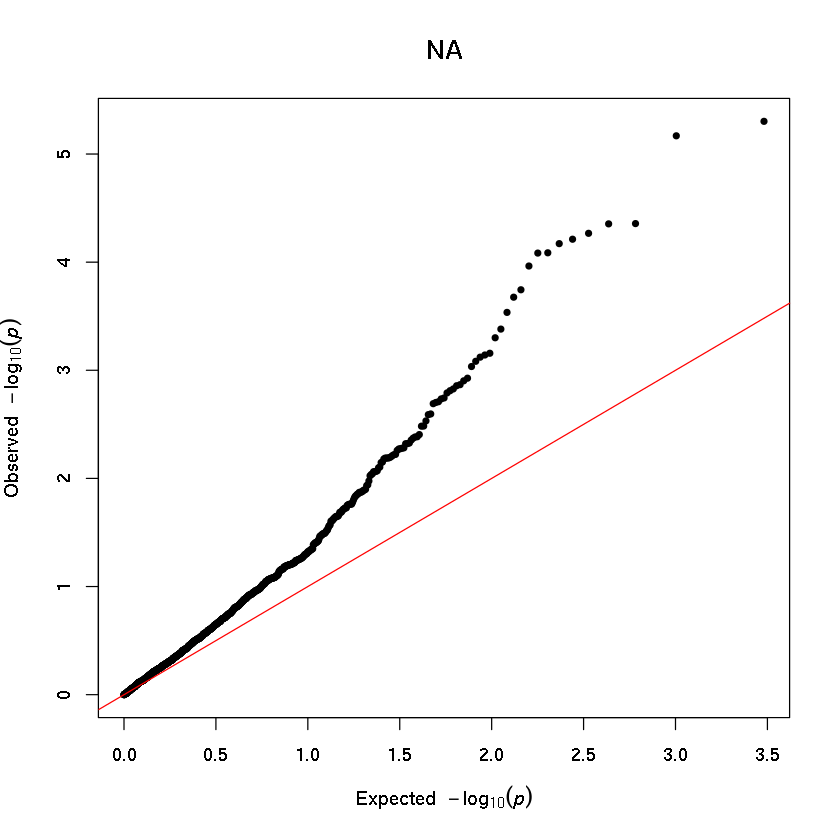

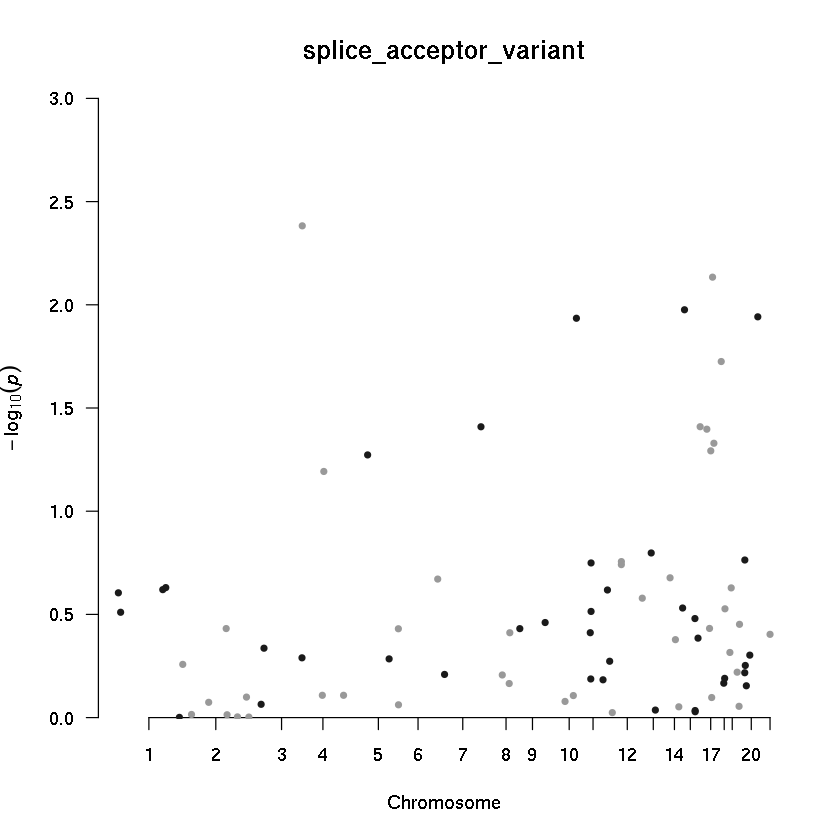

[1] "inframe_insertion"
[1] 102  23


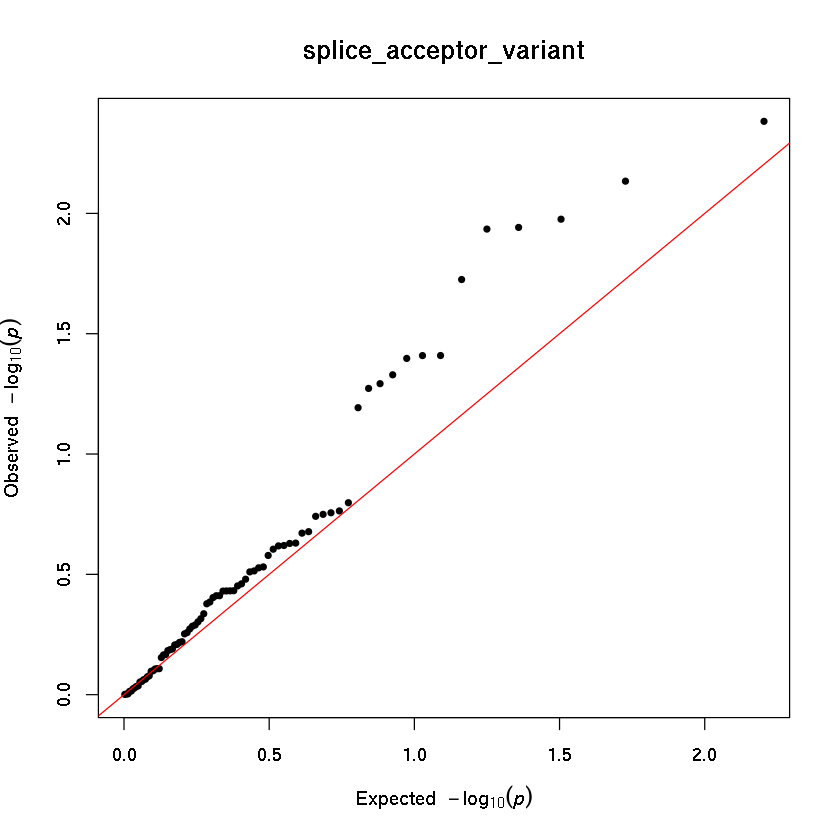

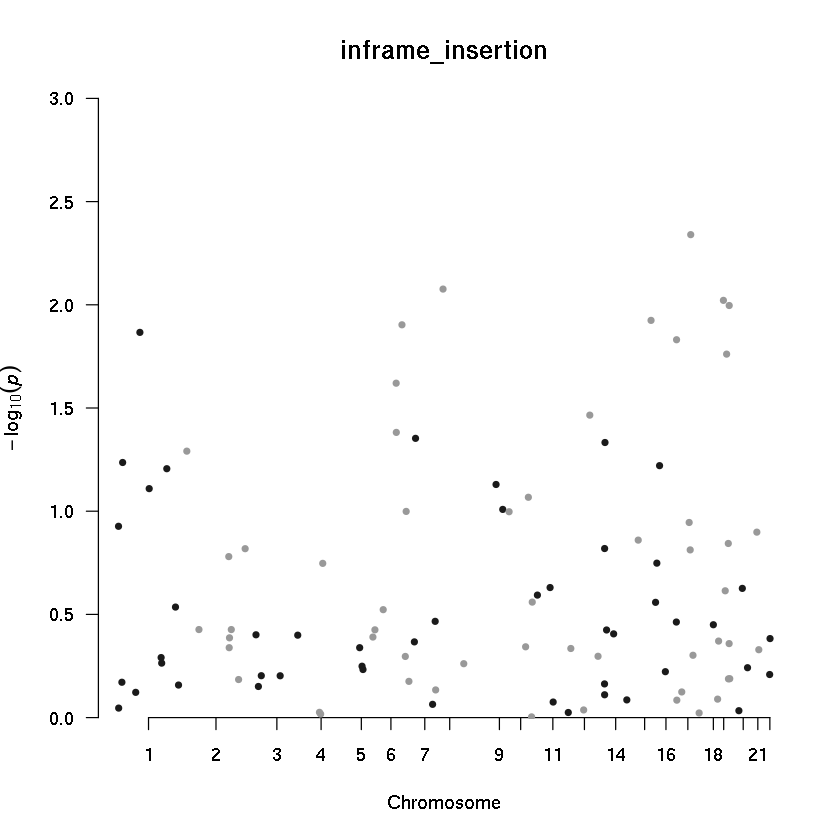

[1] "inframe_deletion"
[1] 187  23


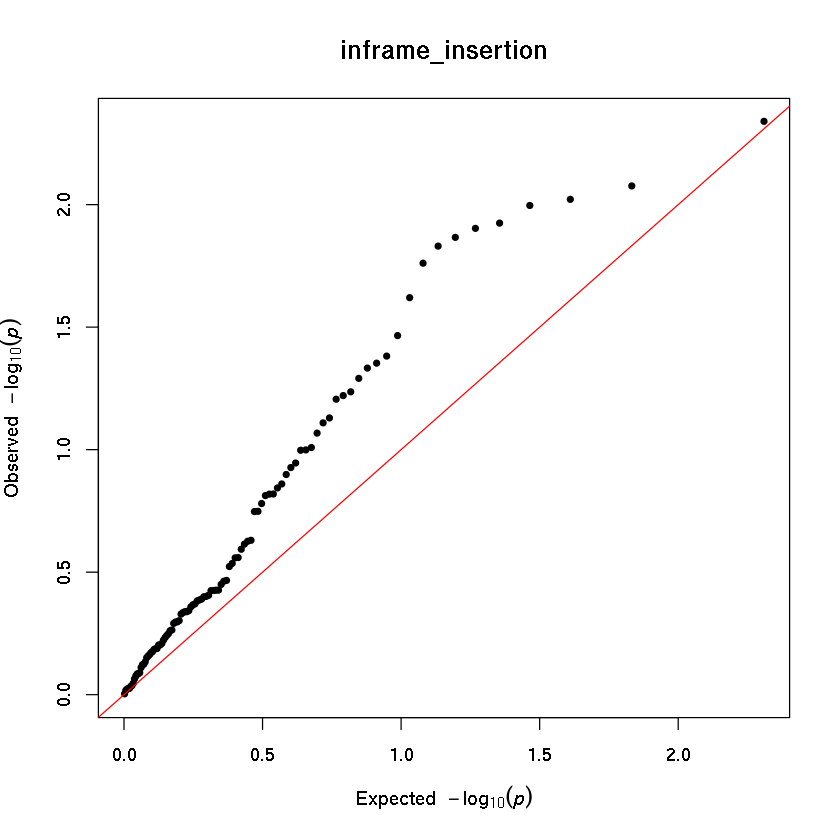

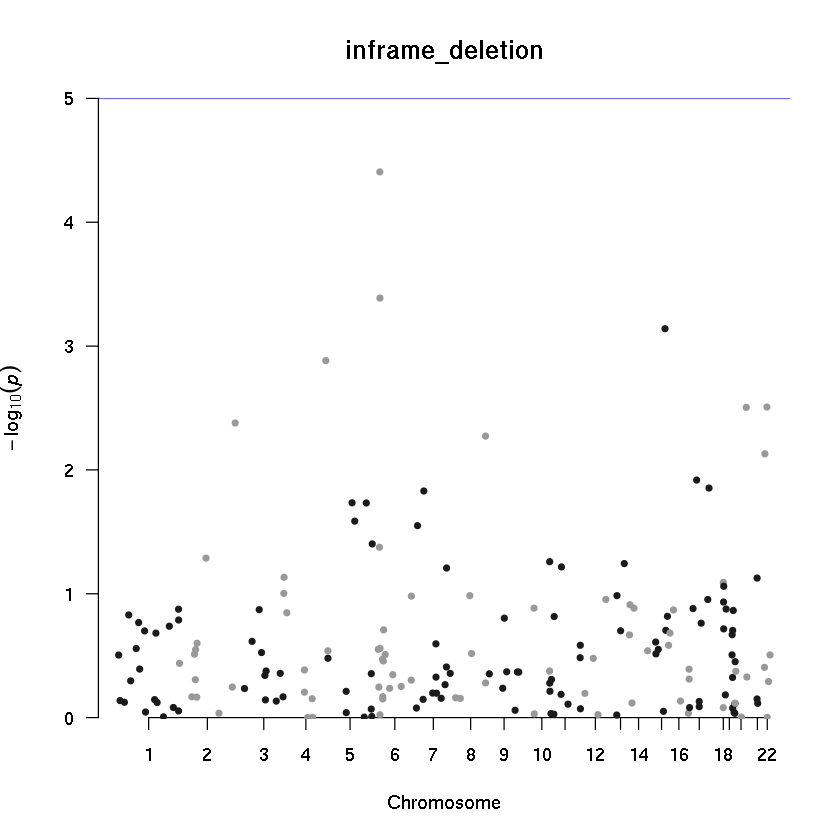

[1] "frameshift_variant"
[1] 240  23


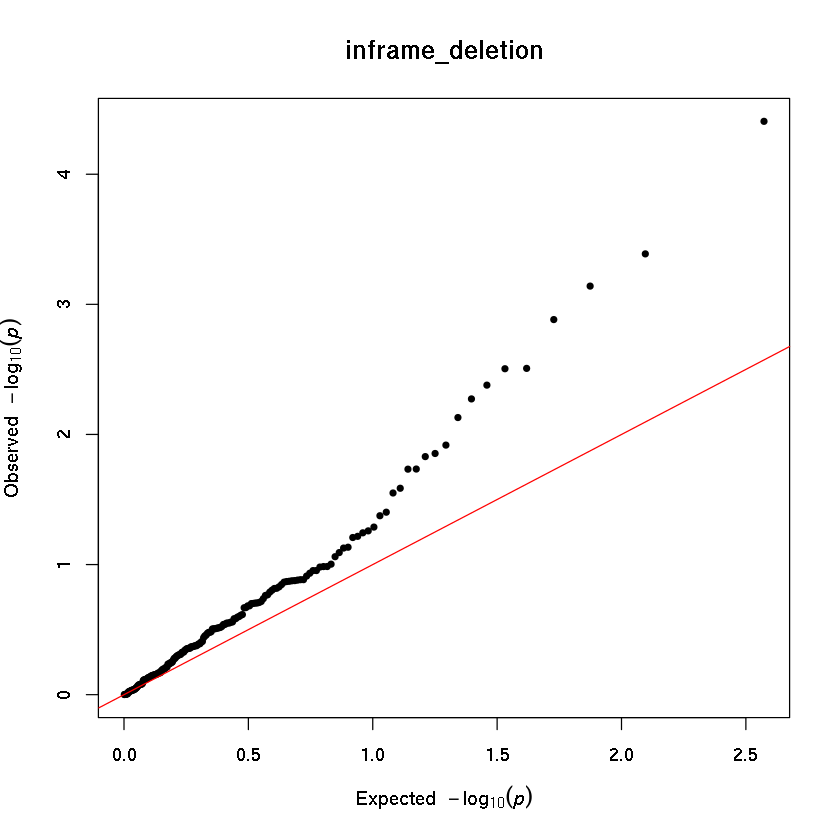

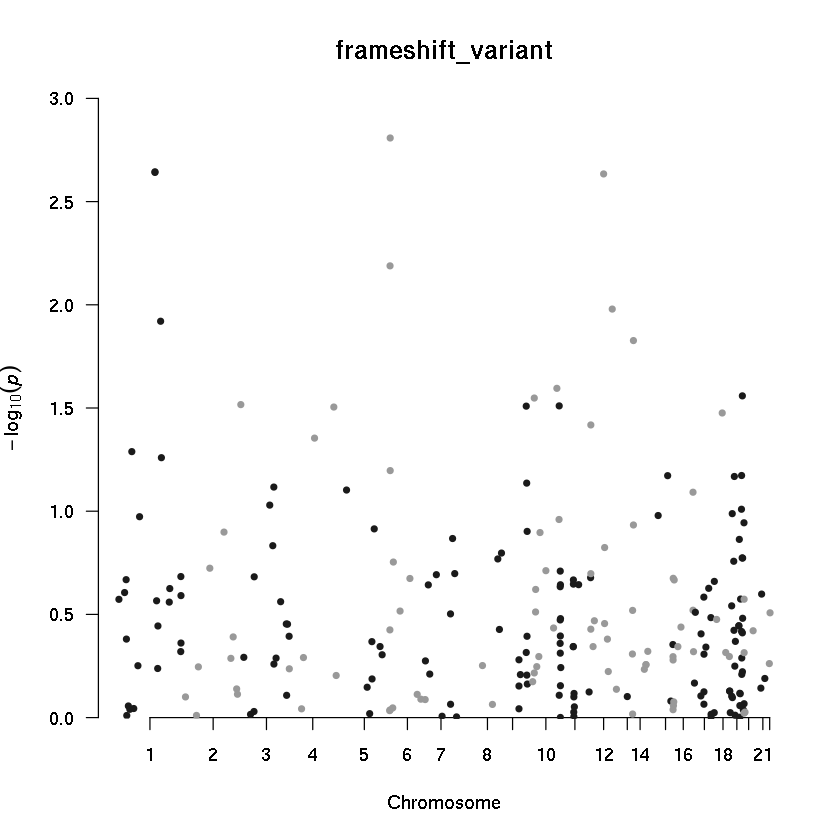

[1] "splice_donor_variant"
[1] 81 23


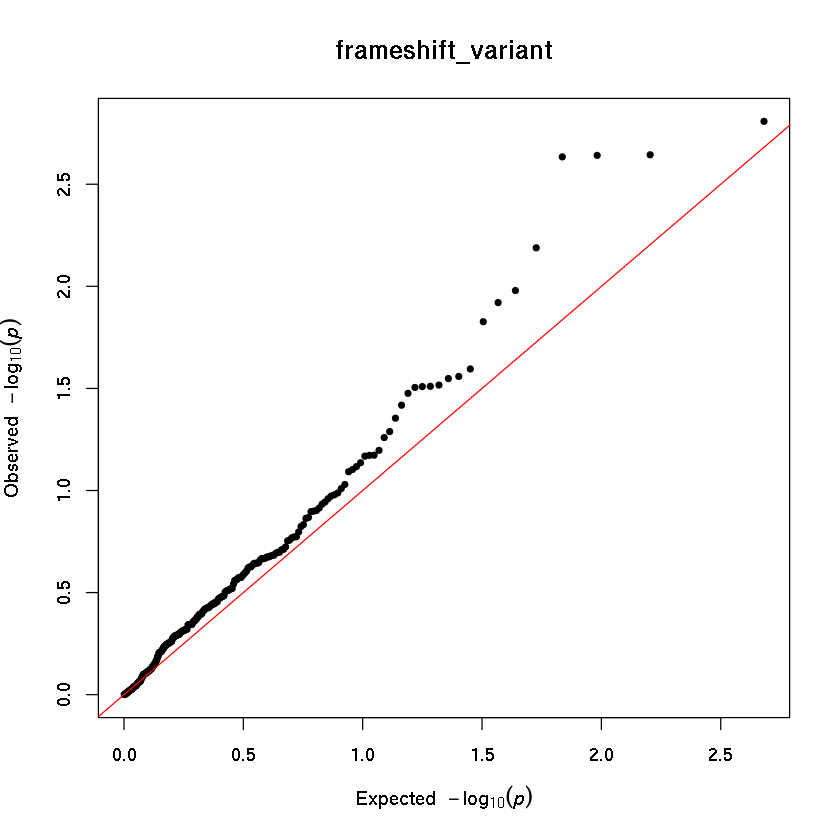

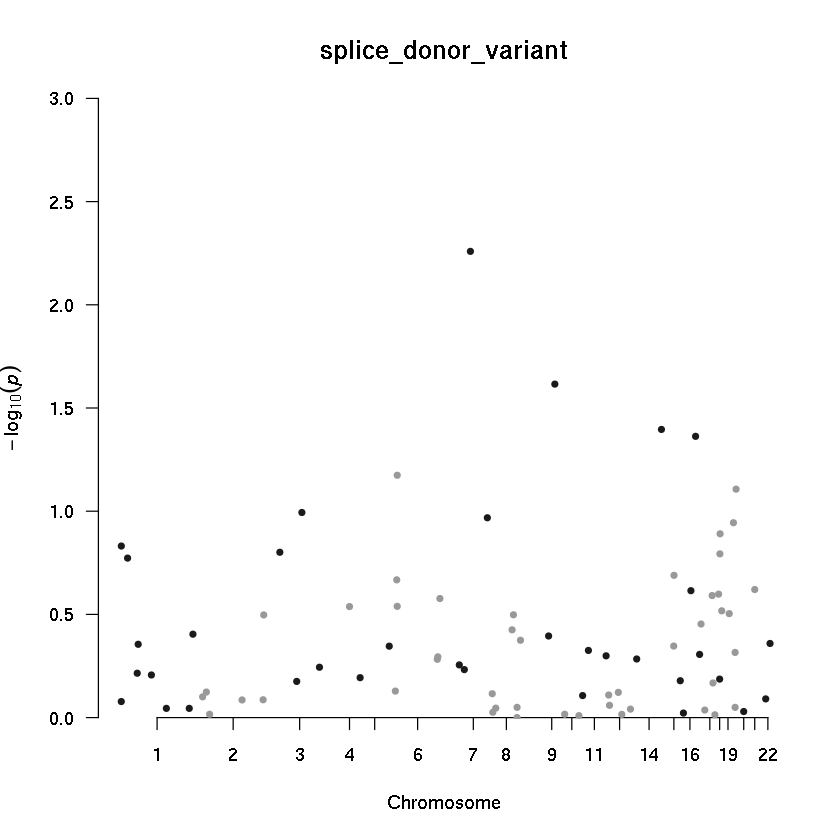

[1] "stop_gained"
[1] 201  23


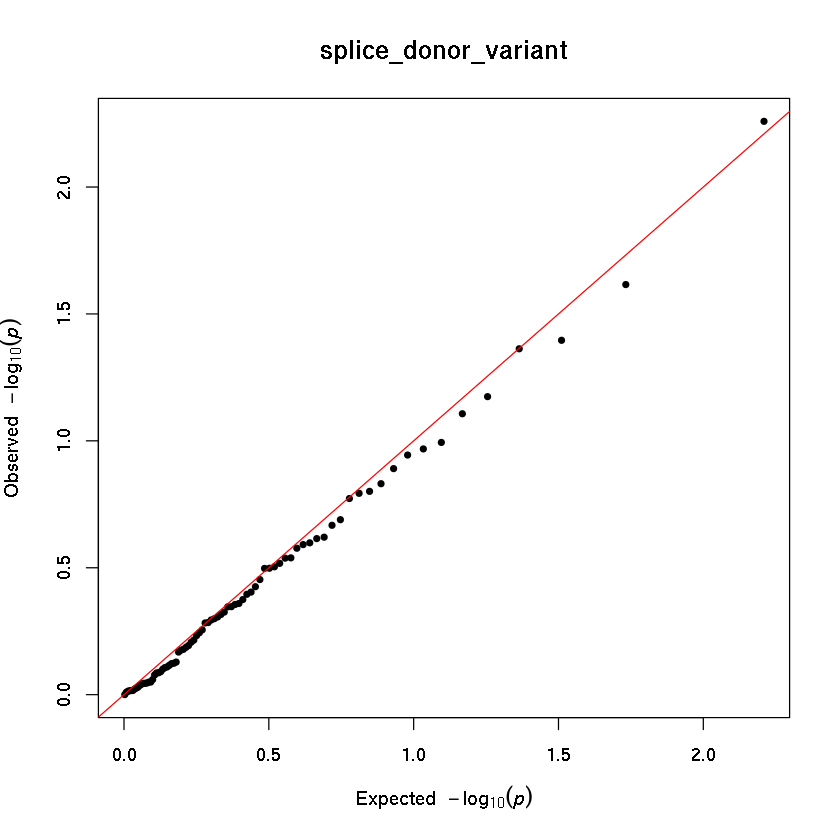

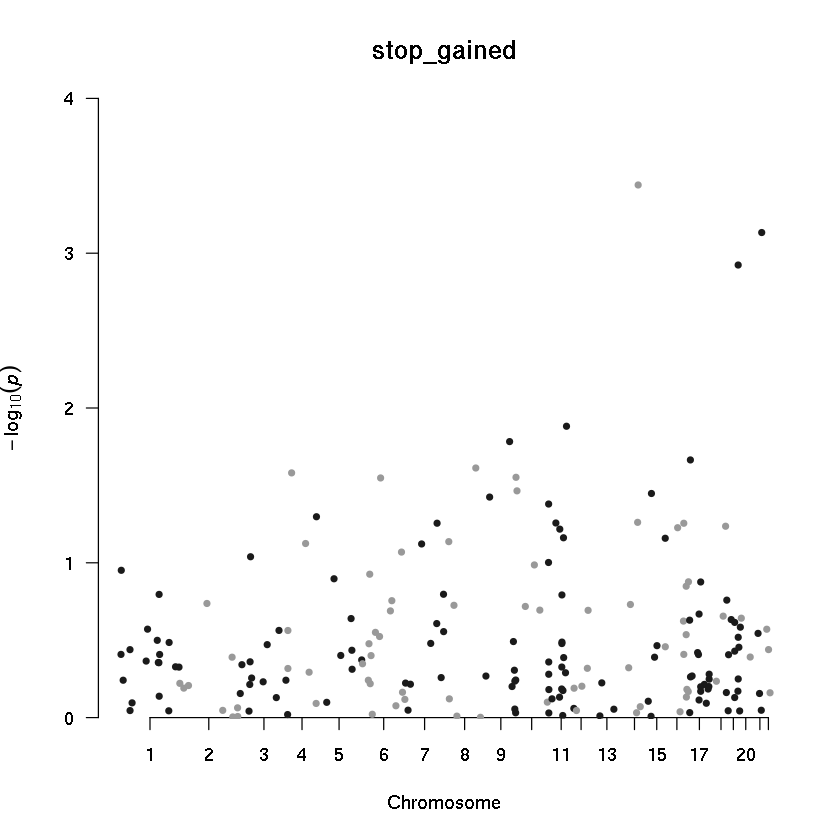

[1] "stop_lost"
[1] 50 23


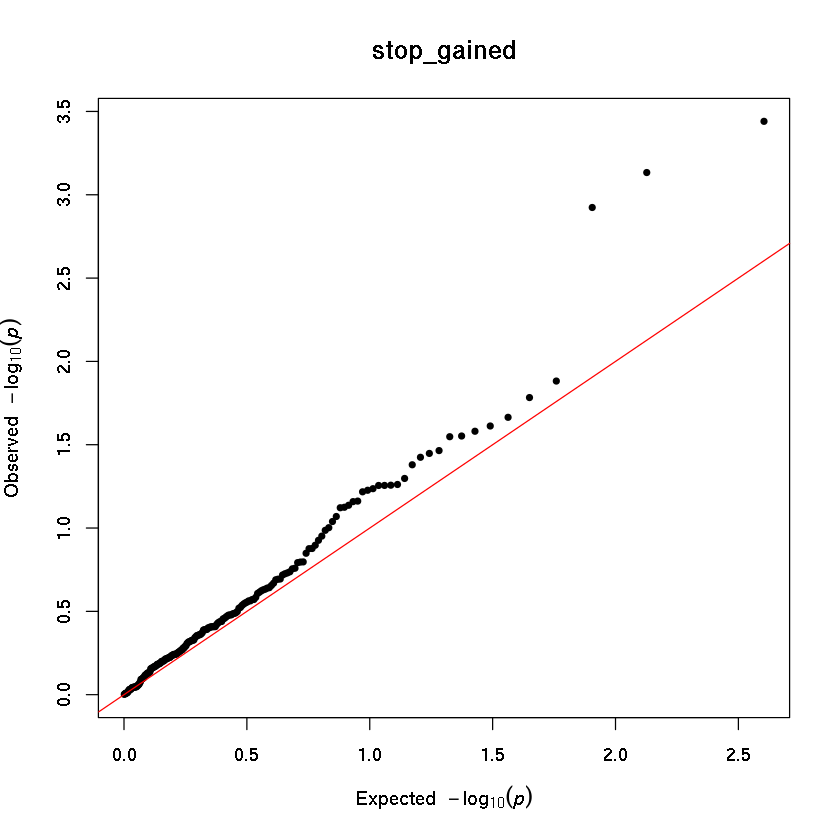

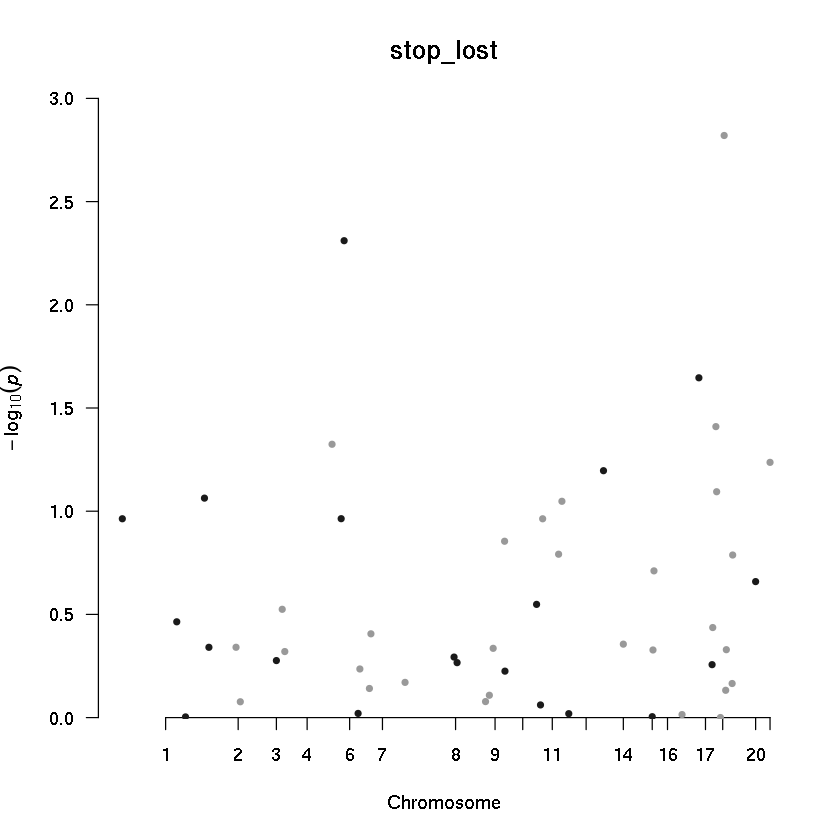

[1] "downstream_gene_variant"
[1] 75 23


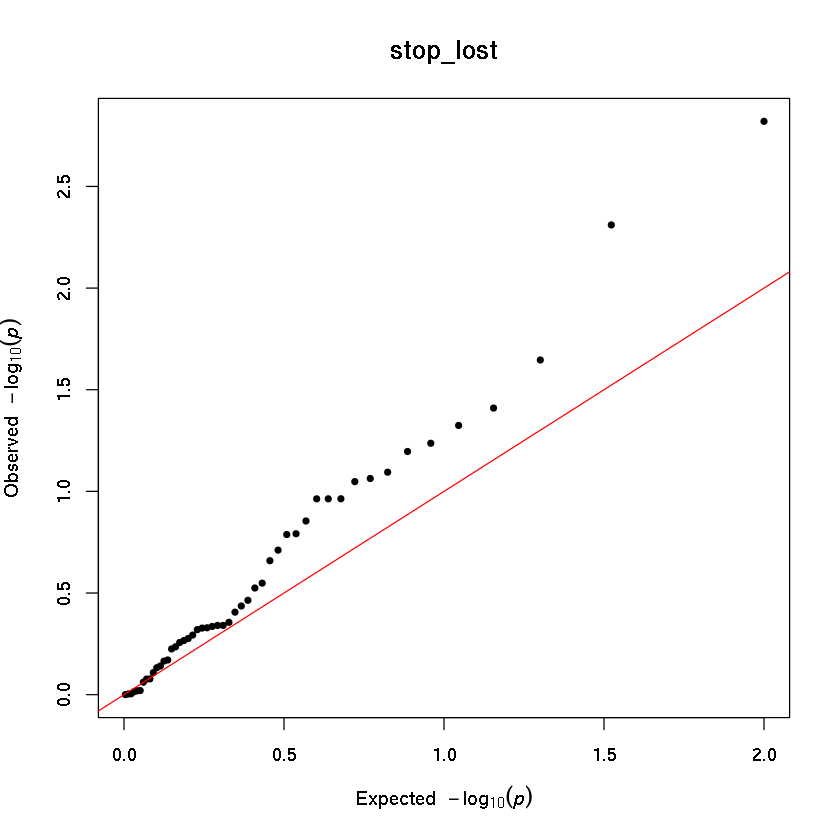

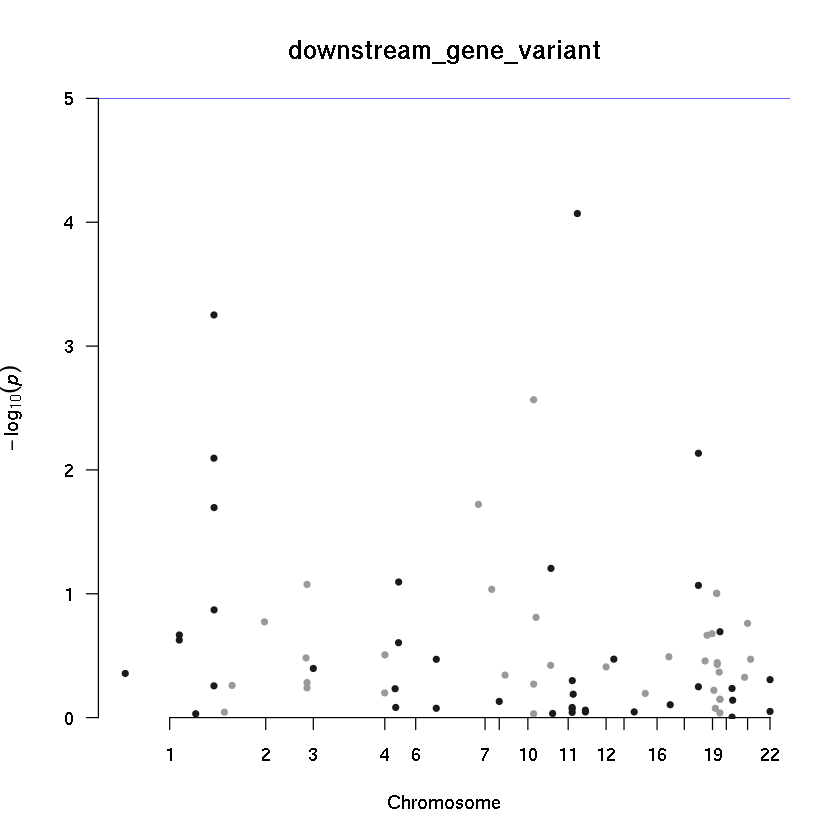

[1] "stop_retained_variant"
[1] 22 23


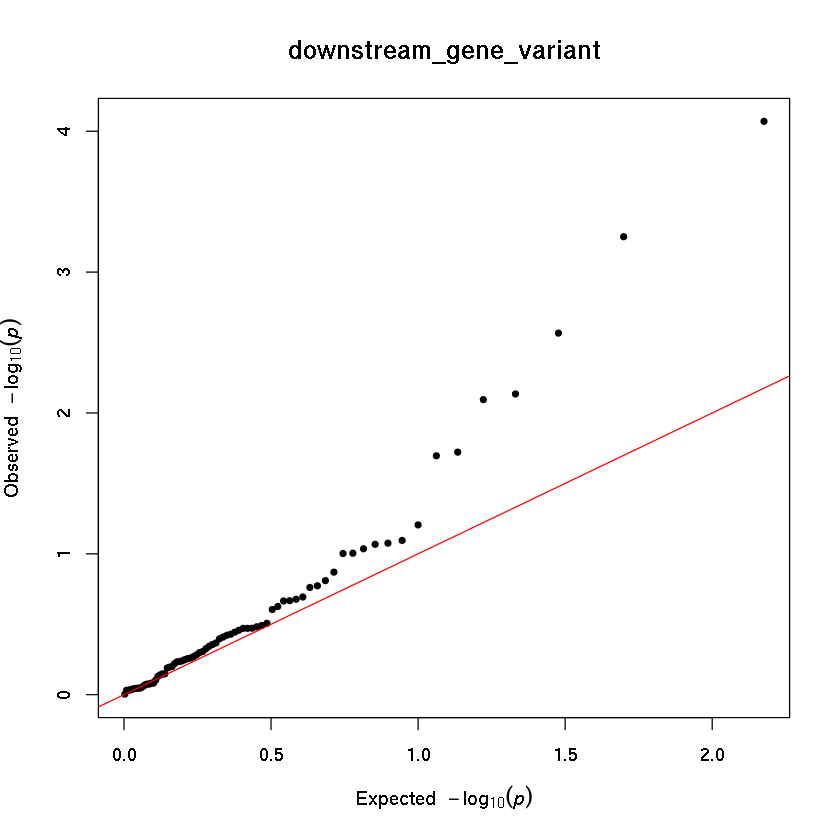

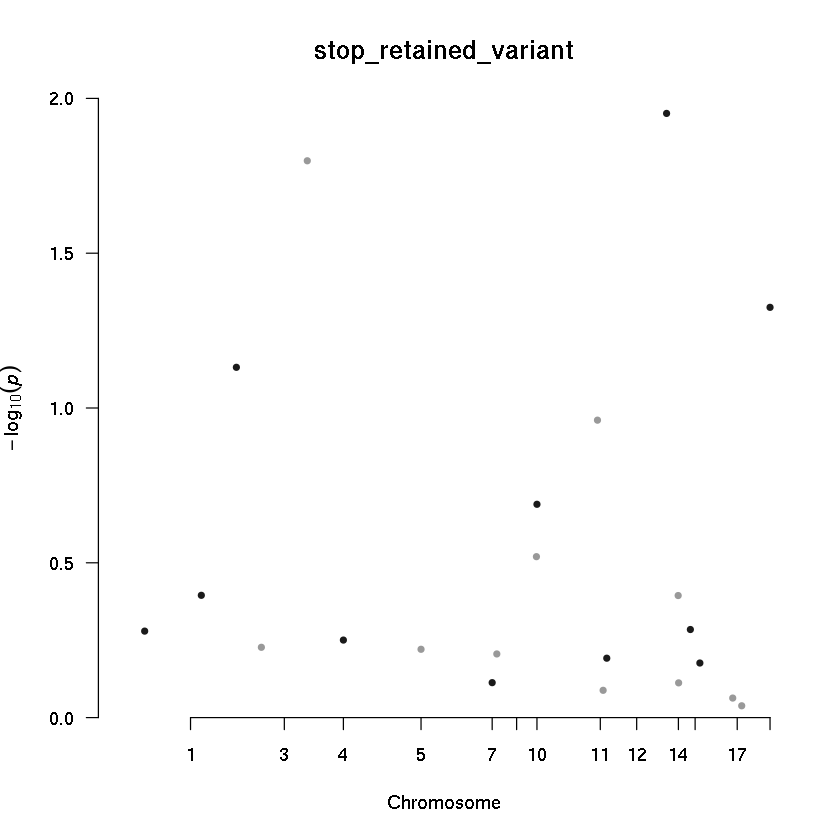

[1] "start_lost"
[1] 78 23


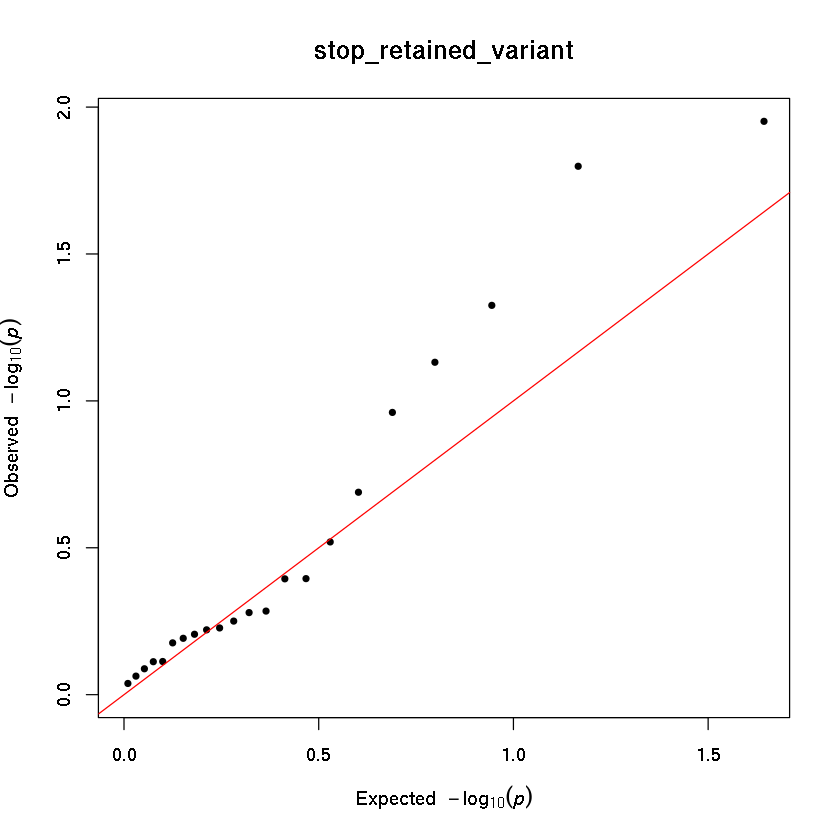

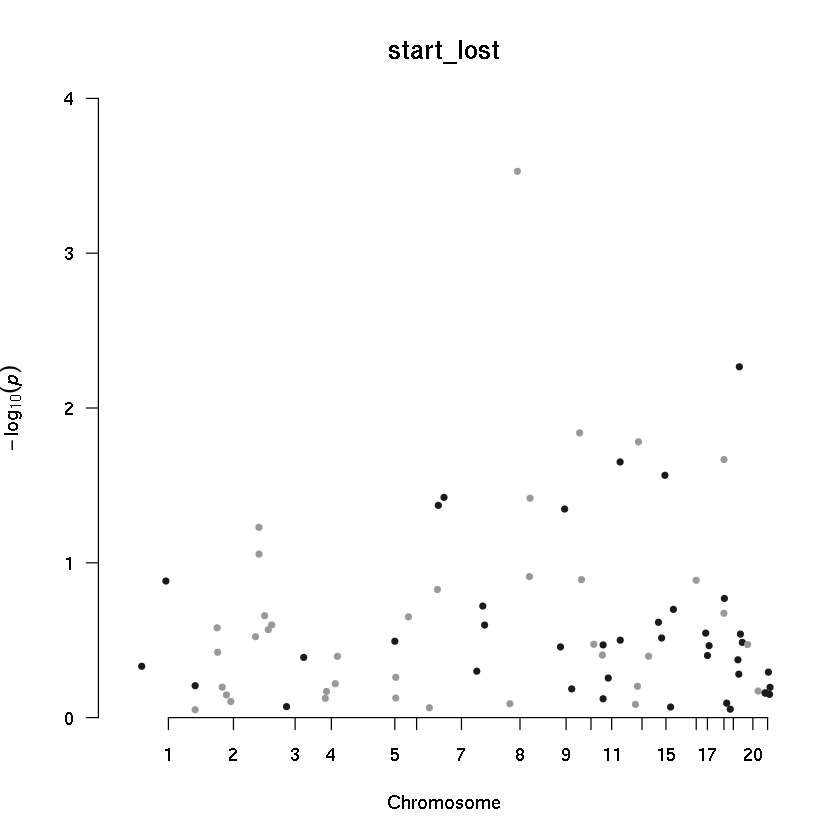

[1] "protein_altering_variant"
[1]  1 23


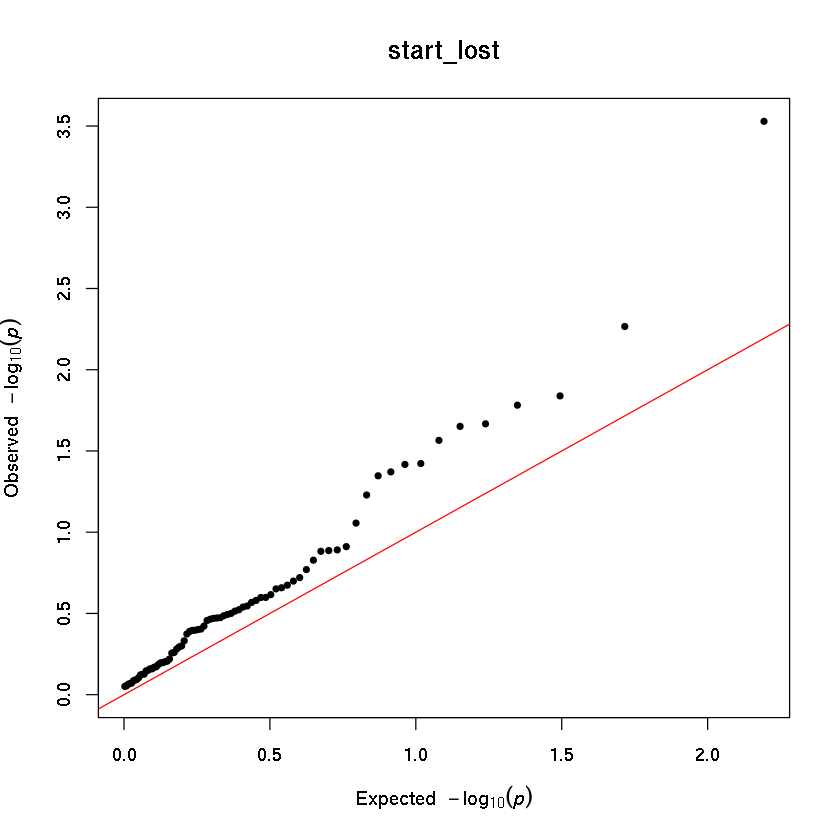

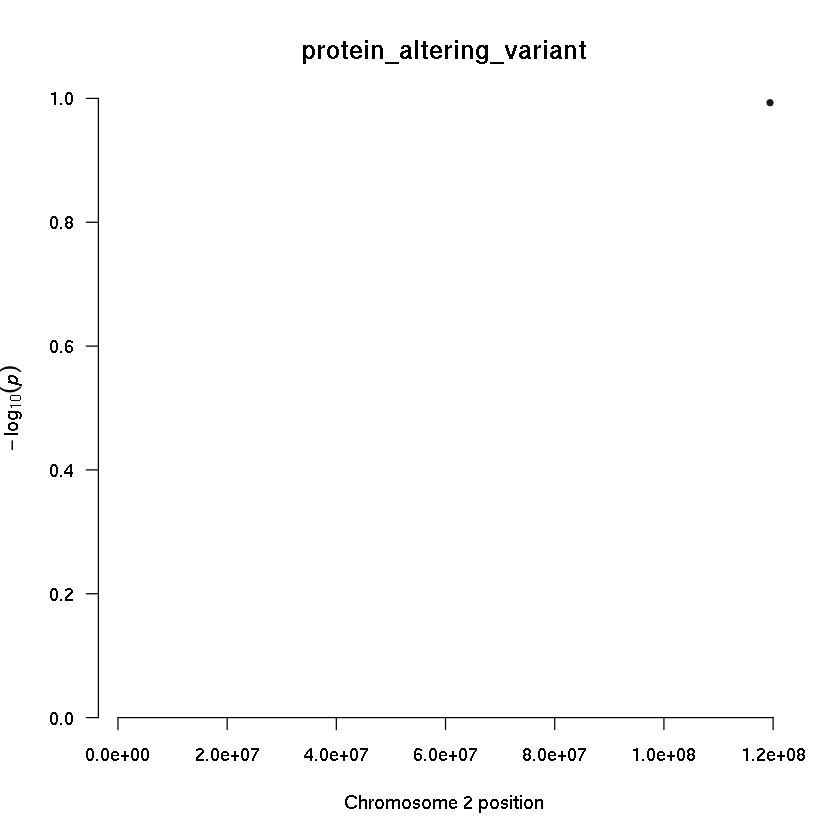

[1] "mature_miR\"\"_variant"
[1]  6 23


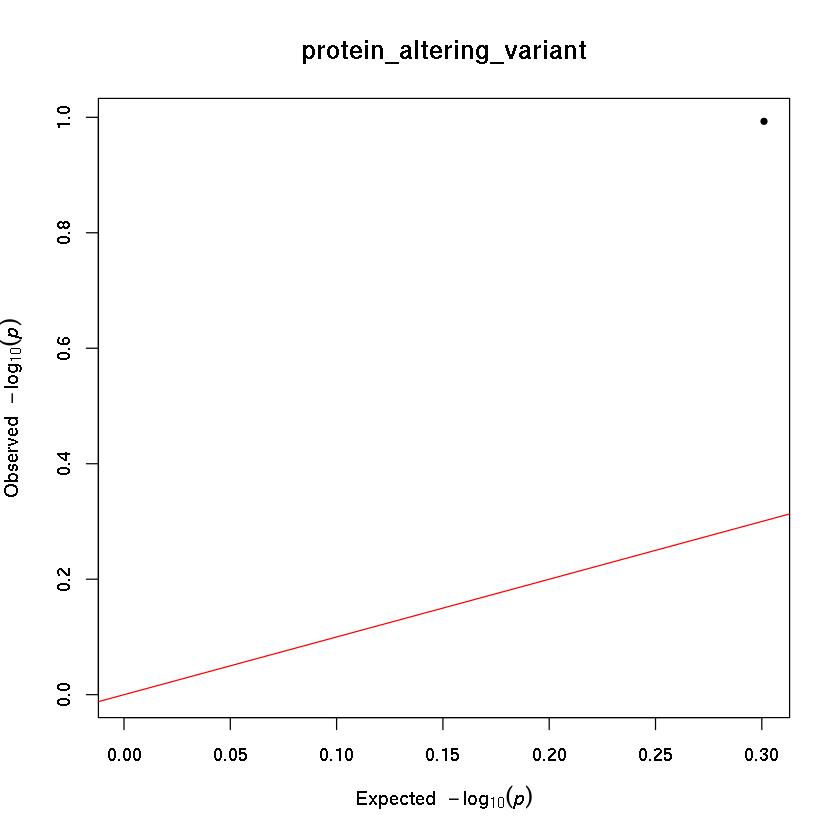

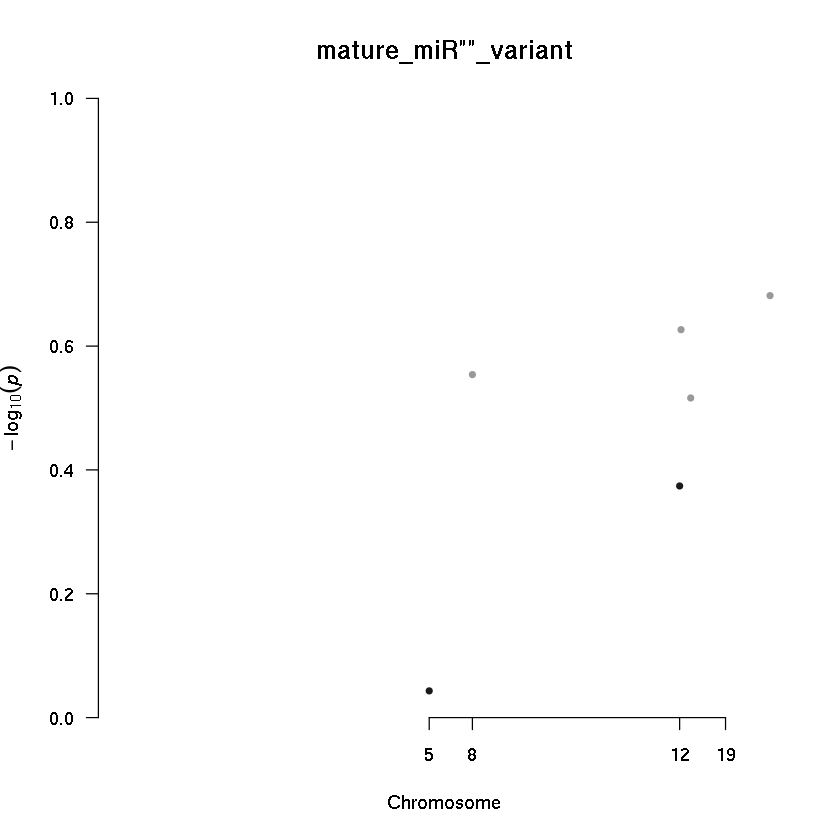

[1] "coding_sequence_variant"
[1]  5 23


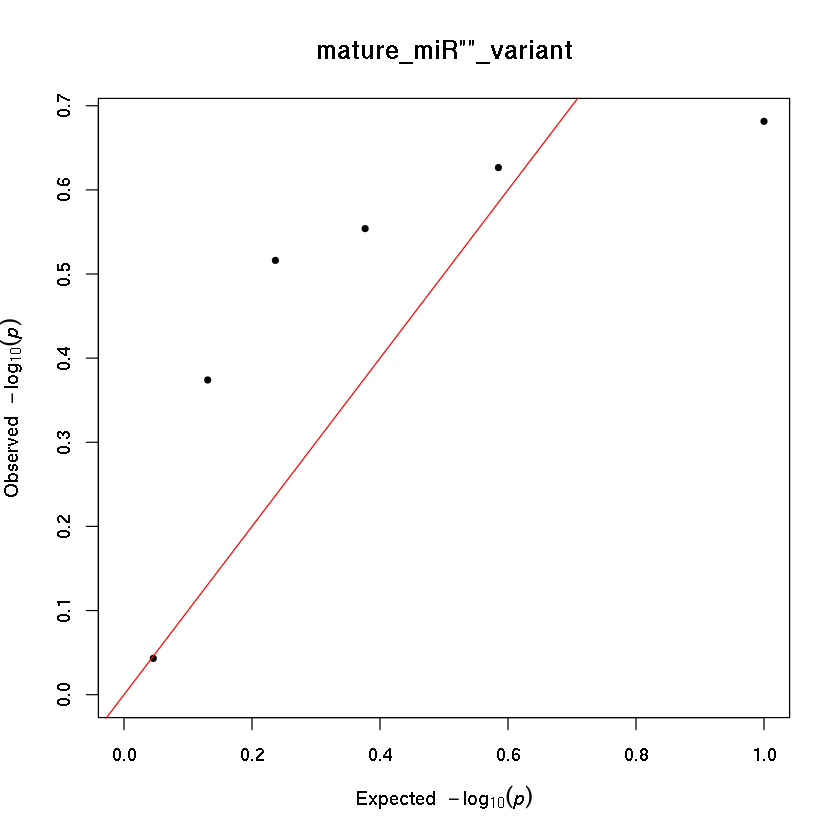

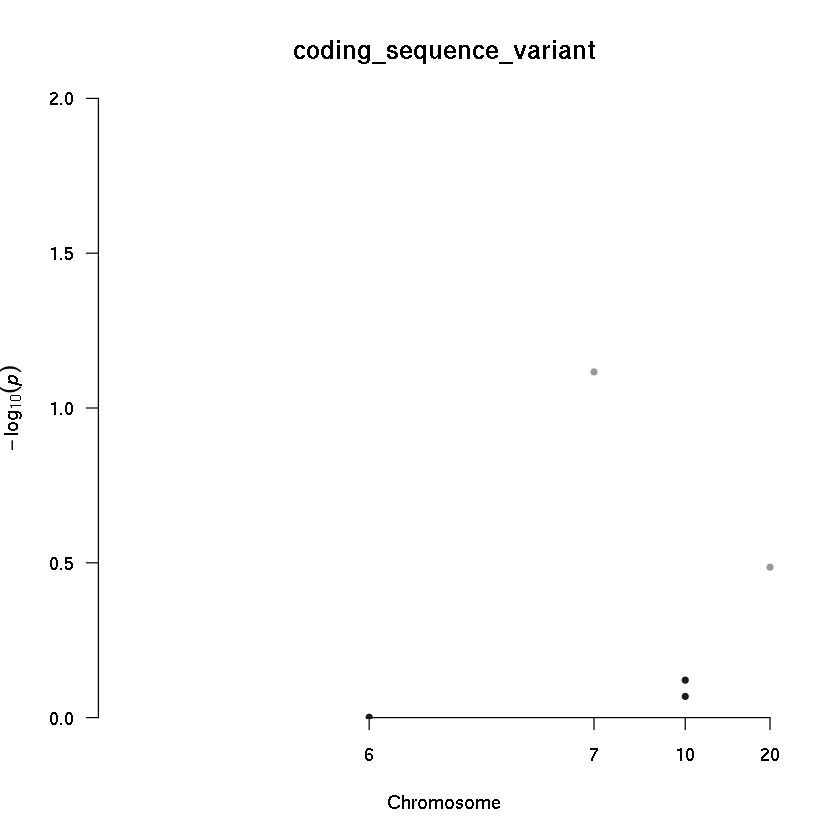

[1] "intergenic_variant"
[1]  7 23


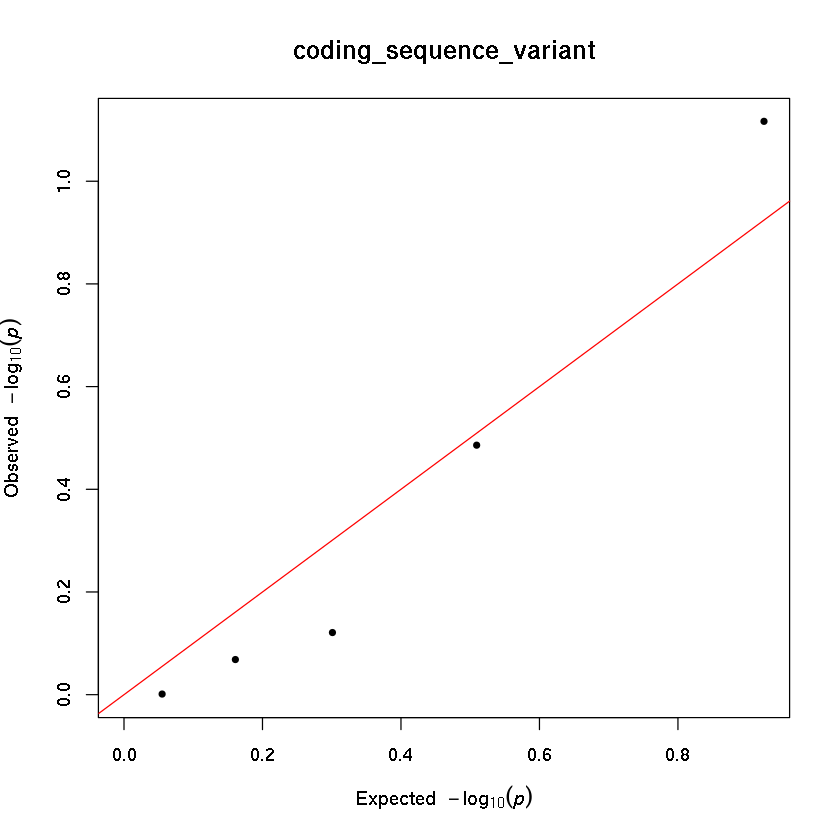

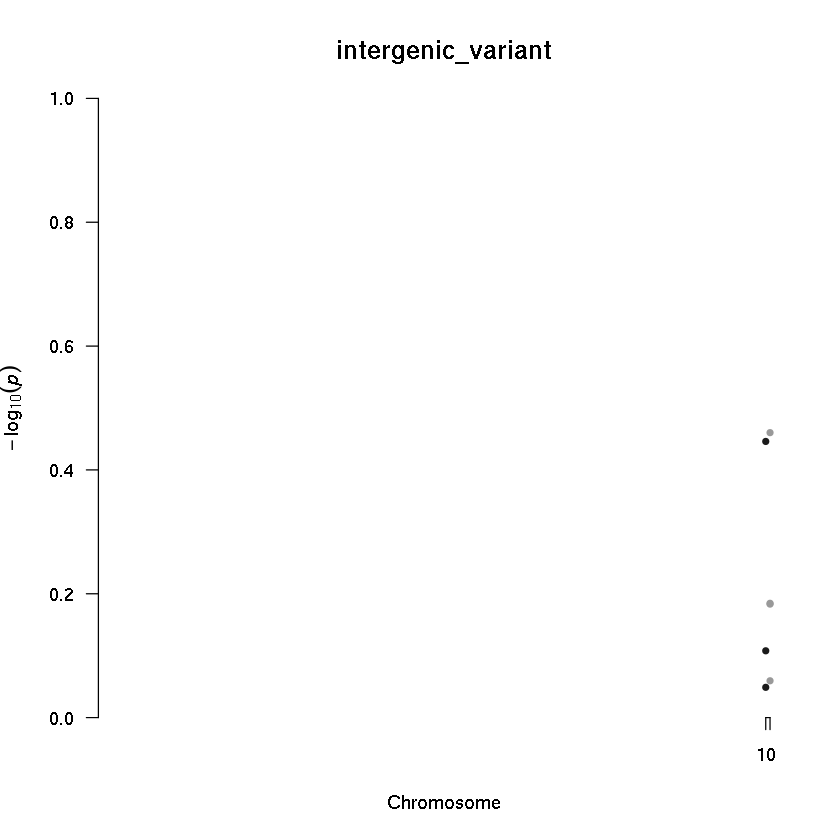

[1] "regulatory_region_variant"
[1]  1 23


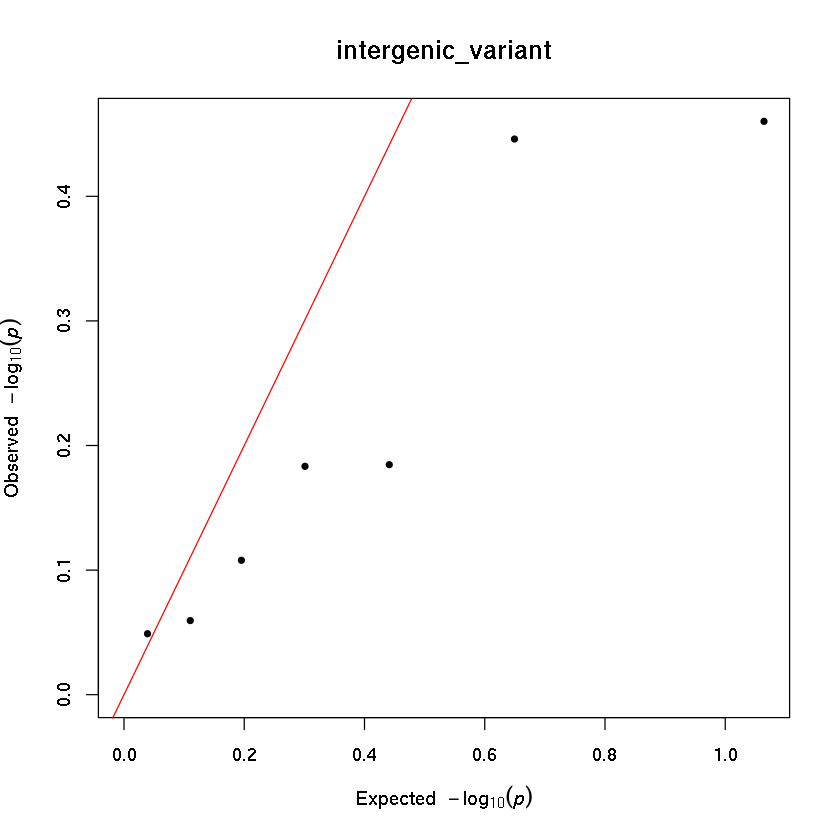

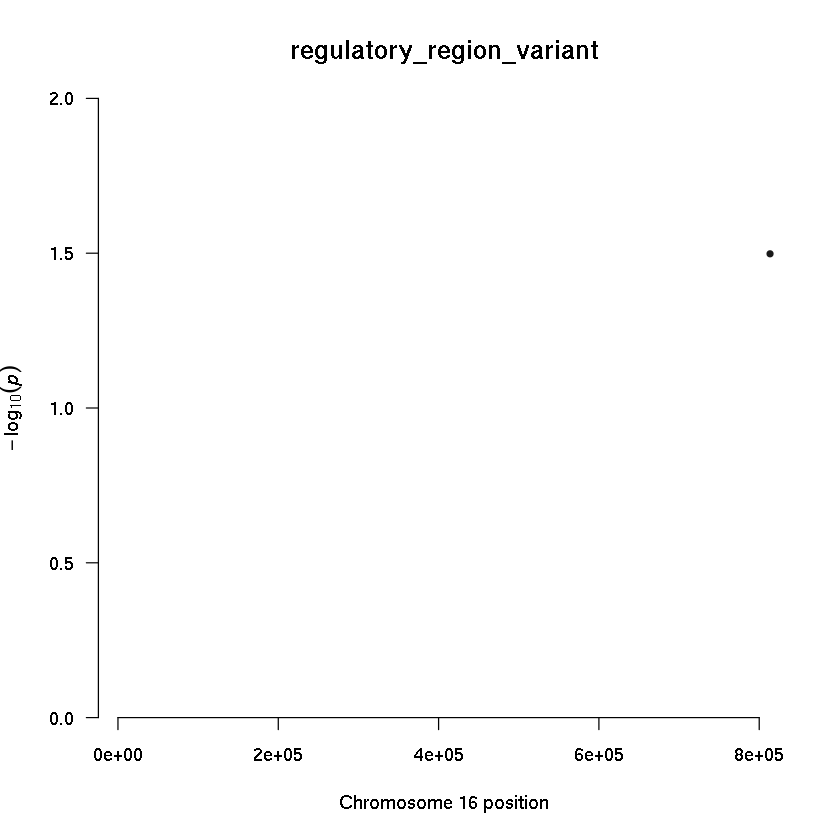

CHR BP     ID           REF ALT A1 FIRTH? TEST OBS_CT OR      ⋯
1:942934:G:C 1   942934 1:942934:G:C G   C   C  N      ADD  37345  1.30930 ⋯
1:942951:C:T 1   942951 1:942951:C:T C   T   T  N      ADD  37346  1.14835 ⋯
1:943937:C:T 1   943937 1:943937:C:T C   T   T  N      ADD  37346  1.20038 ⋯
1:944296:G:A 1   944296 1:944296:G:A G   A   G  N      ADD  37346  1.22190 ⋯
1:944307:T:C 1   944307 1:944307:T:C T   C   T  N      ADD  37346  1.09402 ⋯
1:944858:A:G 1   944858 1:944858:A:G A   G   A  N      ADD  37207  1.07850 ⋯
             ERRCODE SNP          CHROM POS    rsID        Gene           
1:942934:G:C .       1:942934:G:C 1     942934 rs142558220 ENSG00000187634
1:942951:C:T .       1:942951:C:T 1     942951 rs148327885 ENSG00000187634
1:943937:C:T .       1:943937:C:T 1     943937 rs7523549   ENSG00000187634
1:944296:G:A .       1:944296:G:A 1     944296 rs6605067   ENSG00000188976
1:944307:T:C .       1:944307:T:C 1     944307 rs2839      ENSG00000188976
1:944858:A:G .       1:944858:A:G 1     944858 rs3748592   ENSG00000188976
             Consequence        
1:942934:G:C synonymous_variant 
1:942951:C:T missense_variant   
1:943937:C:T synonymous_variant 
1:944296:G:A 3_prime_UTR_variant
1:944307:T:C 3_prime_UTR_variant
1:944858:A:G intron_variant     
             HGVSp                                                                                                                                                                                                                                          
1:942934:G:C ENSP00000349216.4:p.Gly388=,ENSP00000342313.3:p.Gly480=,ENSP00000412228.1:p.Gly307=,ENSP00000484643.1:p.Gly372=,ENSP00000482090.1:p.Gly400=,ENSP00000480870.1:p.Gly355=,ENSP00000484256.1:p.Gly418=,ENSP00000482138.1:p.Gly481=                
1:942951:C:T ENSP00000349216.4:p.Pro394Leu,ENSP00000342313.3:p.Pro486Leu,ENSP00000412228.1:p.Pro313Leu,ENSP00000484643.1:p.Pro378Leu,ENSP00000482090.1:p.Pro406Leu,ENSP00000480870.1:p.Pro361Leu,ENSP00000484256.1:p.Pro424Leu,ENSP00000482138.1:p.Pro487Leu
1:943937:C:T ENSP00000349216.4:p.Tyr518=,ENSP00000342313.3:p.Tyr610=,ENSP00000412228.1:p.Tyr470=,ENSP00000484643.1:p.Tyr502=,ENSP00000482090.1:p.Tyr530=,ENSP00000480870.1:p.Tyr485=,ENSP00000484256.1:p.Tyr548=,ENSP00000482138.1:p.Tyr611=                
1:944296:G:A                                                                                                                                                                                                                                                
1:944307:T:C                                                                                                                                                                                                                                                
1:944858:A:G                                                                                                                                                                                                                                                
             LoF Gene_symbol
1:942934:G:C     SAMD11     
1:942951:C:T     SAMD11     
1:943937:C:T     SAMD11     
1:944296:G:A     NOC2L      
1:944307:T:C     NOC2L      
1:944858:A:G     NOC2L

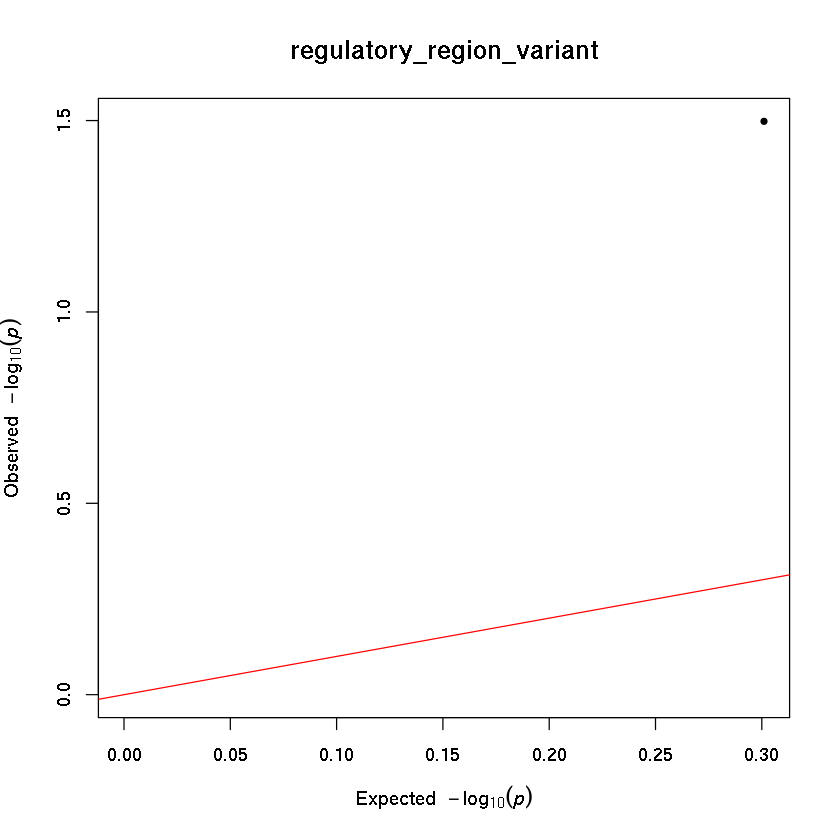

In [4]:
gwasres = parse_gwasres(
    "eu_beds/age_adj_gwas_no_exclude_10pcs.class.glm.logistic.hybrid",
    annots_m)
gwasres = gwasres[!is.na(gwasres$P),]
gwasres$Consequence[is.na(gwasres$Consequence)] = "NA"
for(cons in unique(gwasres$Consequence)){
    currd = gwasres[cons == gwasres$Consequence,]
    print(cons)
    print(dim(currd))
    try({
        manhattan(currd,annotateTop=F,annotatePval=5e-8,snp="Gene_symbol",main=cons)
        qq(currd$P,main=cons) 
    })
}
head(gwasres)

# EU: main cluster

[1] "synonymous_variant"
[1] 22118    23


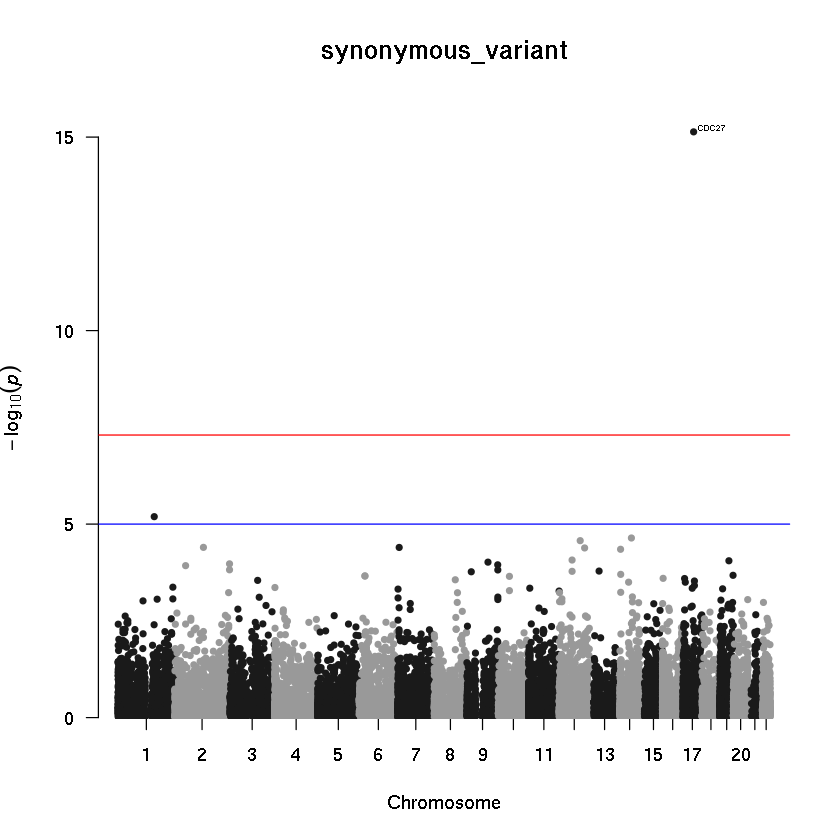

[1] "missense_variant"
[1] 22024    23


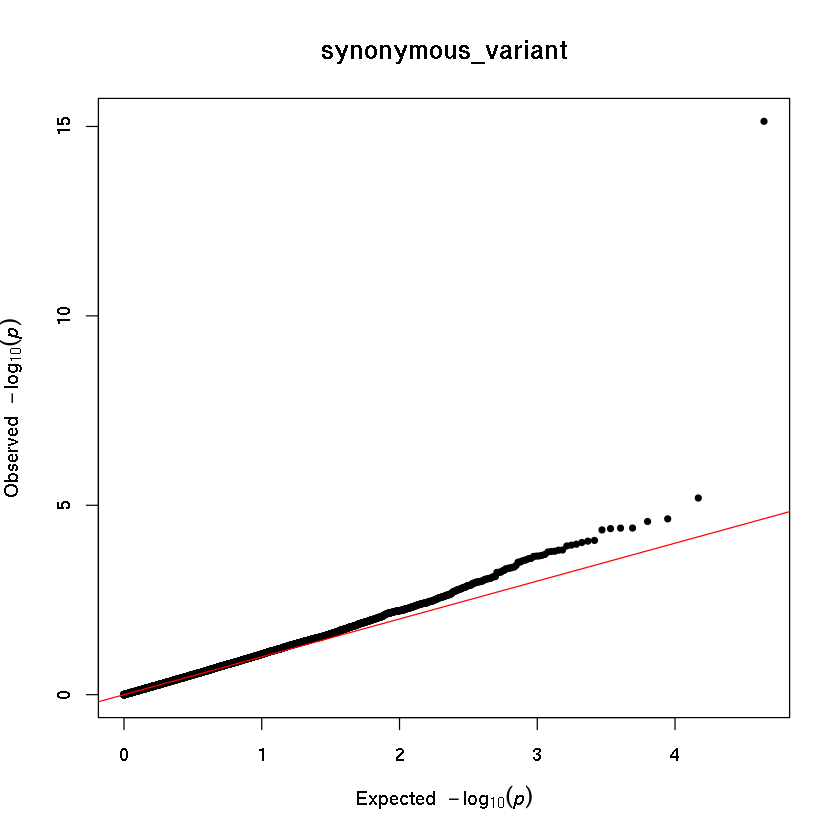

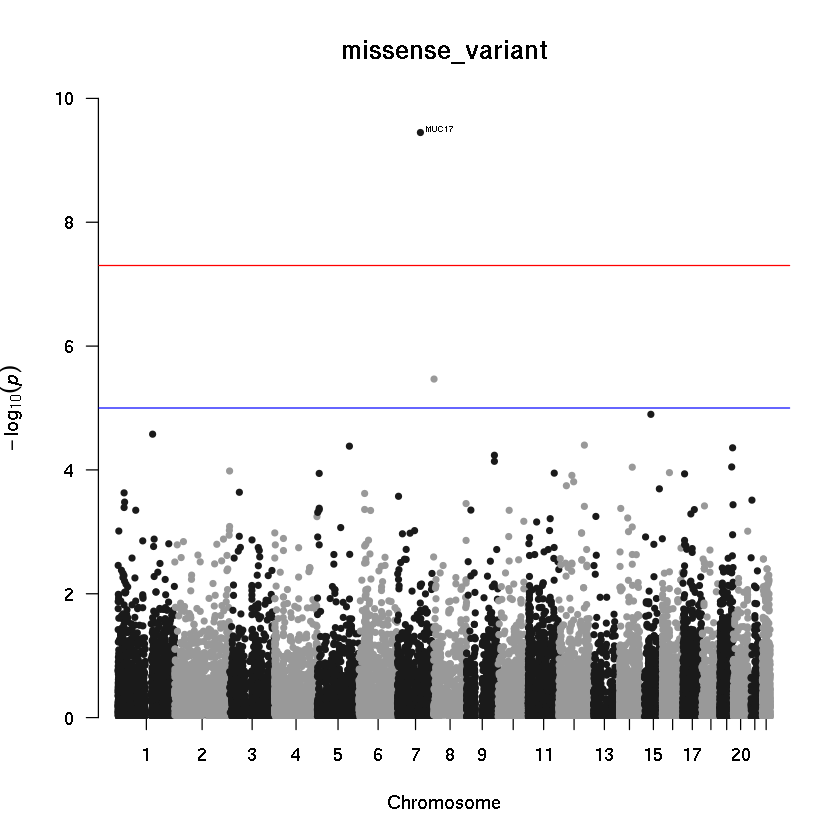

[1] "3_prime_UTR_variant"
[1] 6535   23


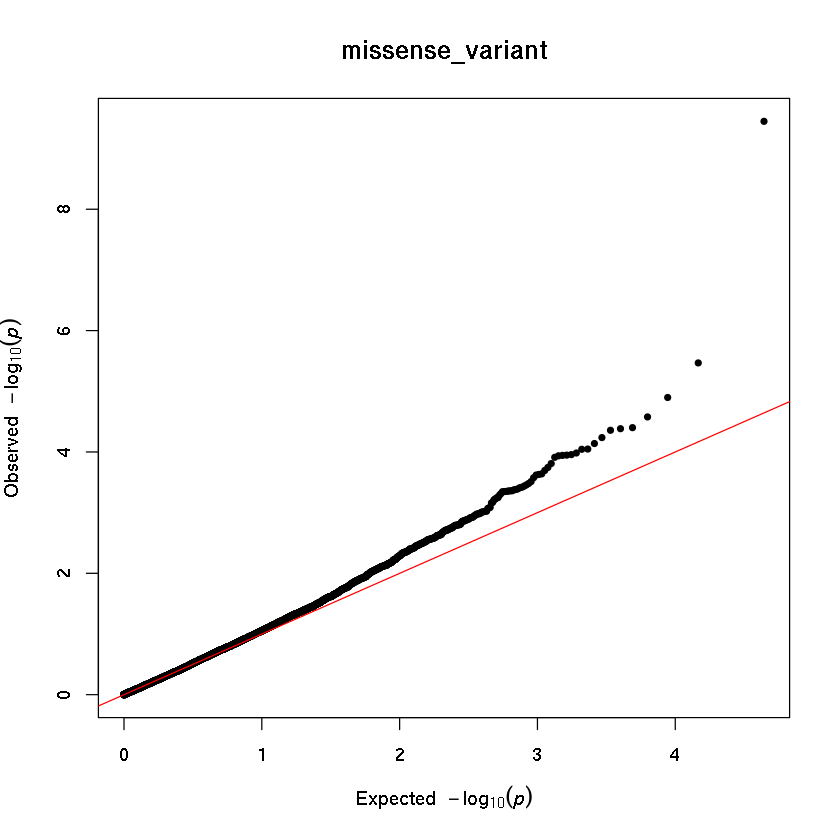

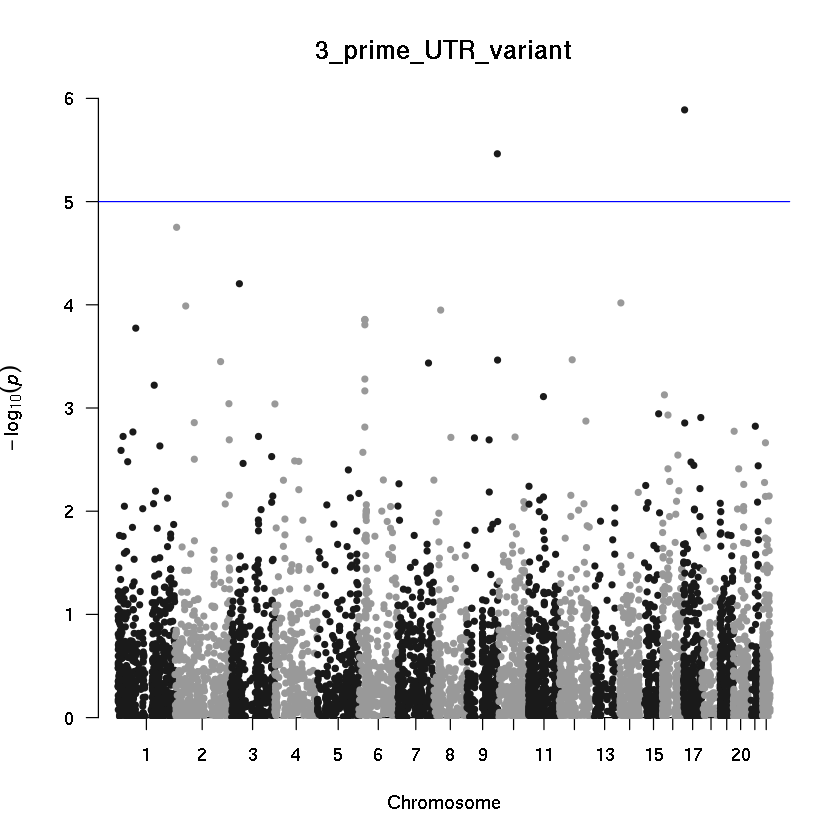

[1] "intron_variant"
[1] 32272    23


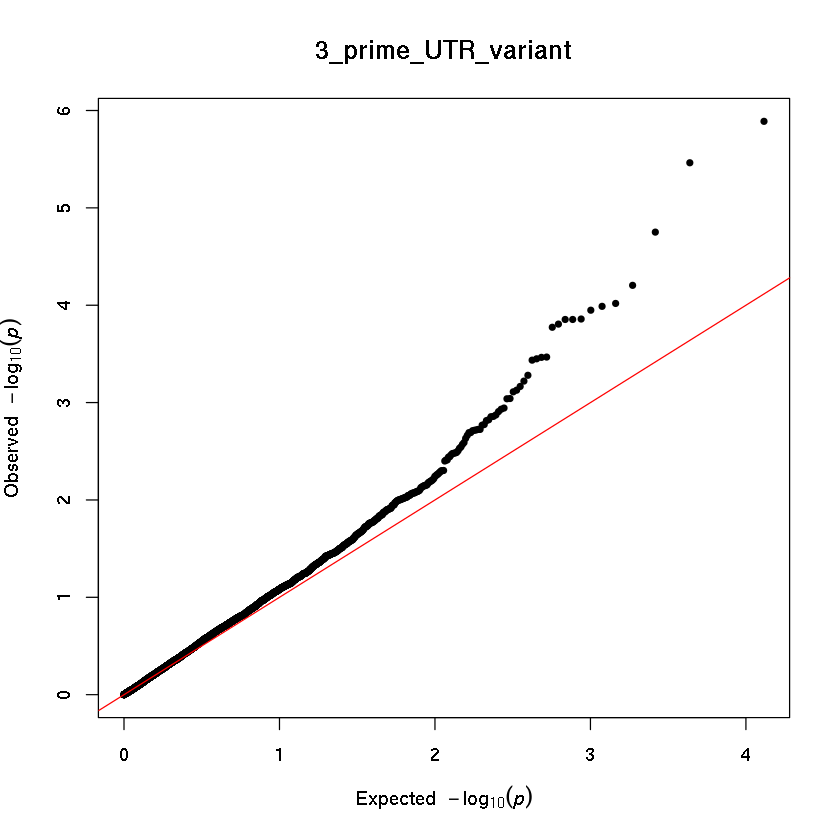

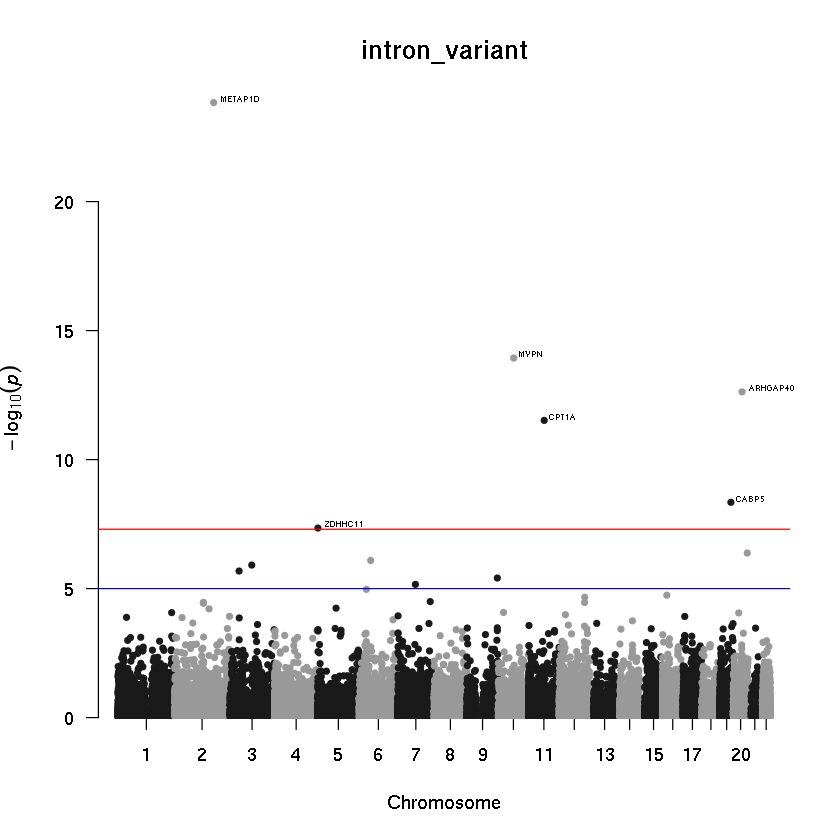

[1] "splice_region_variant"
[1] 3977   23


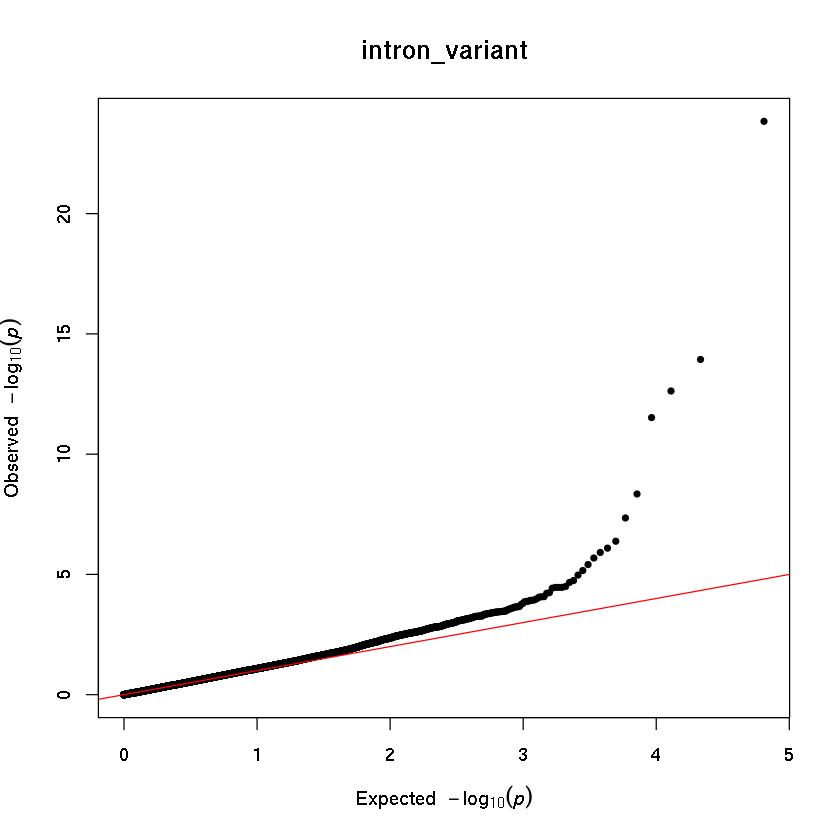

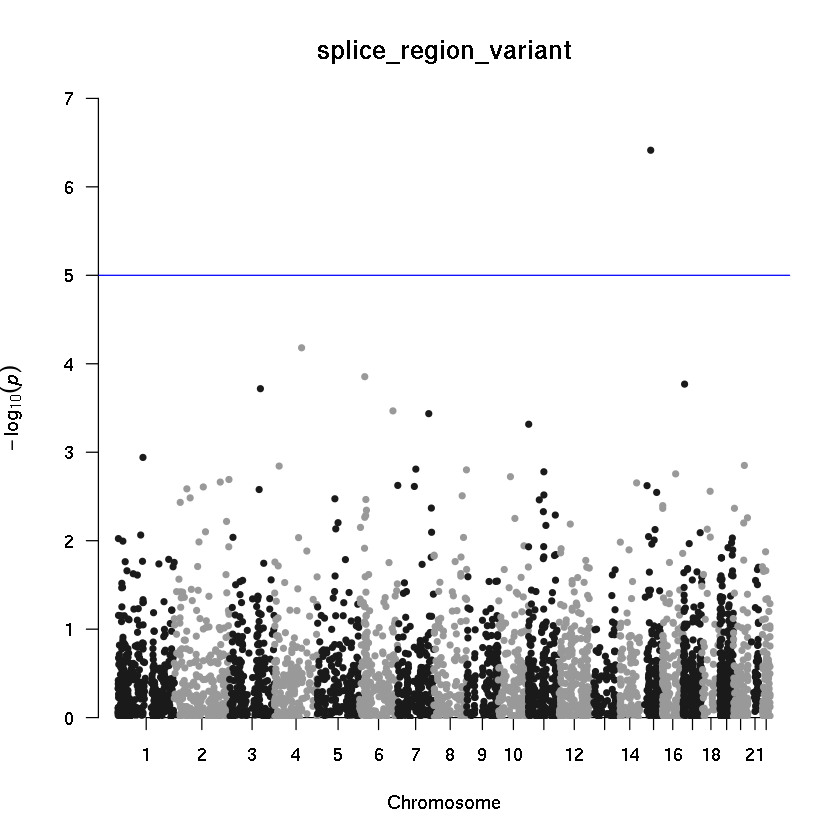

[1] "5_prime_UTR_variant"
[1] 3568   23


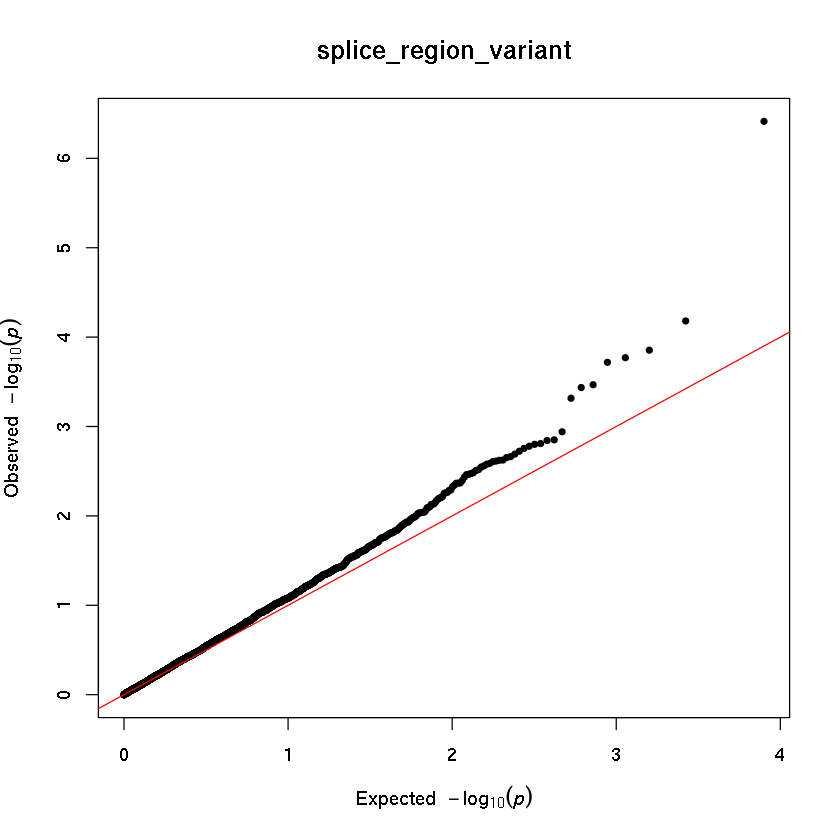

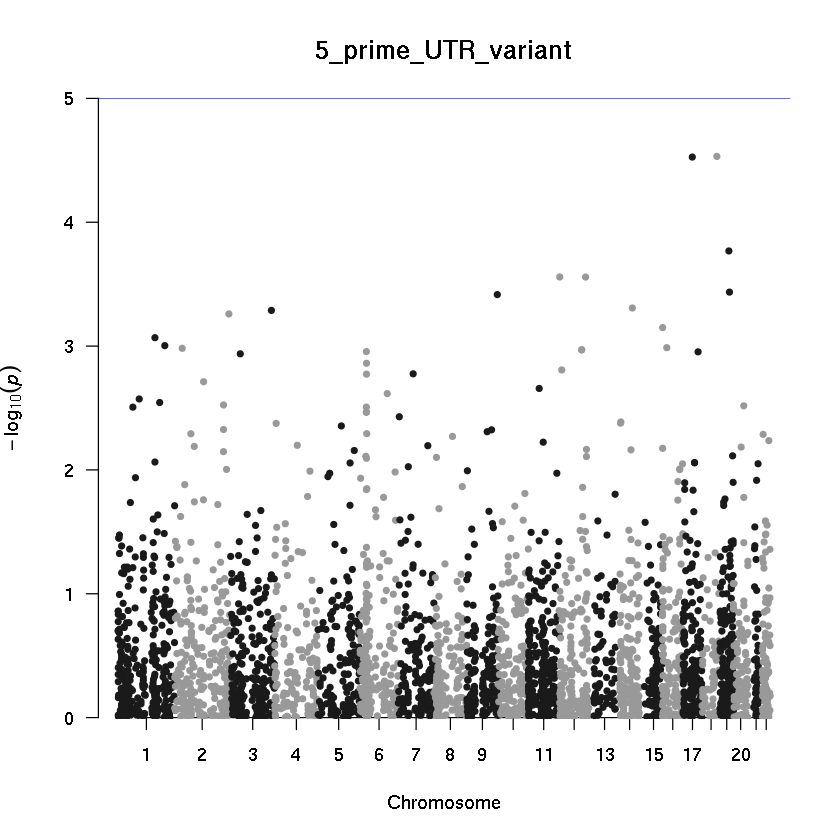

[1] "upstream_gene_variant"
[1] 261  23


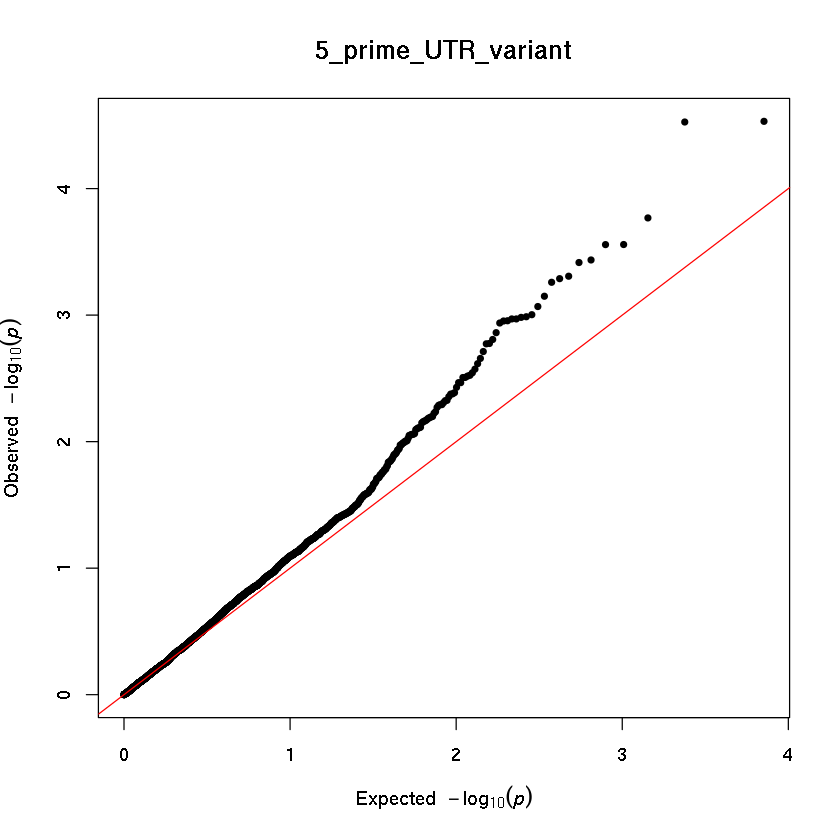

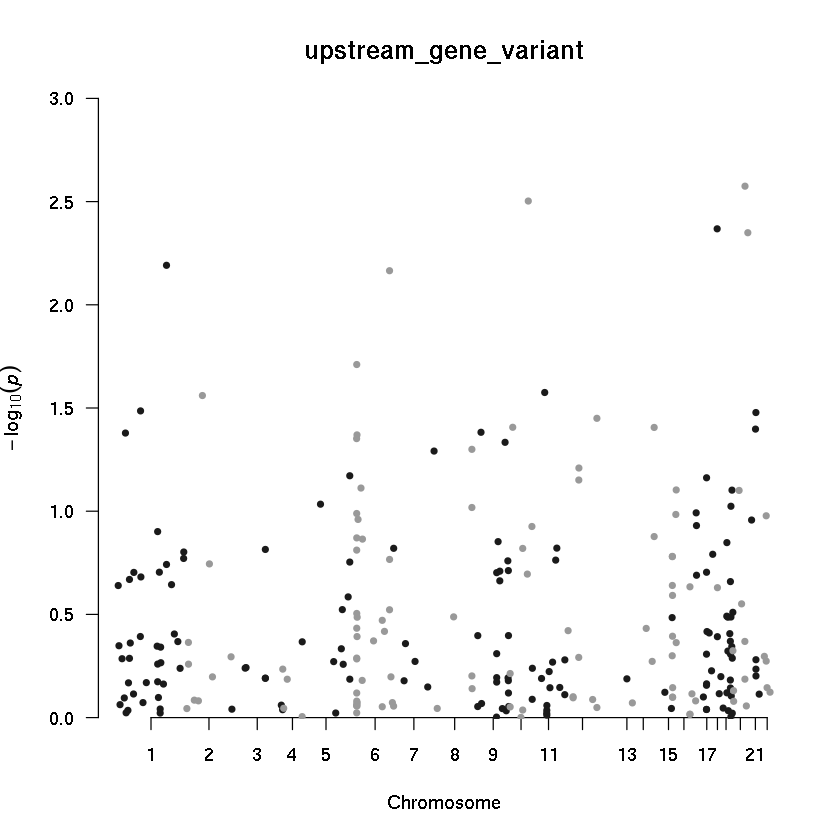

[1] "non_coding_transcript_exon_variant"
[1] 4627   23


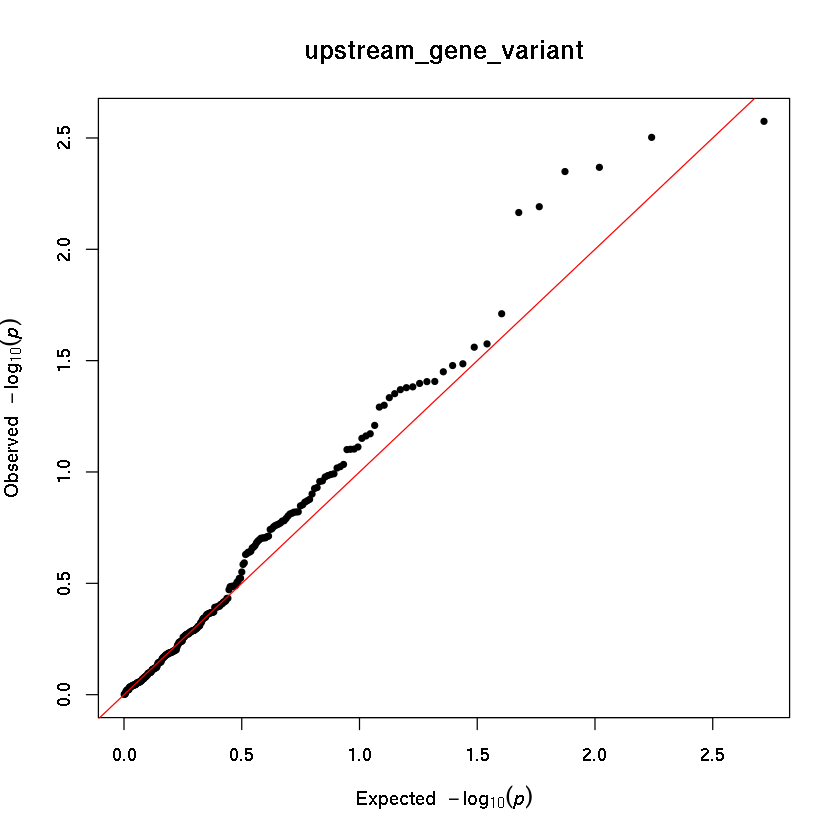

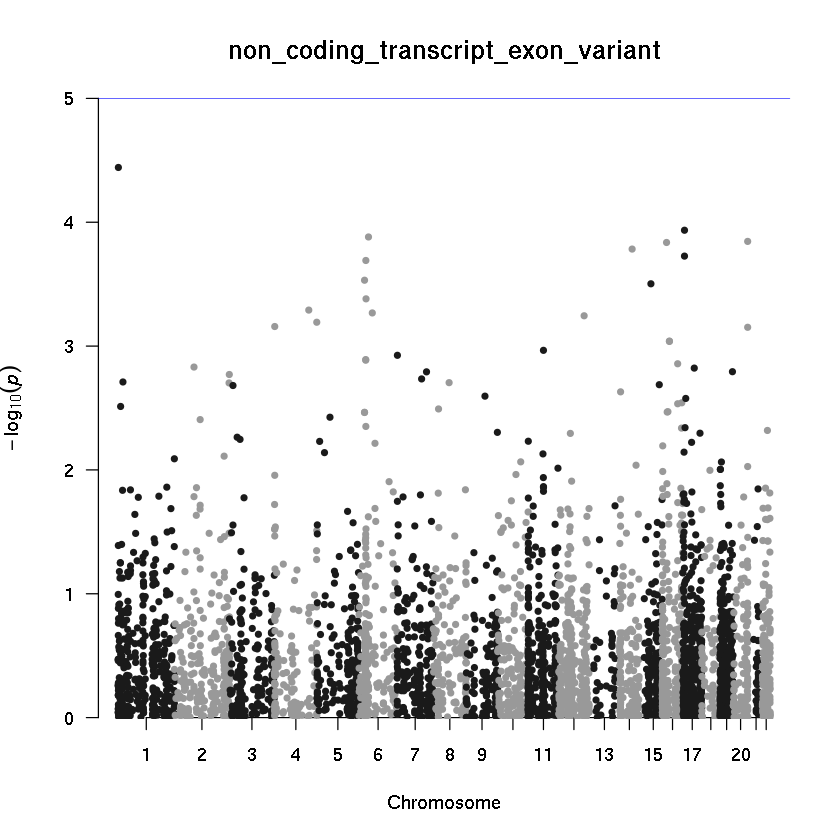

[1] "NA"
[1] 1519   23


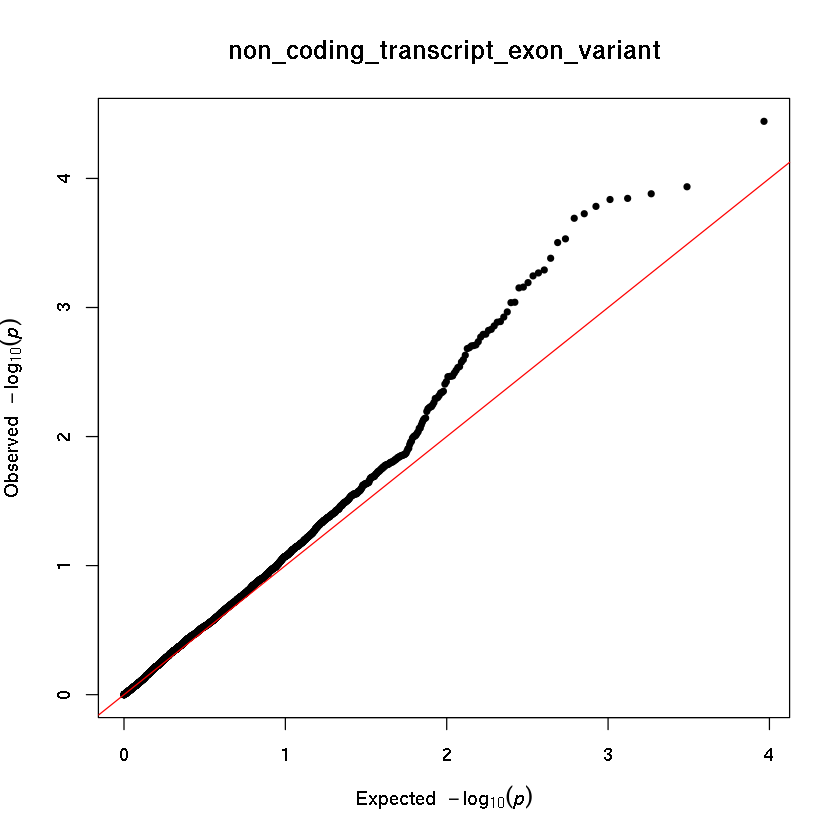

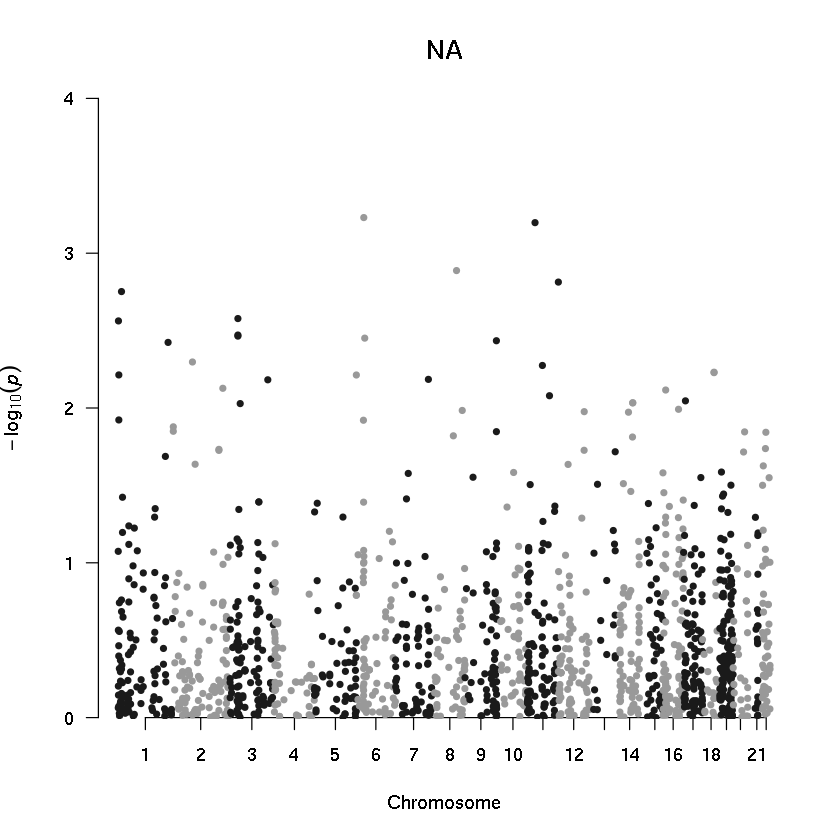

[1] "splice_acceptor_variant"
[1] 82 23


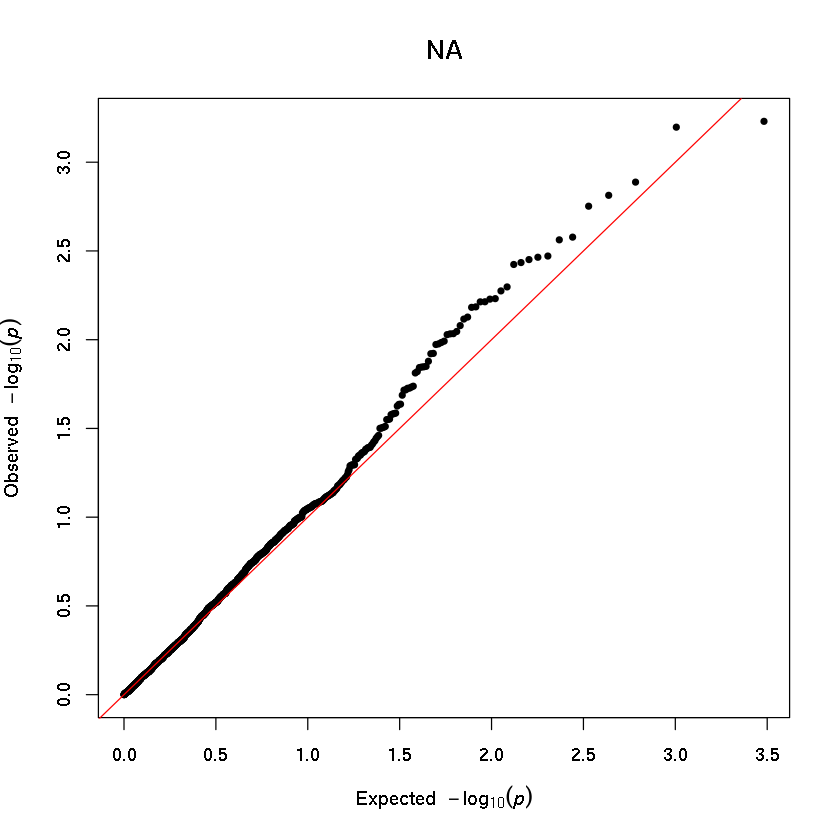

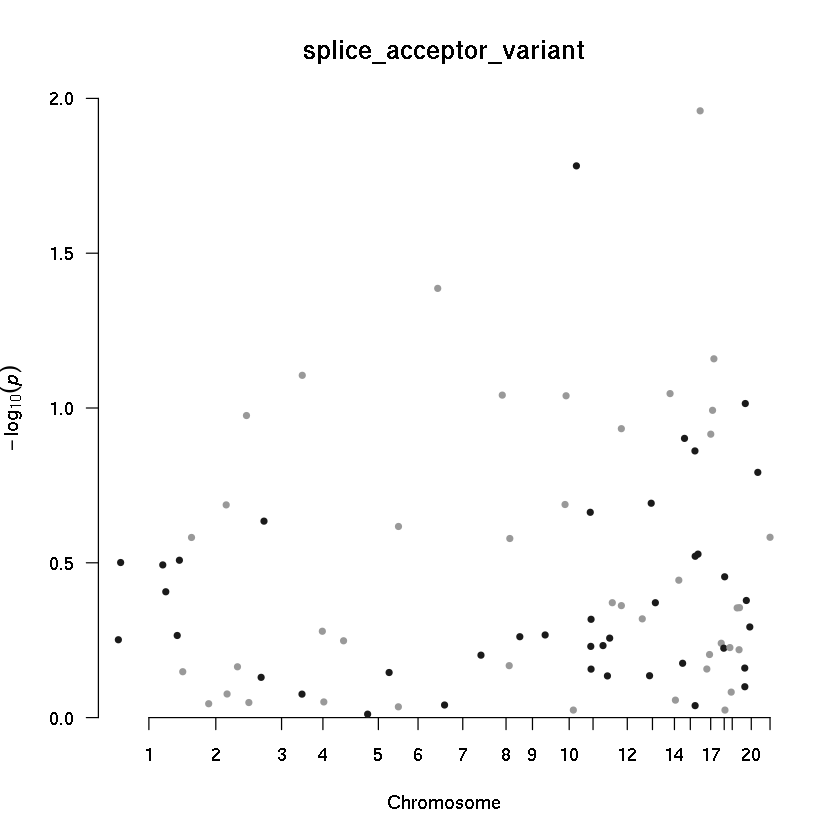

[1] "inframe_insertion"
[1] 101  23


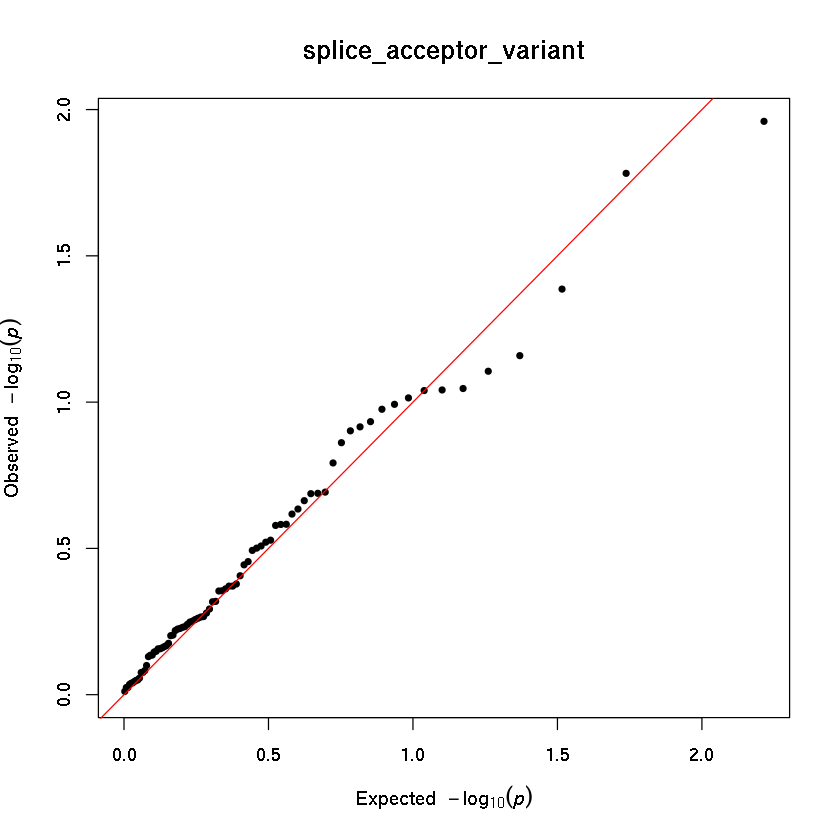

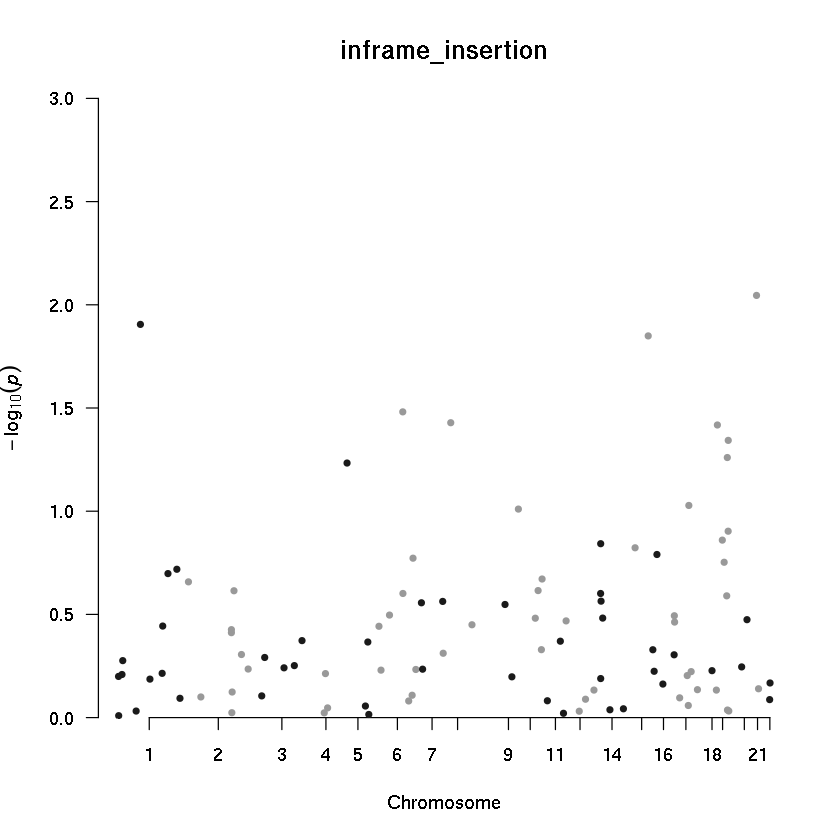

[1] "inframe_deletion"
[1] 194  23


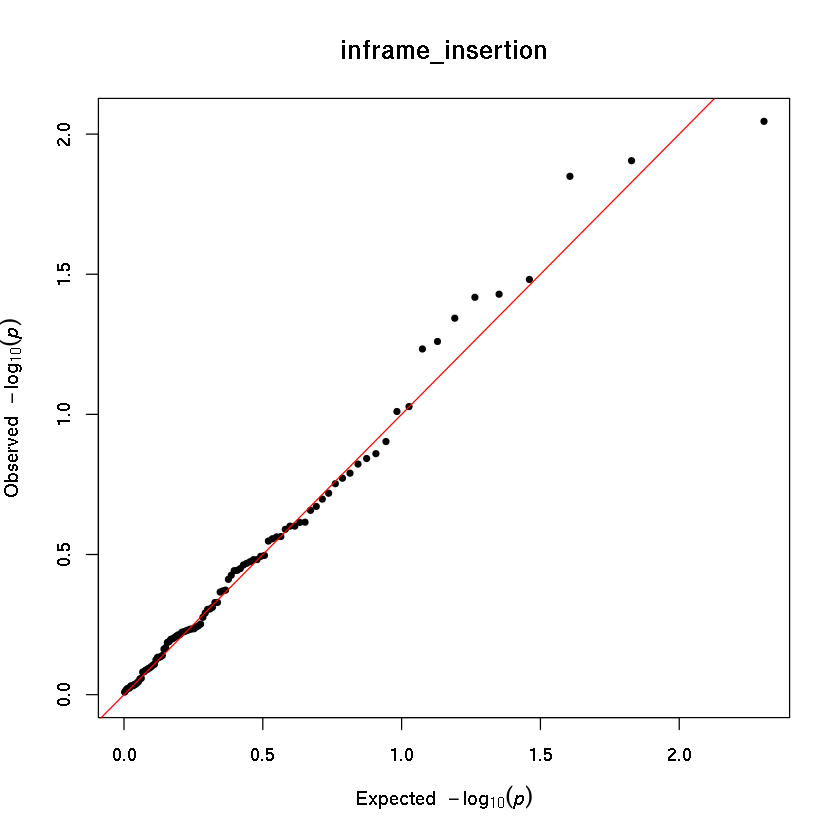

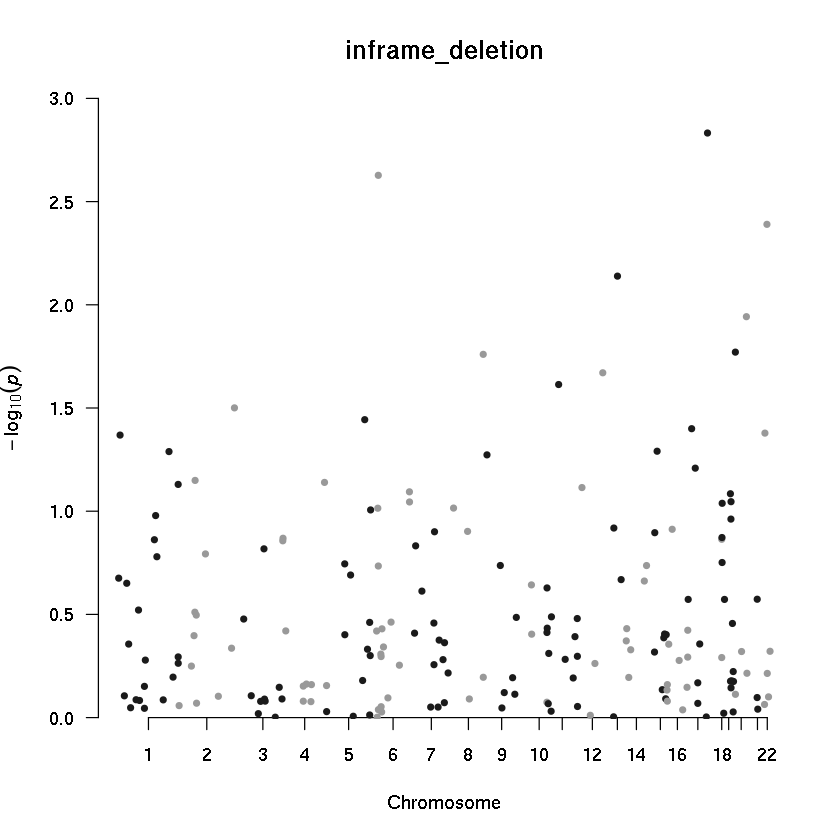

[1] "frameshift_variant"
[1] 241  23


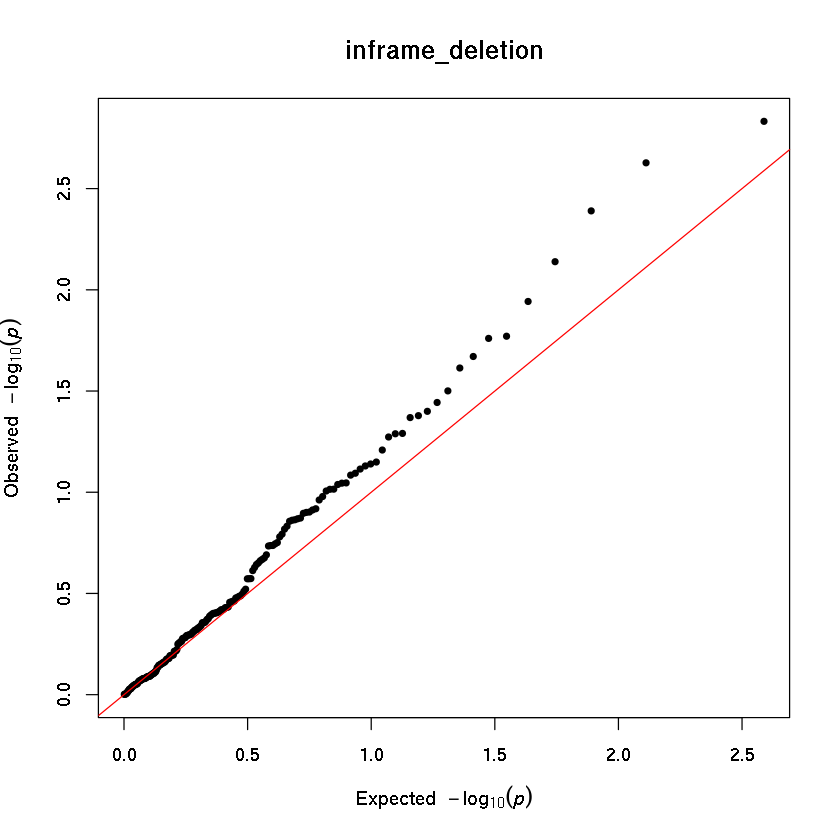

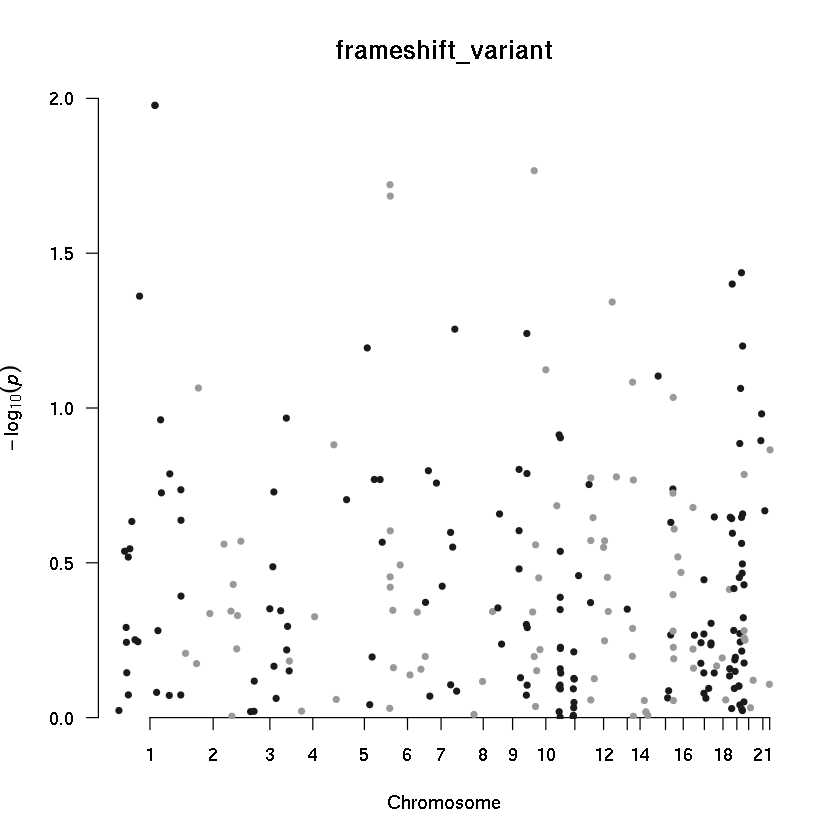

[1] "splice_donor_variant"
[1] 81 23


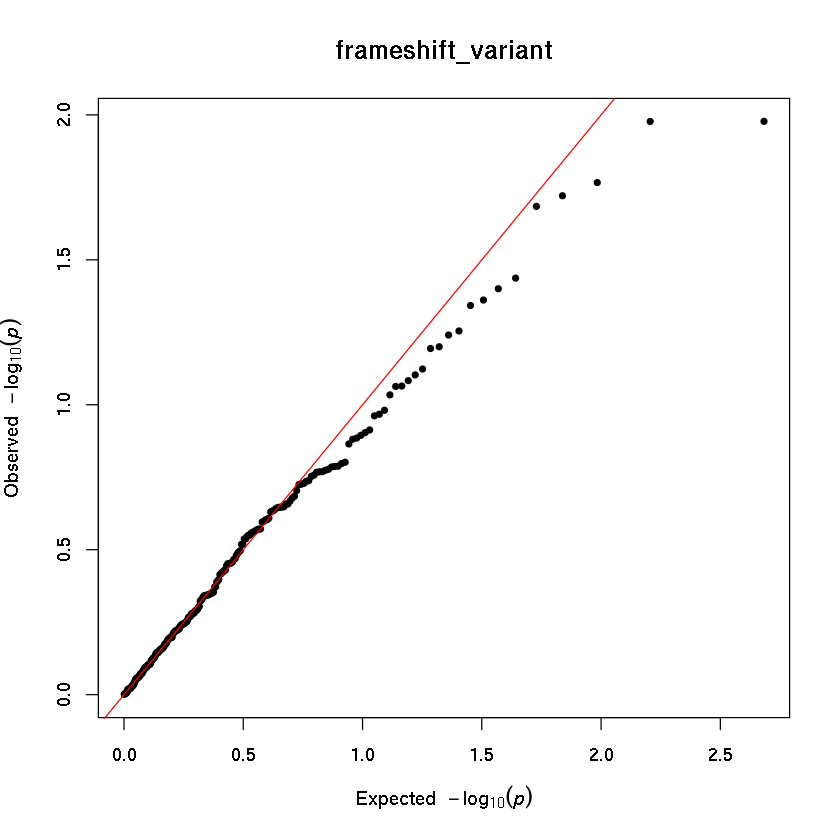

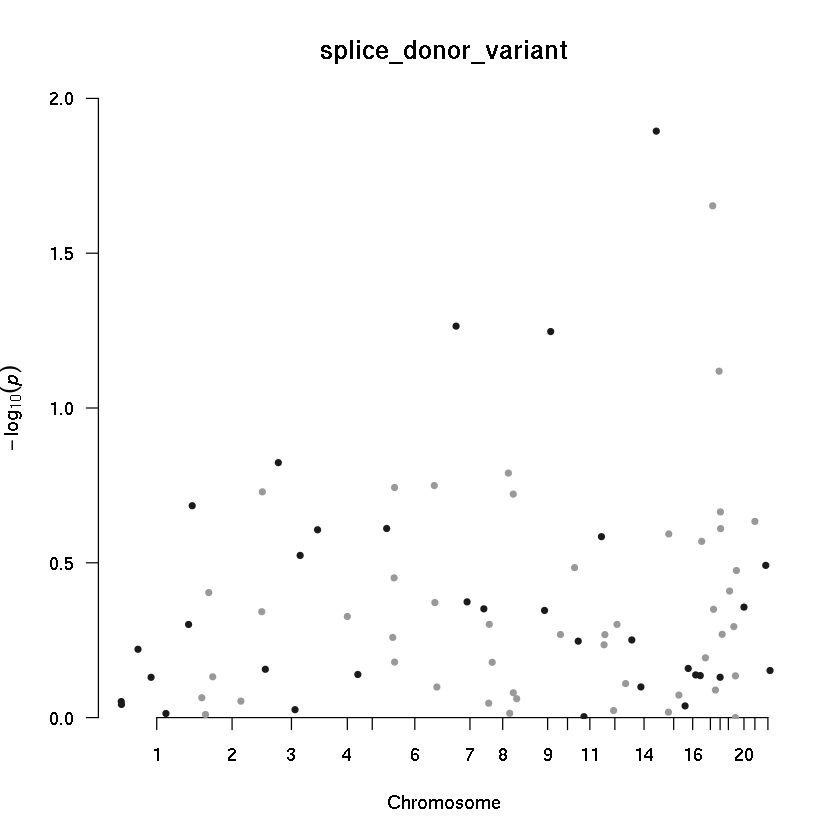

[1] "stop_gained"
[1] 206  23


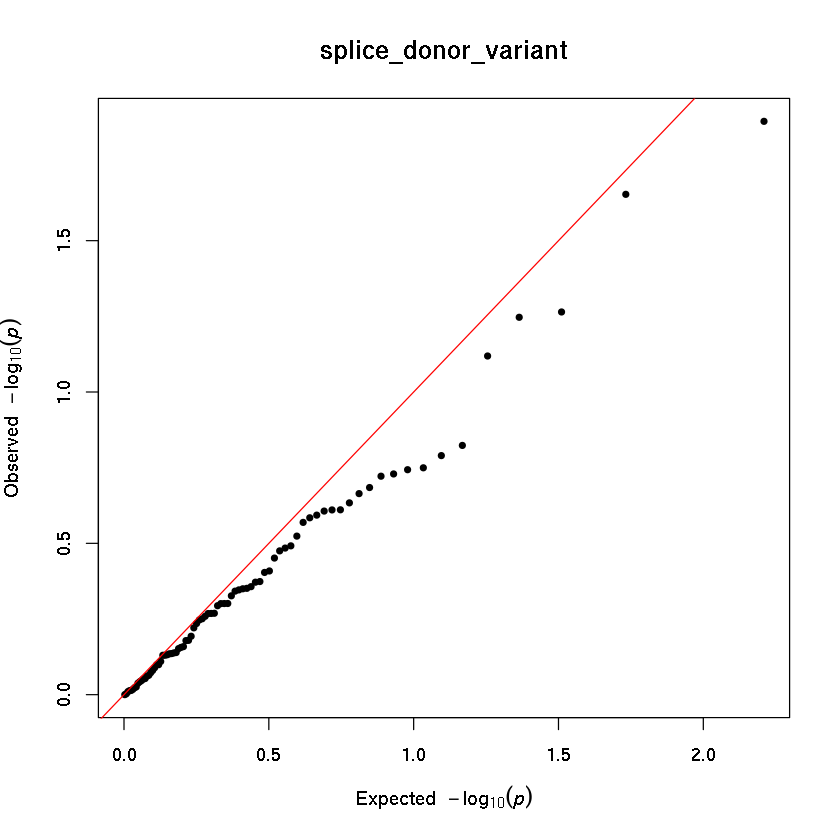

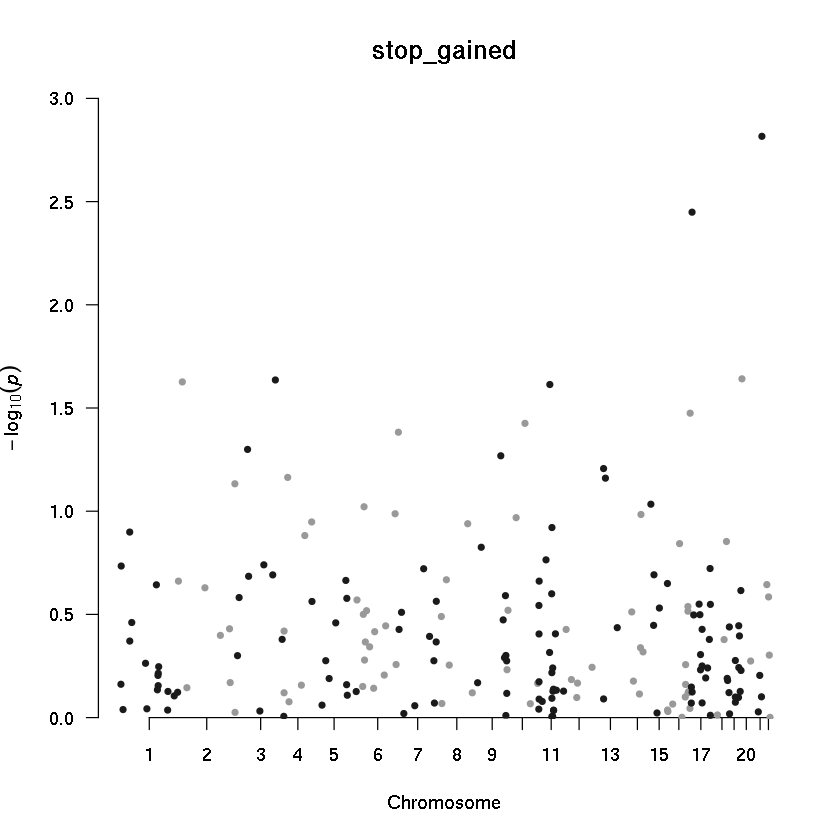

[1] "stop_lost"
[1] 51 23


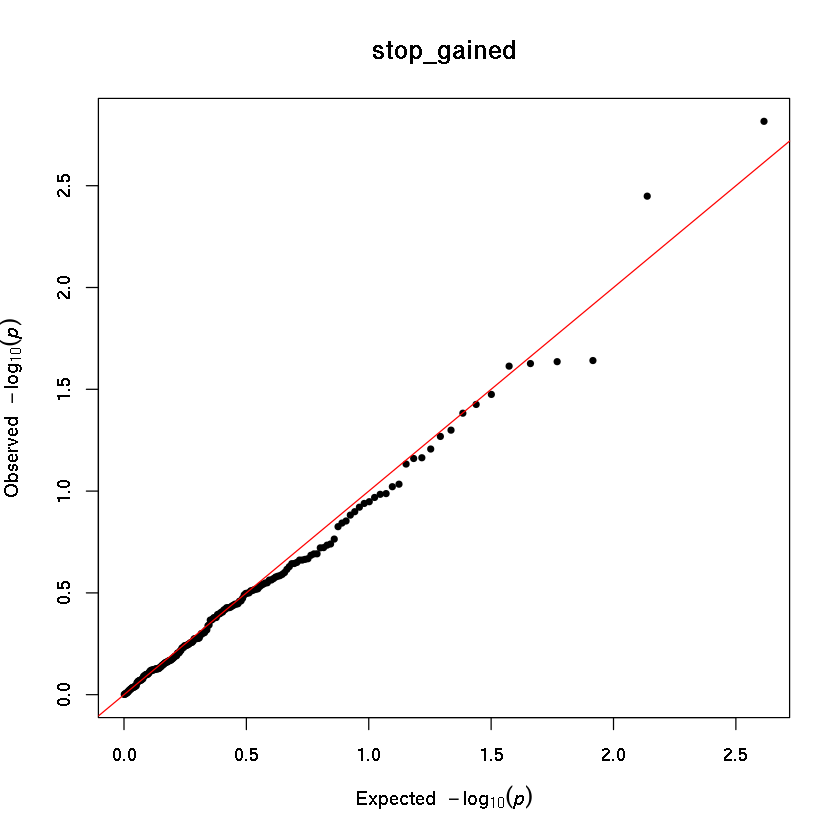

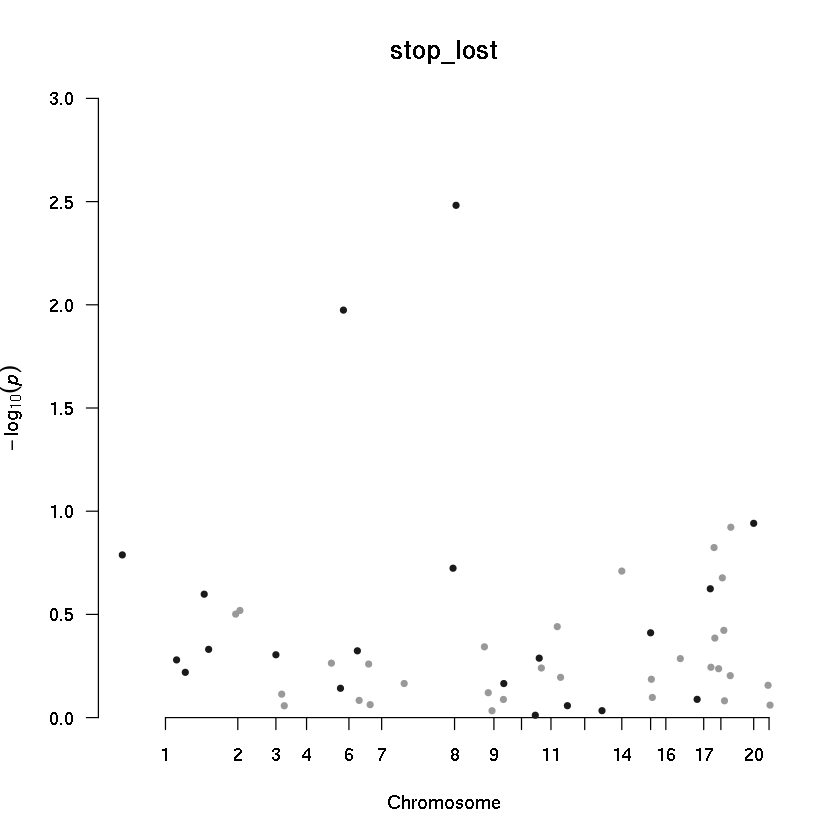

[1] "downstream_gene_variant"
[1] 74 23


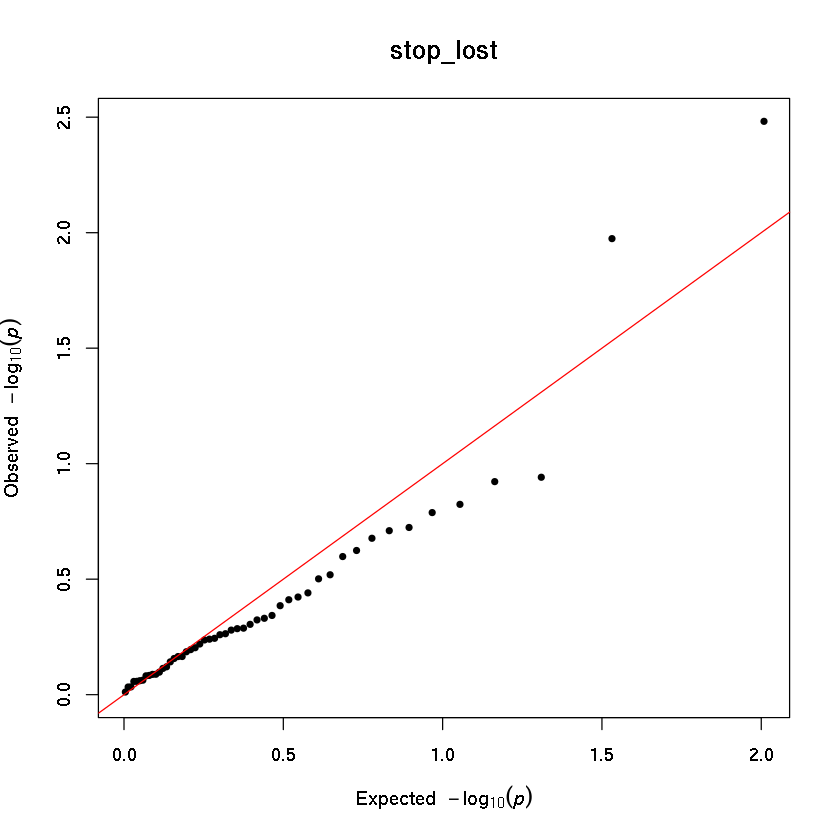

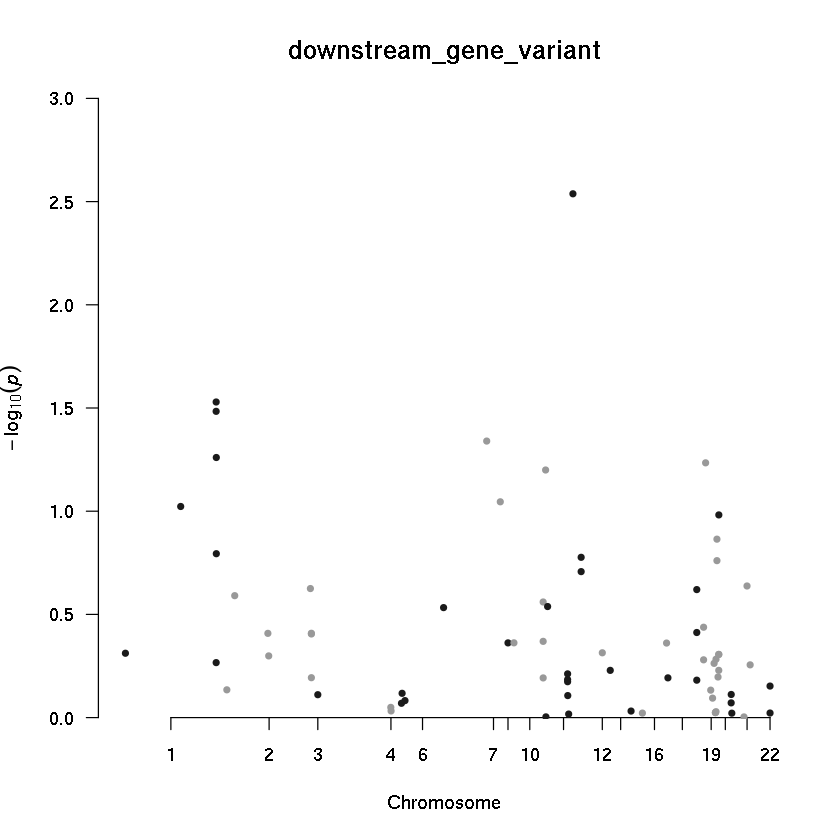

[1] "stop_retained_variant"
[1] 22 23


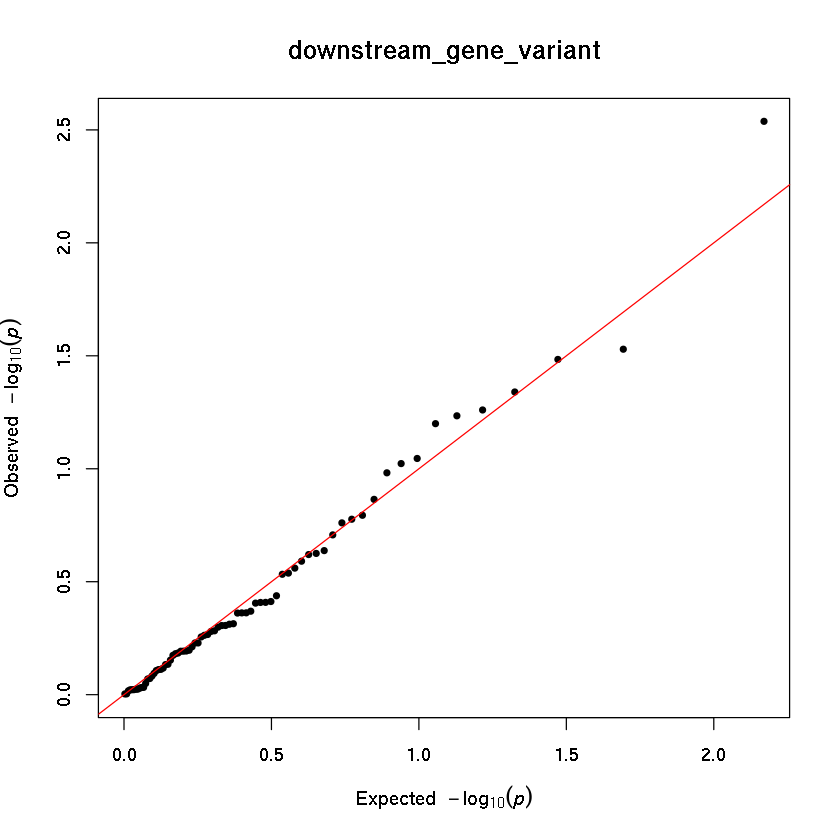

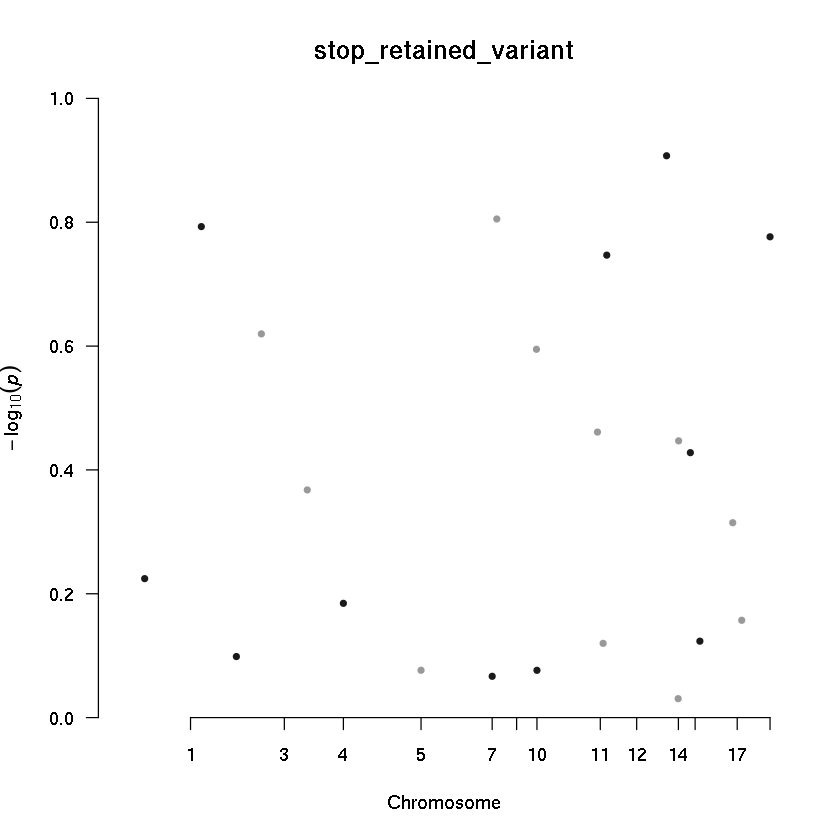

[1] "start_lost"
[1] 75 23


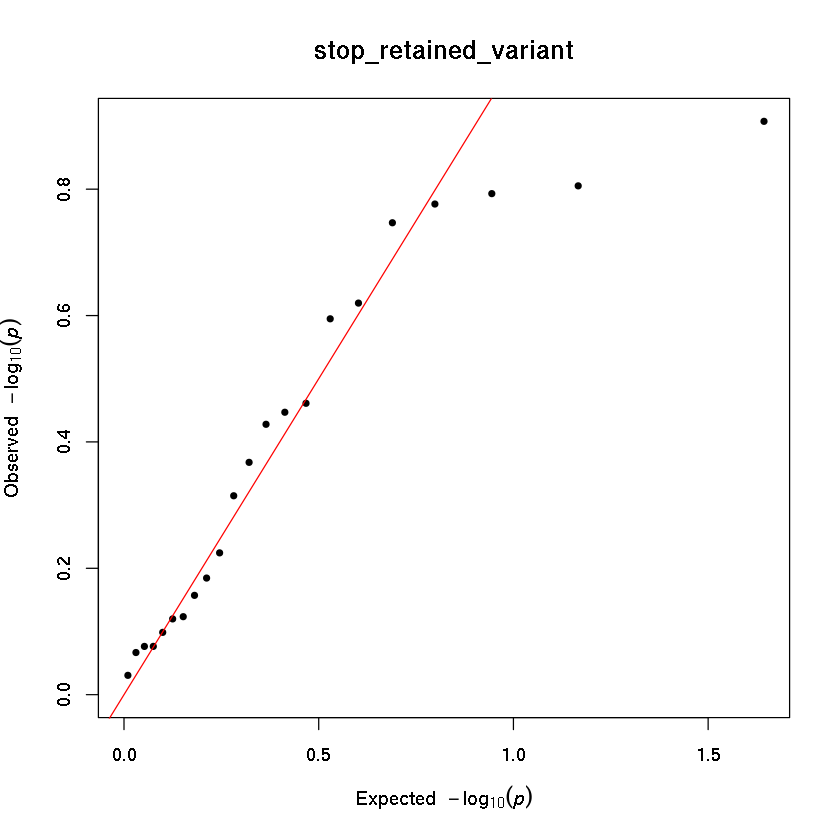

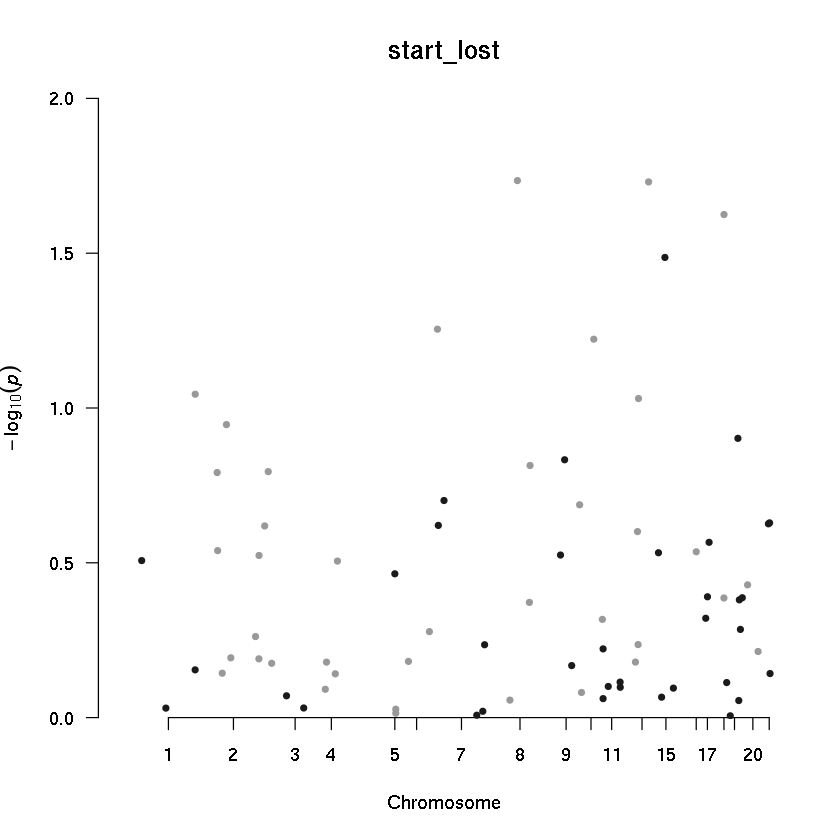

[1] "protein_altering_variant"
[1]  1 23


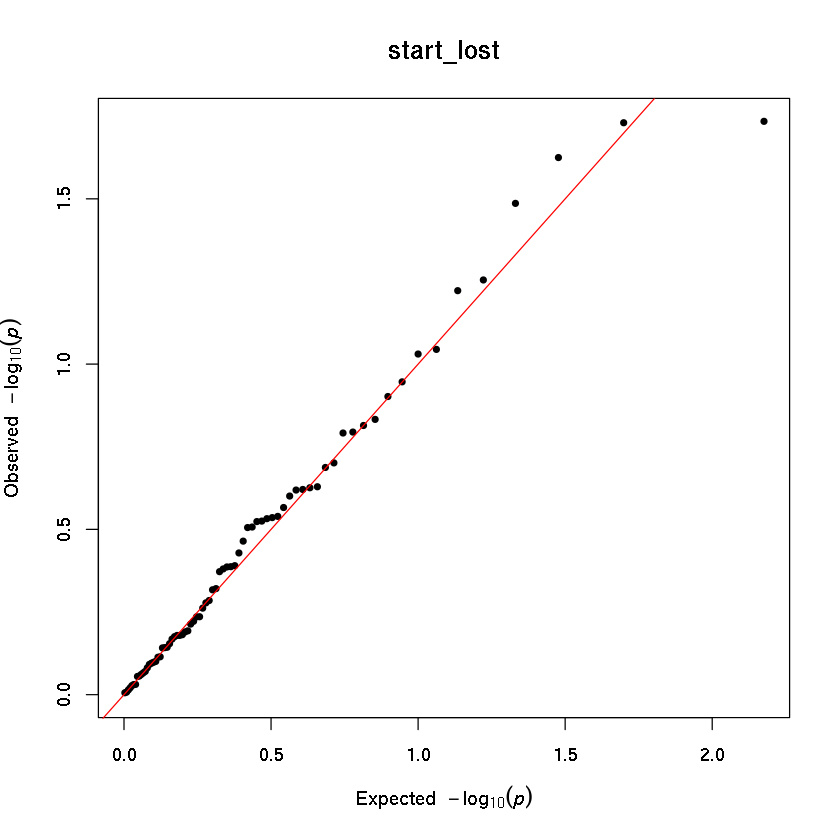

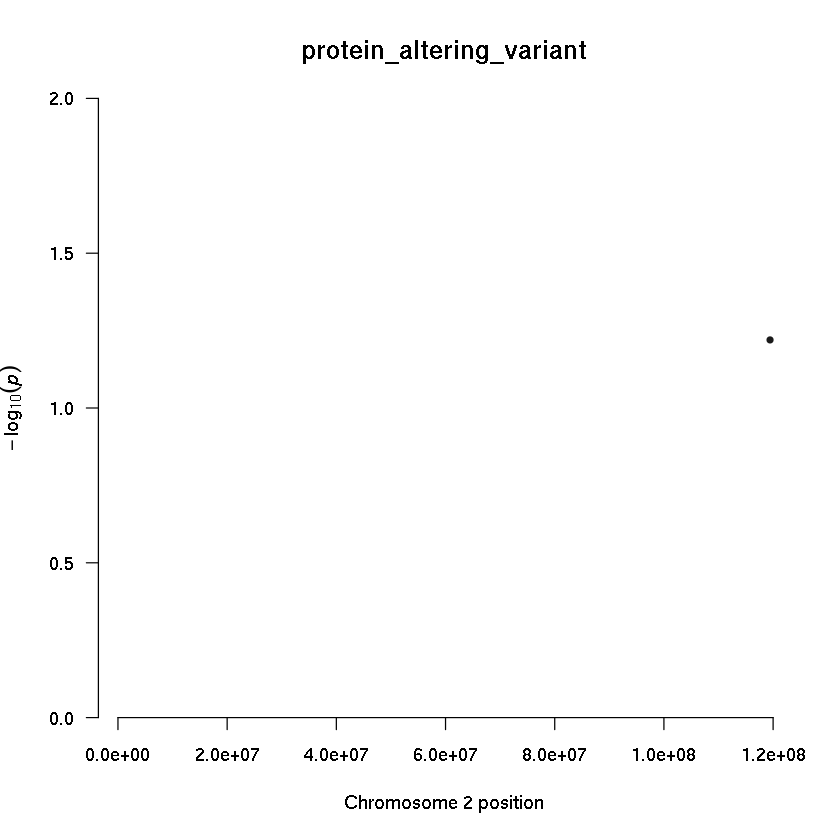

[1] "regulatory_region_variant"
[1]  2 23


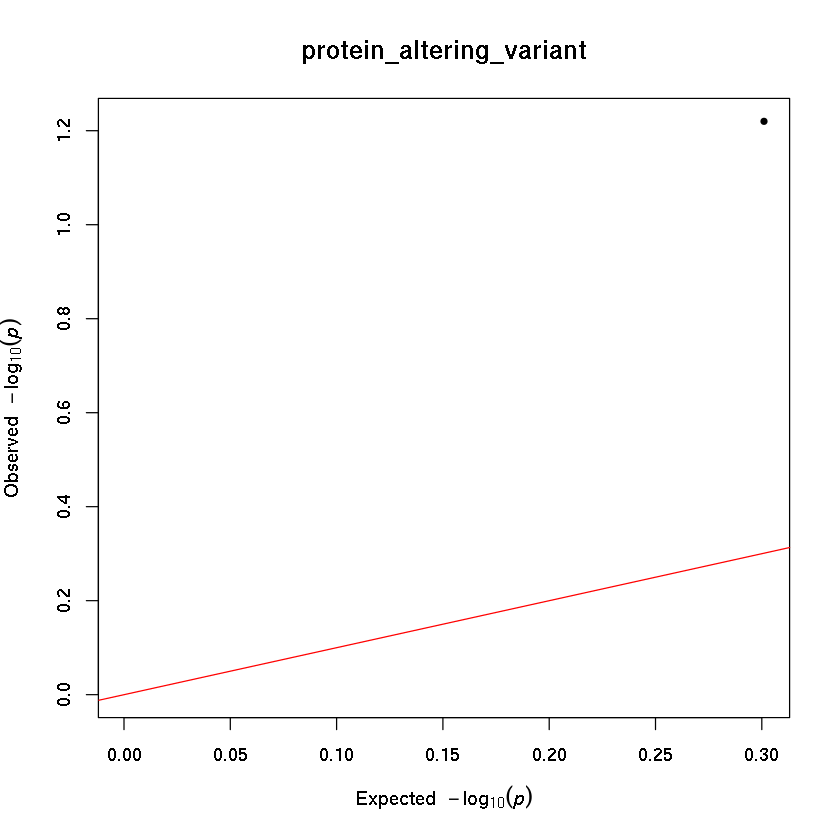

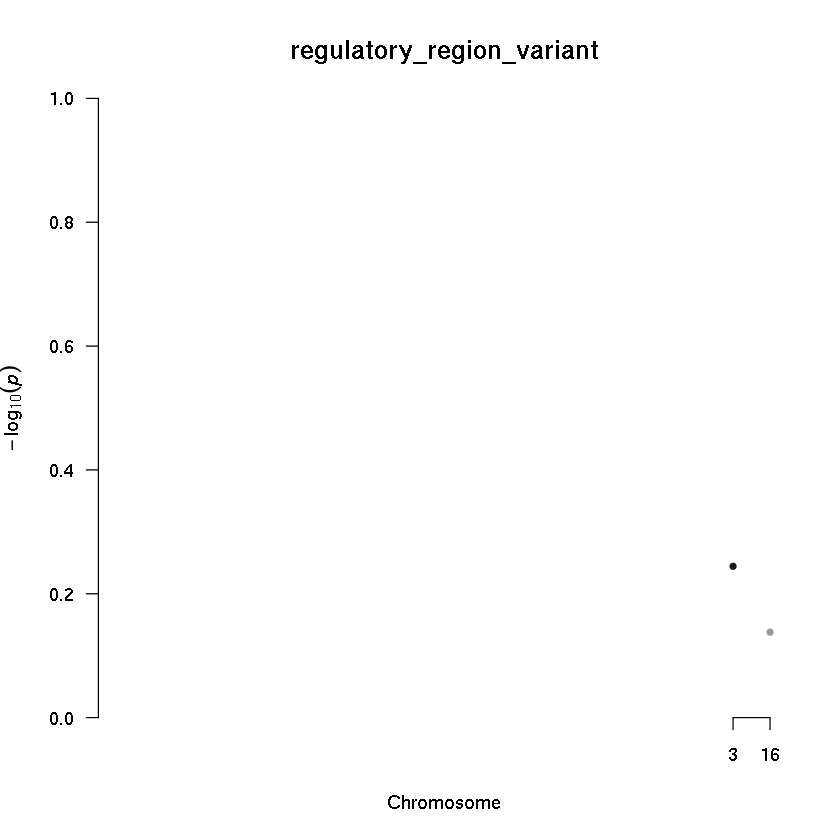

[1] "mature_miR\"\"_variant"
[1]  6 23


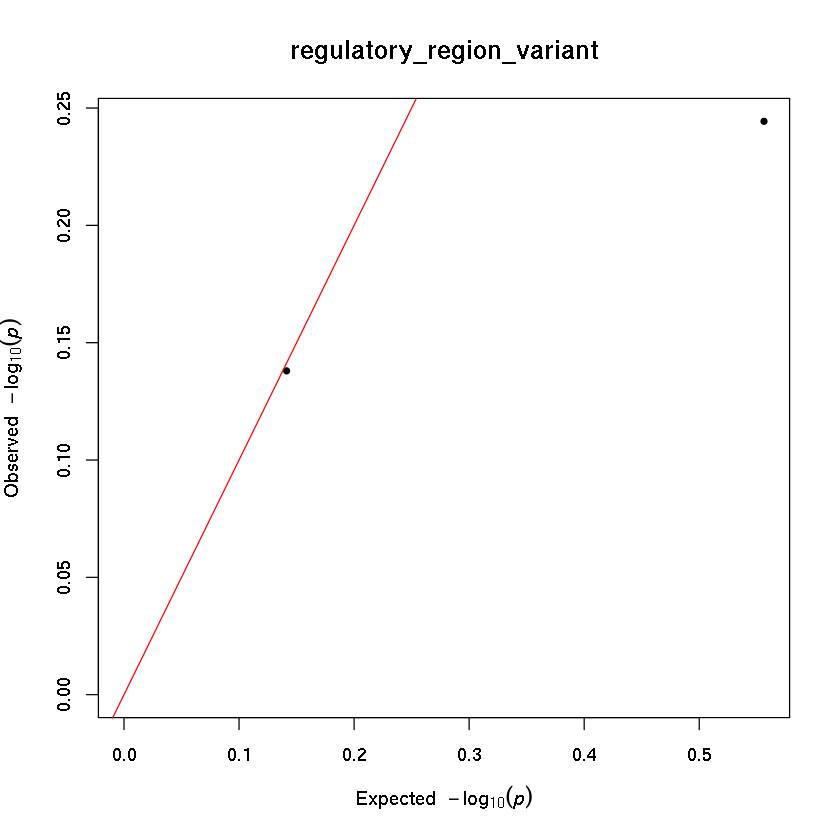

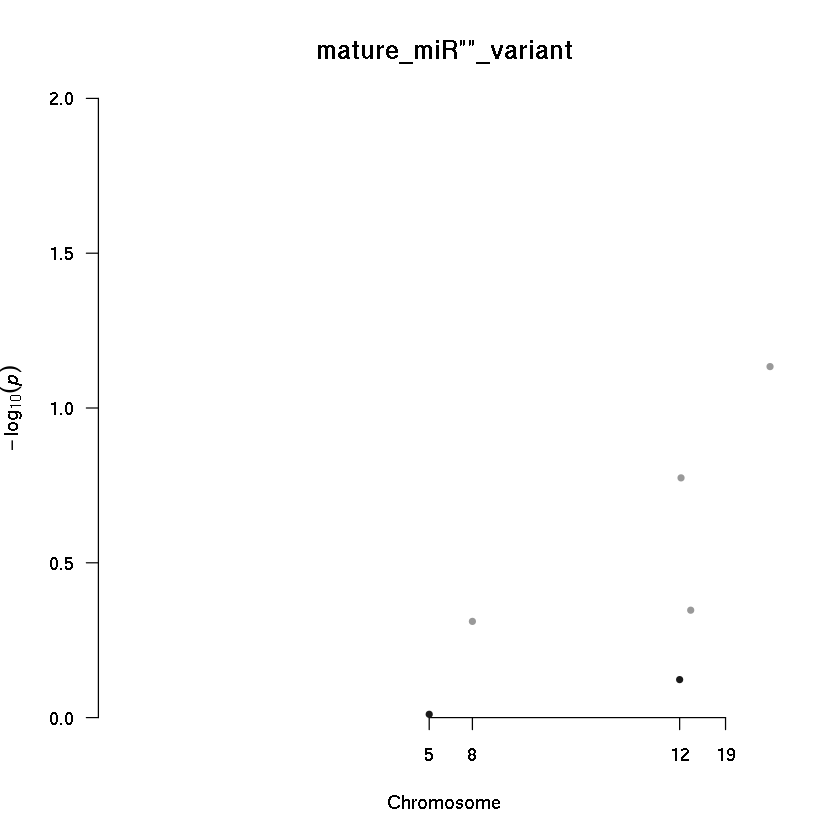

[1] "coding_sequence_variant"
[1]  5 23


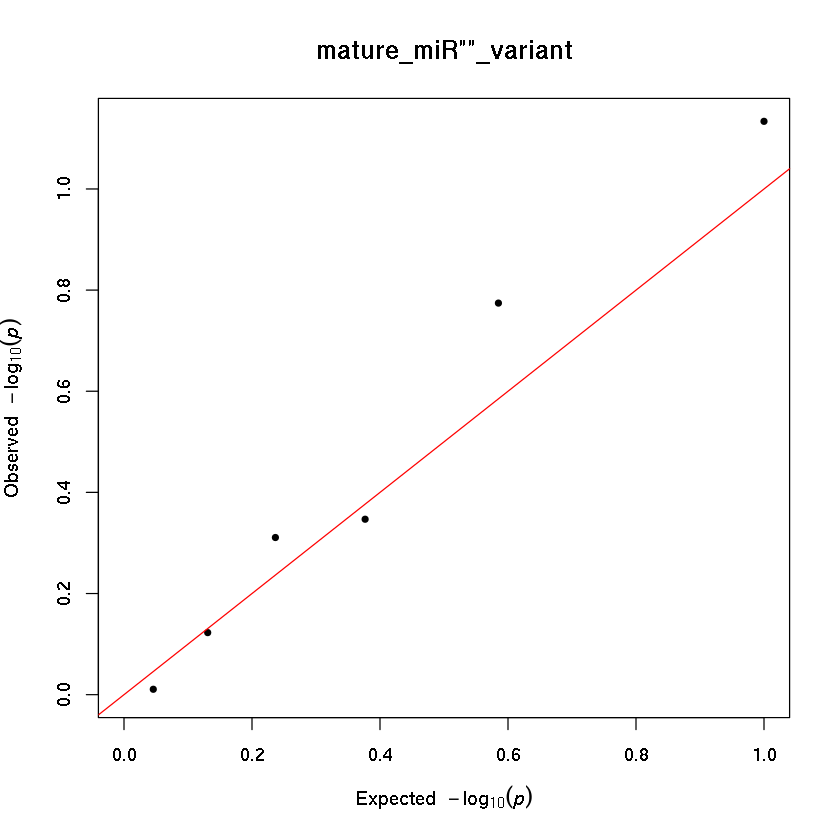

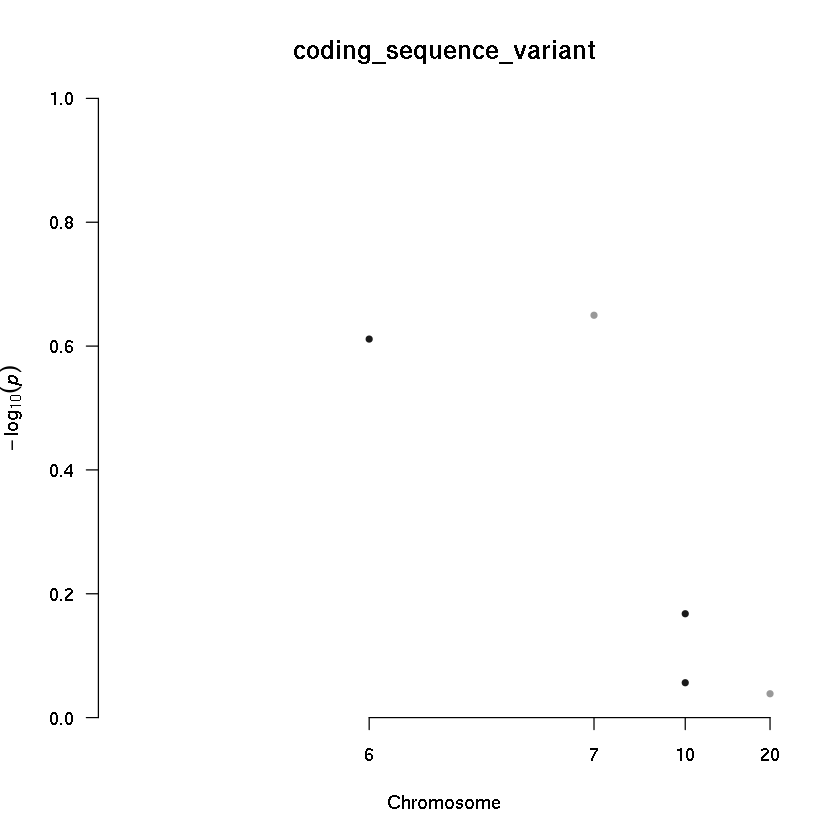

[1] "incomplete_terminal_codon_variant"
[1]  1 23


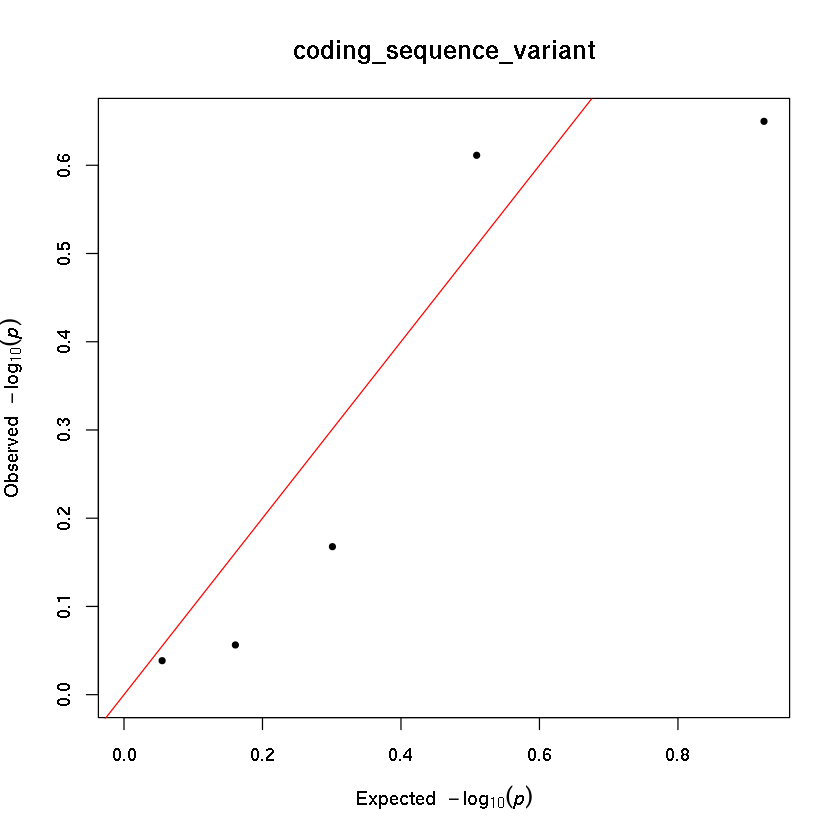

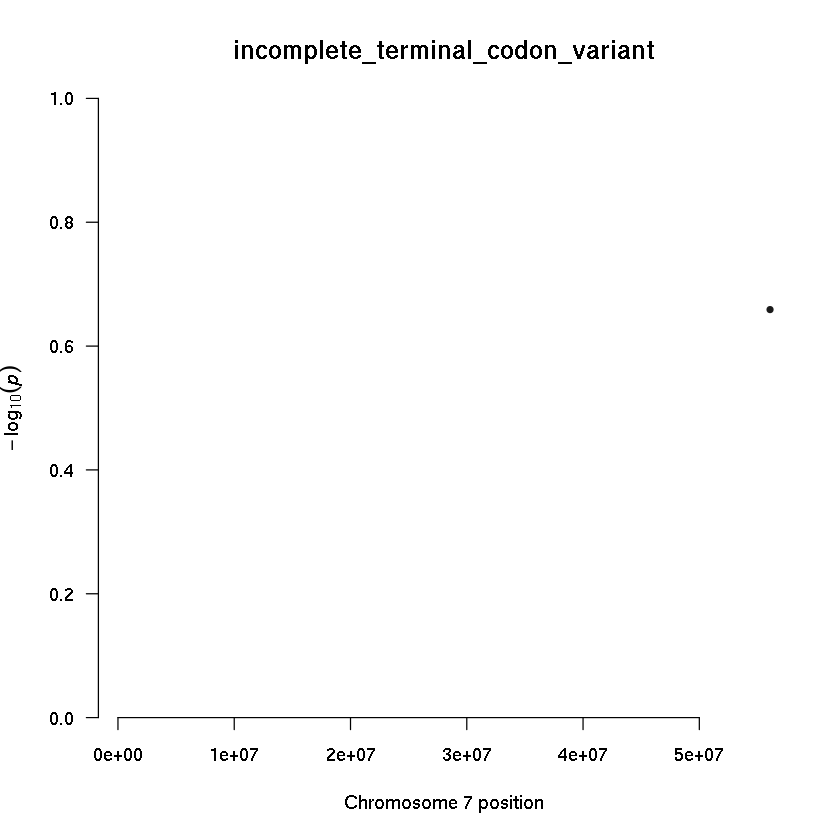

[1] "intergenic_variant"
[1]  7 23


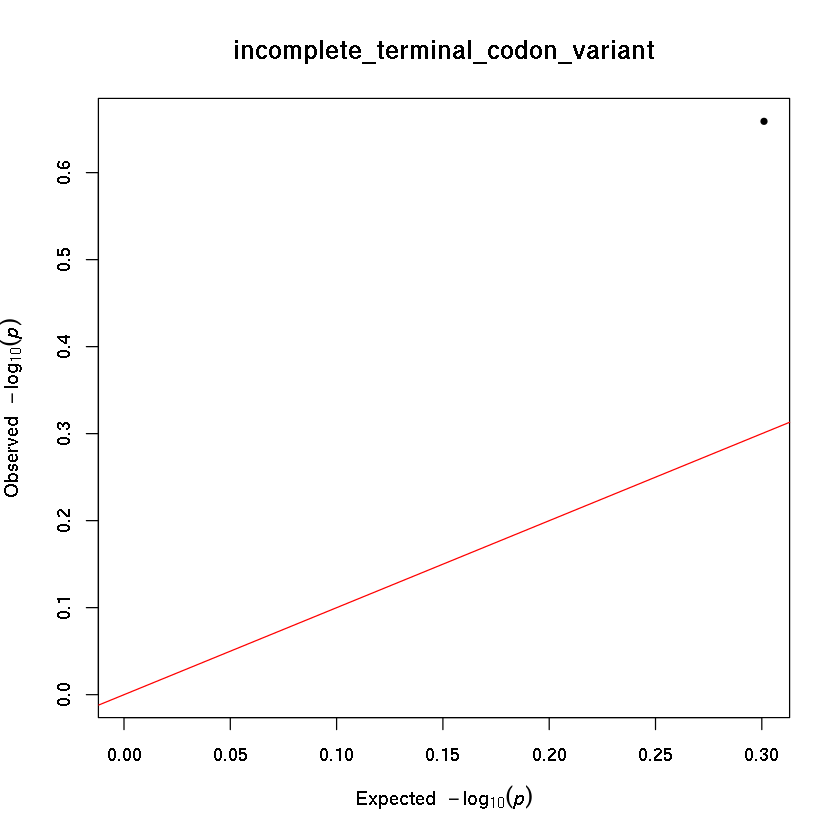

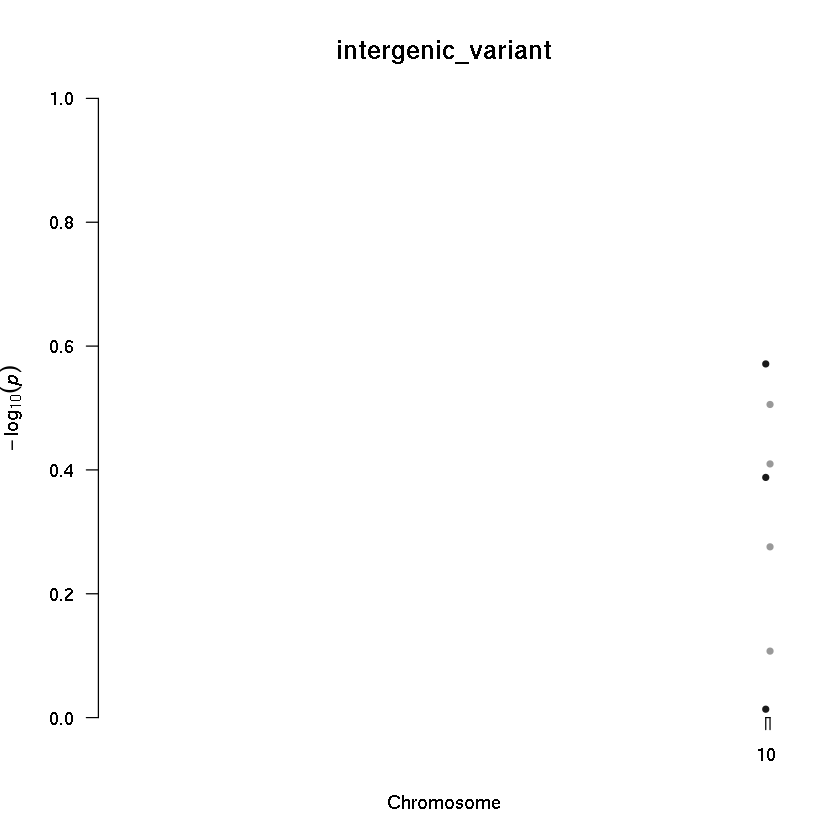

CHR BP     ID           REF ALT A1 FIRTH? TEST OBS_CT OR      ⋯
1:942934:G:C 1   942934 1:942934:G:C G   C   C  N      ADD  36256  1.31564 ⋯
1:942951:C:T 1   942951 1:942951:C:T C   T   T  N      ADD  36257  1.75439 ⋯
1:943937:C:T 1   943937 1:943937:C:T C   T   T  N      ADD  36257  1.23530 ⋯
1:944296:G:A 1   944296 1:944296:G:A G   A   G  N      ADD  36257  1.49284 ⋯
1:944307:T:C 1   944307 1:944307:T:C T   C   T  N      ADD  36257  1.27921 ⋯
1:944858:A:G 1   944858 1:944858:A:G A   G   A  N      ADD  36124  1.25420 ⋯
             ERRCODE SNP          CHROM POS    rsID        Gene           
1:942934:G:C .       1:942934:G:C 1     942934 rs142558220 ENSG00000187634
1:942951:C:T .       1:942951:C:T 1     942951 rs148327885 ENSG00000187634
1:943937:C:T .       1:943937:C:T 1     943937 rs7523549   ENSG00000187634
1:944296:G:A .       1:944296:G:A 1     944296 rs6605067   ENSG00000188976
1:944307:T:C .       1:944307:T:C 1     944307 rs2839      ENSG00000188976
1:944858:A:G .       1:944858:A:G 1     944858 rs3748592   ENSG00000188976
             Consequence        
1:942934:G:C synonymous_variant 
1:942951:C:T missense_variant   
1:943937:C:T synonymous_variant 
1:944296:G:A 3_prime_UTR_variant
1:944307:T:C 3_prime_UTR_variant
1:944858:A:G intron_variant     
             HGVSp                                                                                                                                                                                                                                          
1:942934:G:C ENSP00000349216.4:p.Gly388=,ENSP00000342313.3:p.Gly480=,ENSP00000412228.1:p.Gly307=,ENSP00000484643.1:p.Gly372=,ENSP00000482090.1:p.Gly400=,ENSP00000480870.1:p.Gly355=,ENSP00000484256.1:p.Gly418=,ENSP00000482138.1:p.Gly481=                
1:942951:C:T ENSP00000349216.4:p.Pro394Leu,ENSP00000342313.3:p.Pro486Leu,ENSP00000412228.1:p.Pro313Leu,ENSP00000484643.1:p.Pro378Leu,ENSP00000482090.1:p.Pro406Leu,ENSP00000480870.1:p.Pro361Leu,ENSP00000484256.1:p.Pro424Leu,ENSP00000482138.1:p.Pro487Leu
1:943937:C:T ENSP00000349216.4:p.Tyr518=,ENSP00000342313.3:p.Tyr610=,ENSP00000412228.1:p.Tyr470=,ENSP00000484643.1:p.Tyr502=,ENSP00000482090.1:p.Tyr530=,ENSP00000480870.1:p.Tyr485=,ENSP00000484256.1:p.Tyr548=,ENSP00000482138.1:p.Tyr611=                
1:944296:G:A                                                                                                                                                                                                                                                
1:944307:T:C                                                                                                                                                                                                                                                
1:944858:A:G                                                                                                                                                                                                                                                
             LoF Gene_symbol
1:942934:G:C     SAMD11     
1:942951:C:T     SAMD11     
1:943937:C:T     SAMD11     
1:944296:G:A     NOC2L      
1:944307:T:C     NOC2L      
1:944858:A:G     NOC2L

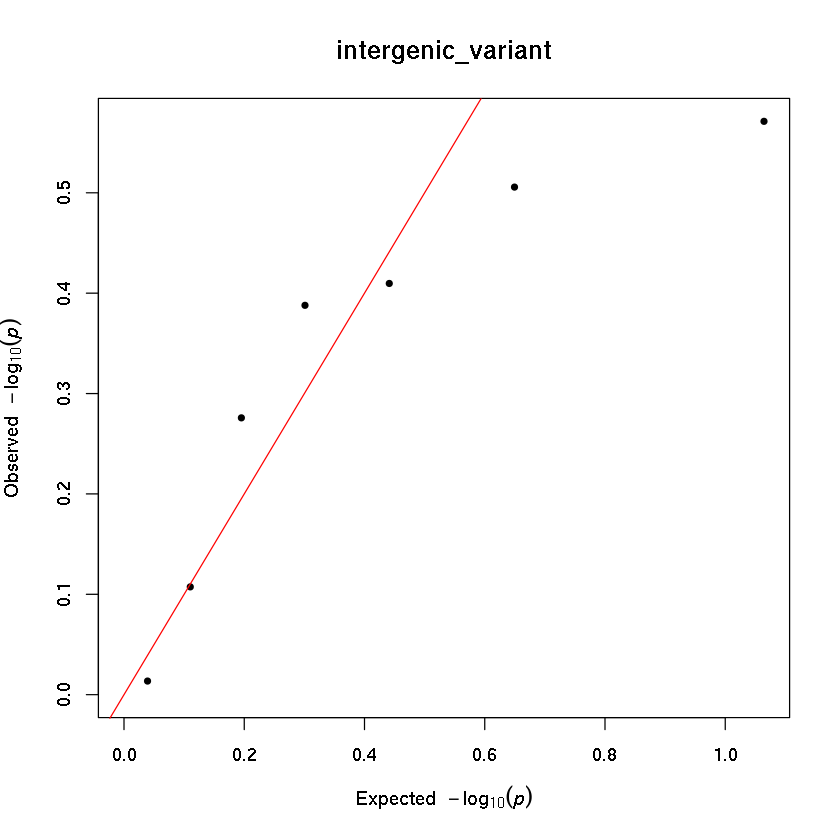

In [5]:
gwasres = parse_gwasres(
    "intra_eu_beds_v2/age_adj_gwas_no_exclude_10pcs.class.glm.logistic.hybrid",
    annots_m)
gwasres = gwasres[!is.na(gwasres$P),]
gwasres$Consequence[is.na(gwasres$Consequence)] = "NA"
for(cons in unique(gwasres$Consequence)){
    currd = gwasres[cons == gwasres$Consequence,]
    print(cons)
    print(dim(currd))
    try({
        manhattan(currd,annotateTop=F,annotatePval=5e-8,snp="Gene_symbol",main=cons)
        qq(currd$P,main=cons) 
    })
}
head(gwasres)

# EU: small cluster

[1] "synonymous_variant"
[1] 18708    23


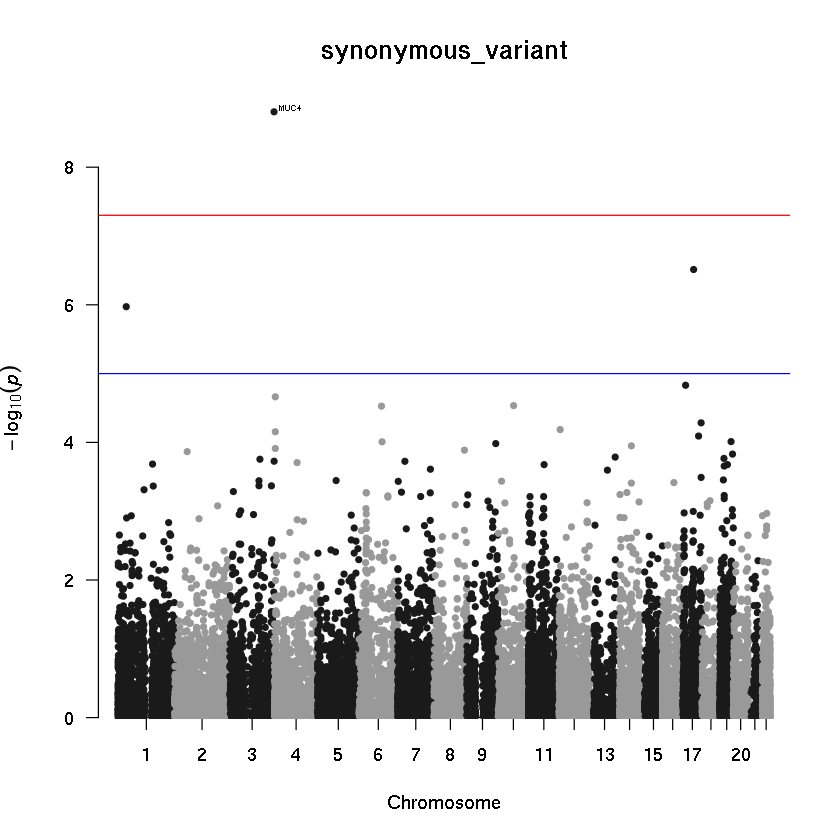

[1] "3_prime_UTR_variant"
[1] 5495   23


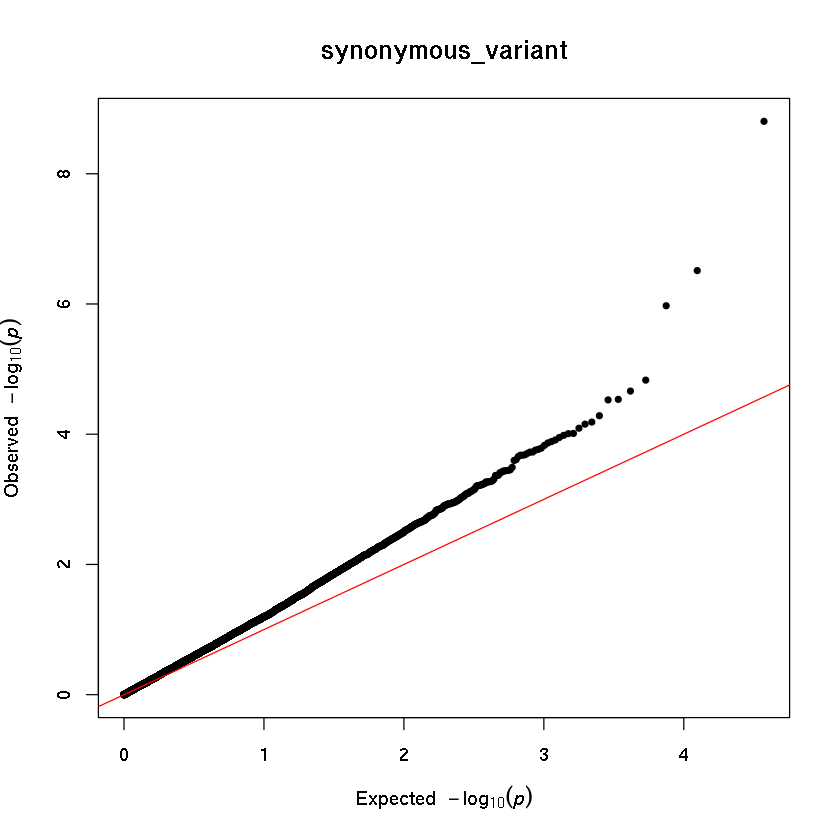

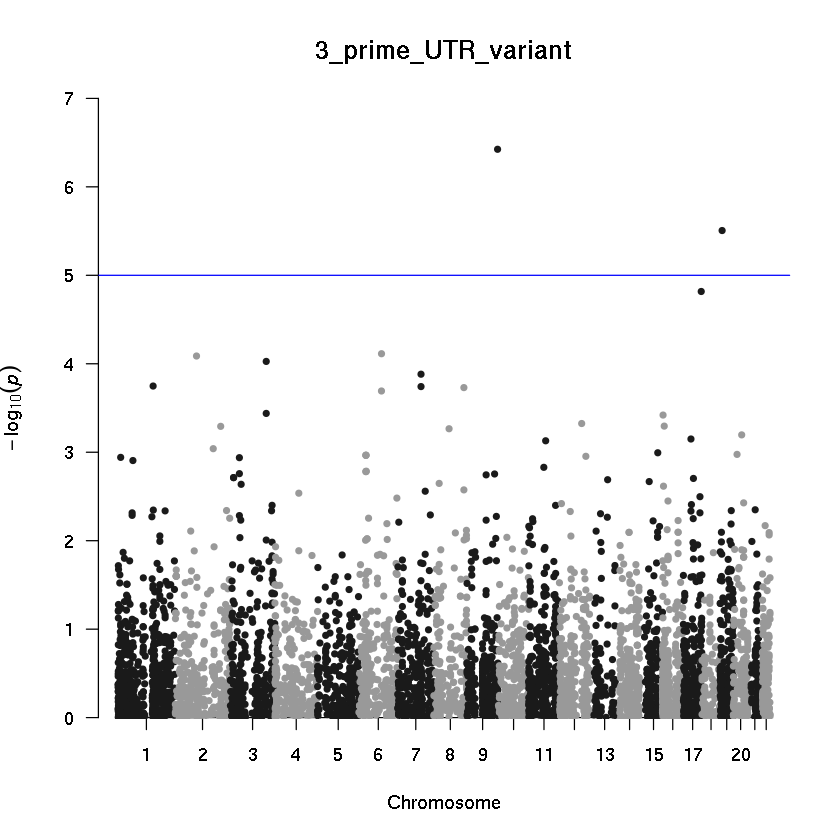

[1] "intron_variant"
[1] 27171    23


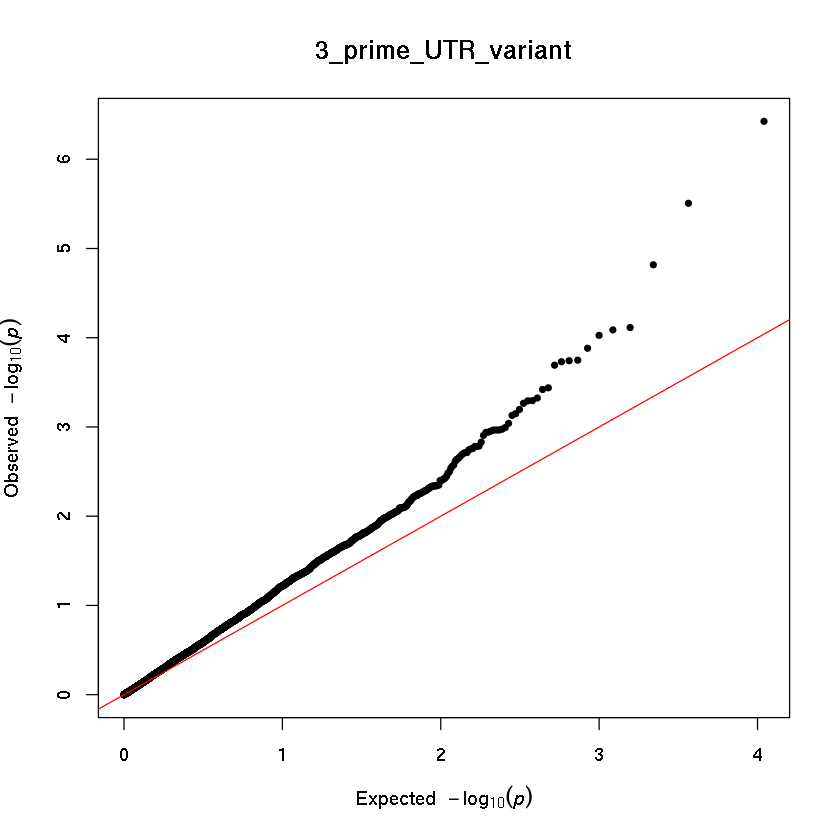

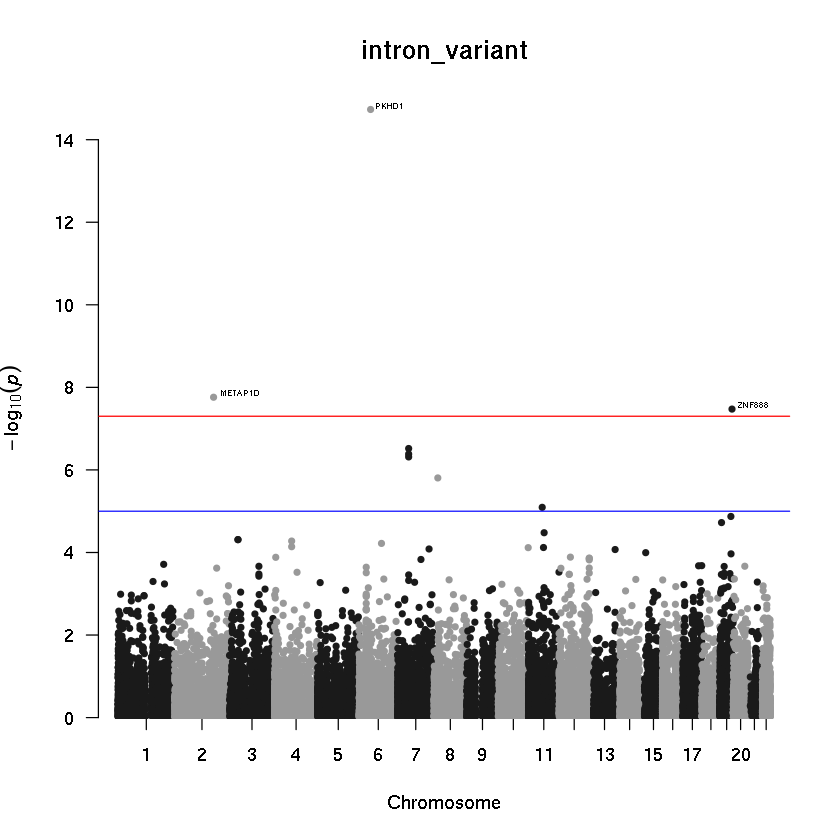

[1] "missense_variant"
[1] 17865    23


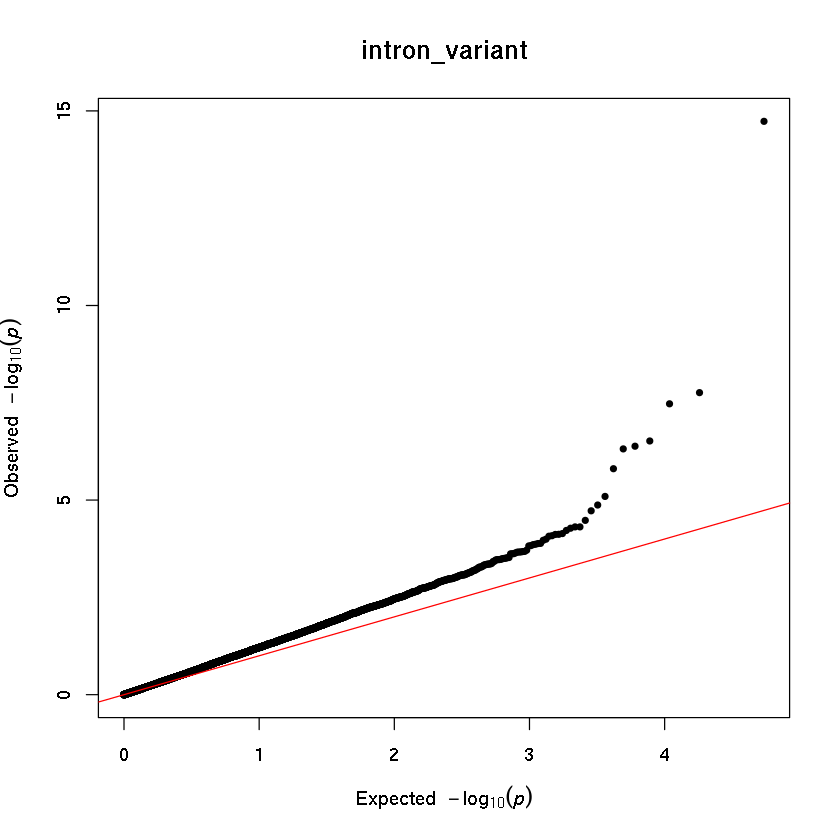

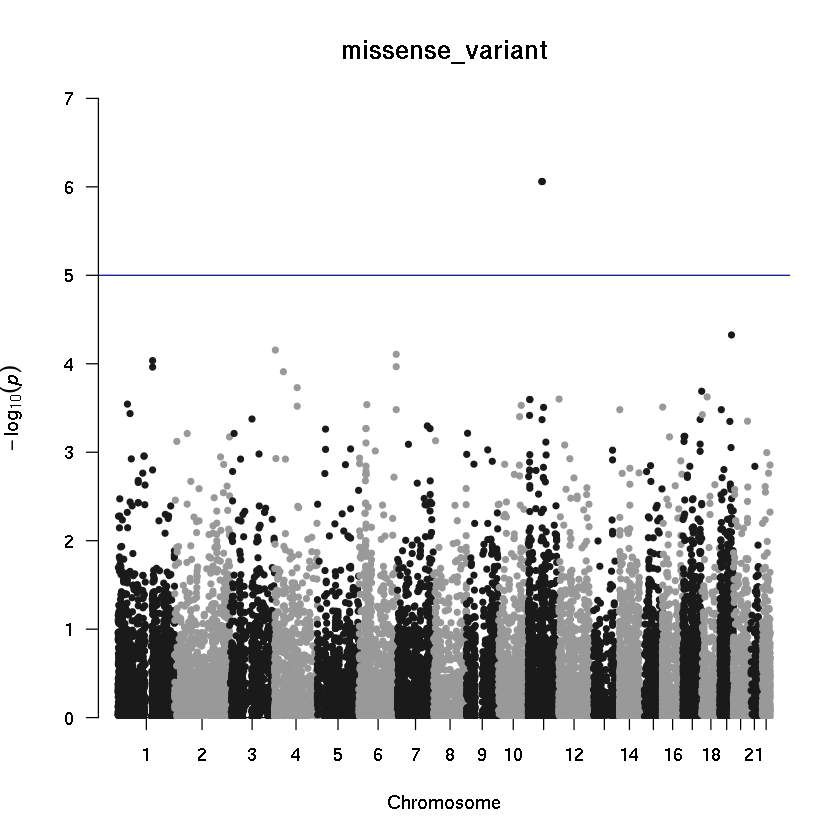

[1] "5_prime_UTR_variant"
[1] 2937   23


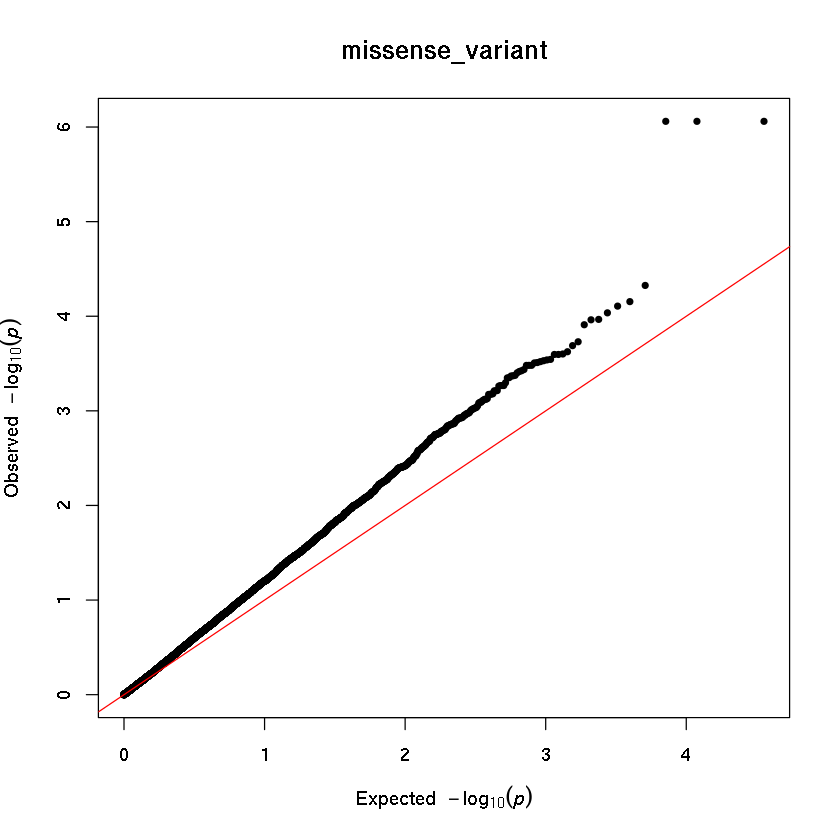

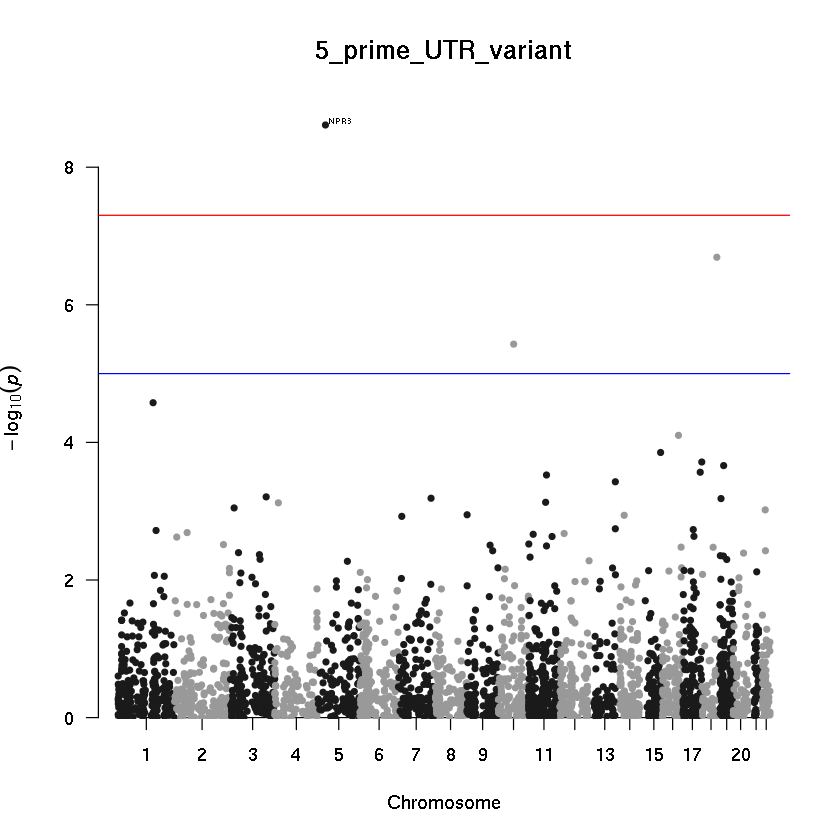

[1] "upstream_gene_variant"
[1] 215  23


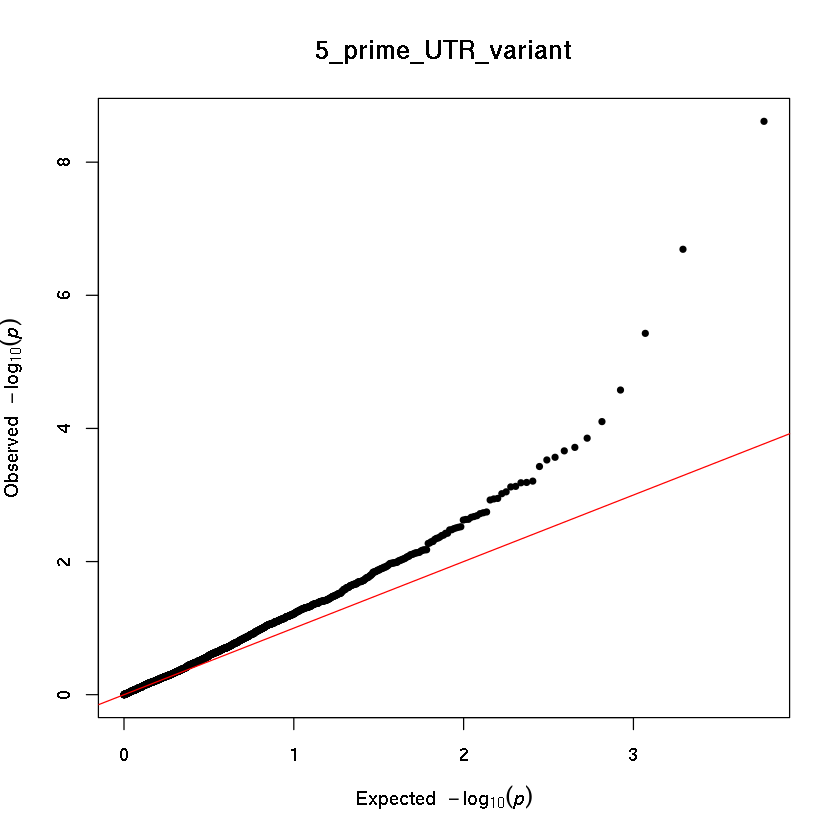

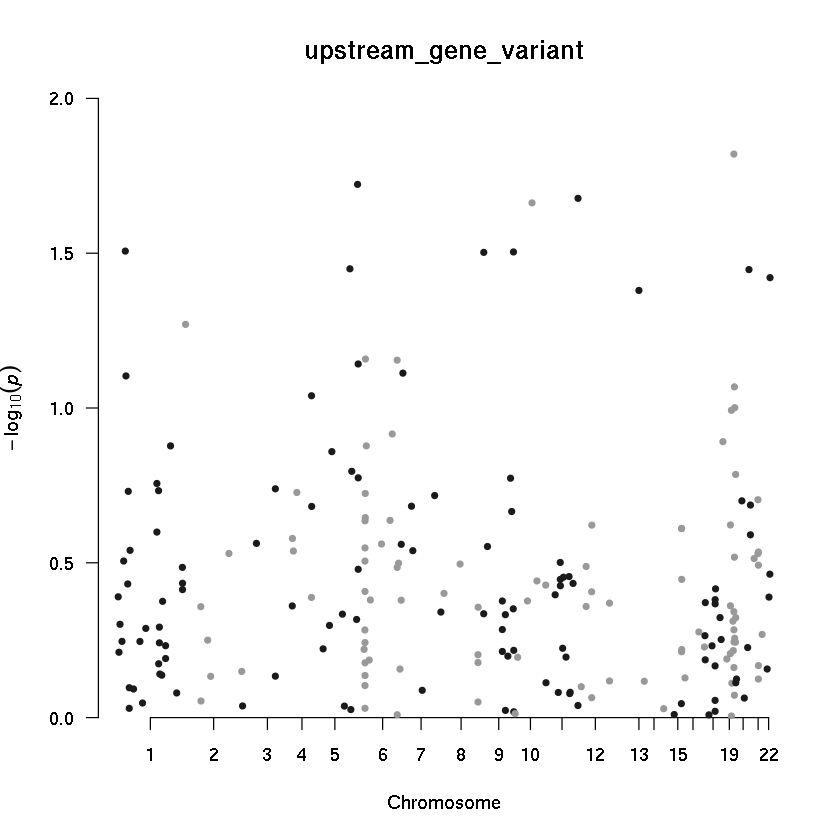

[1] "splice_region_variant"
[1] 3369   23


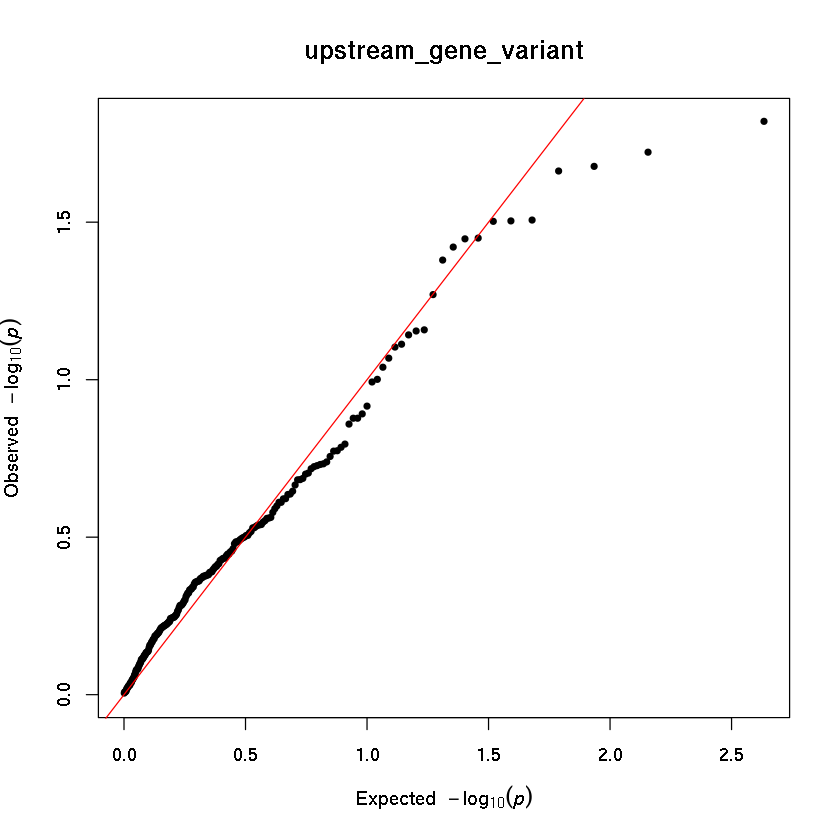

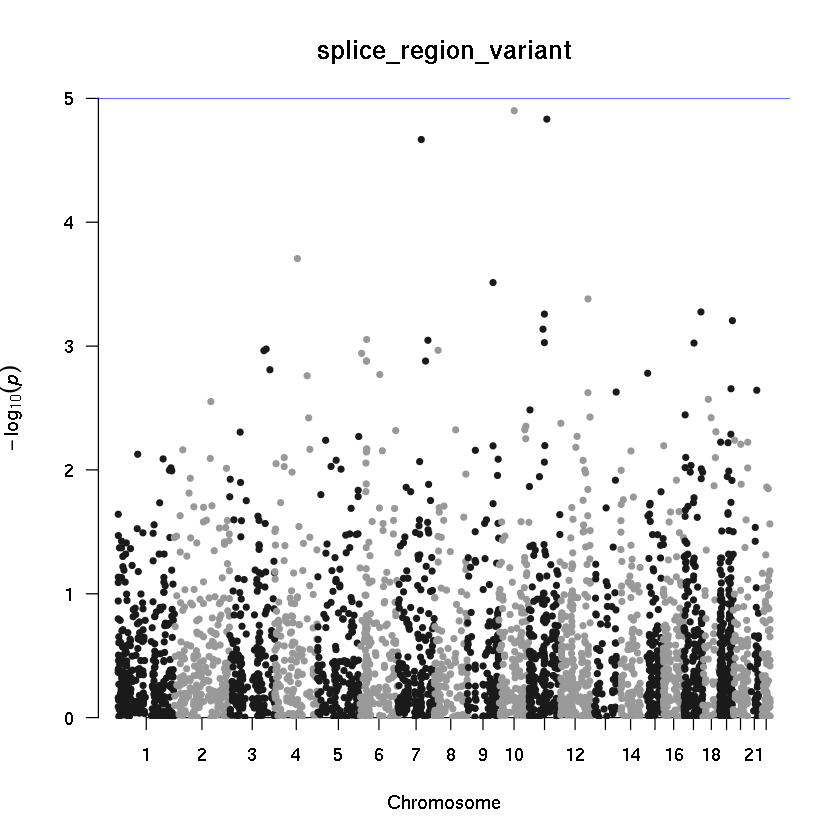

[1] "non_coding_transcript_exon_variant"
[1] 3908   23


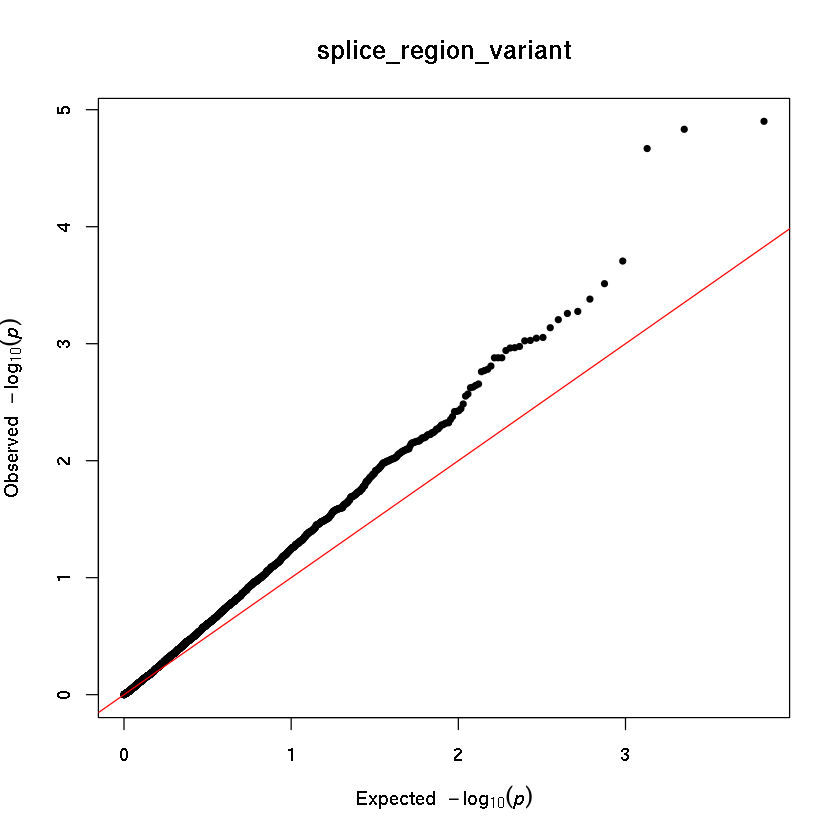

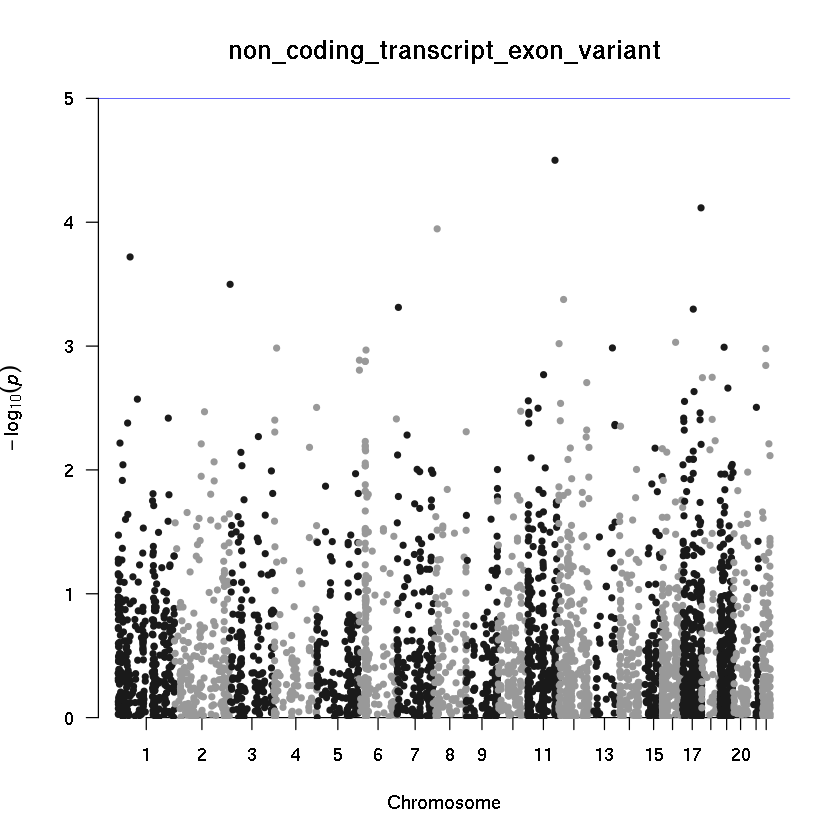

[1] "NA"
[1] 1252   23


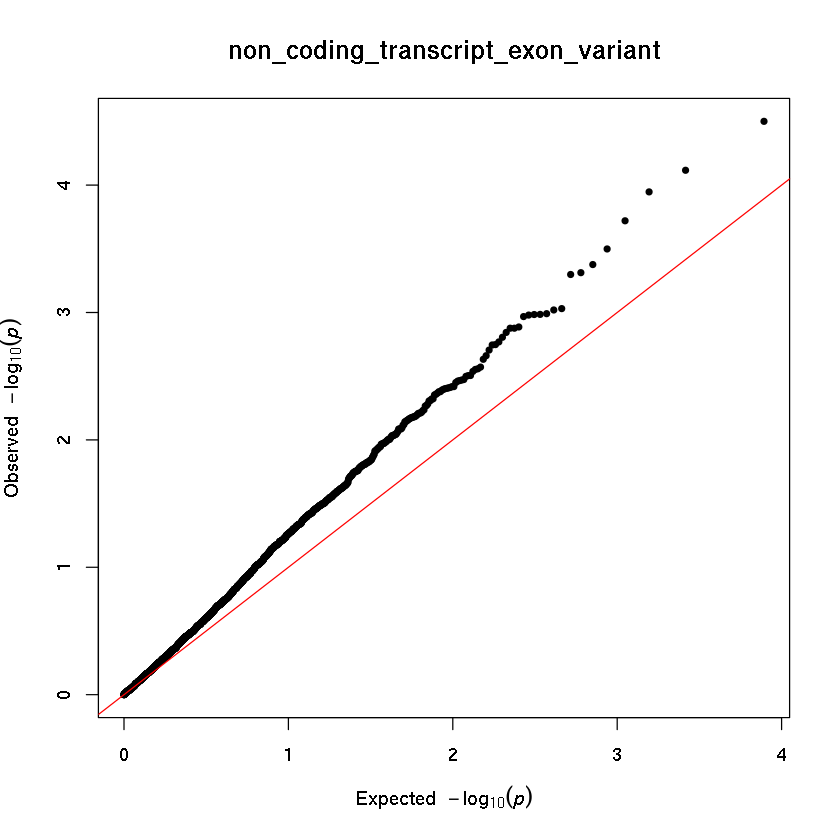

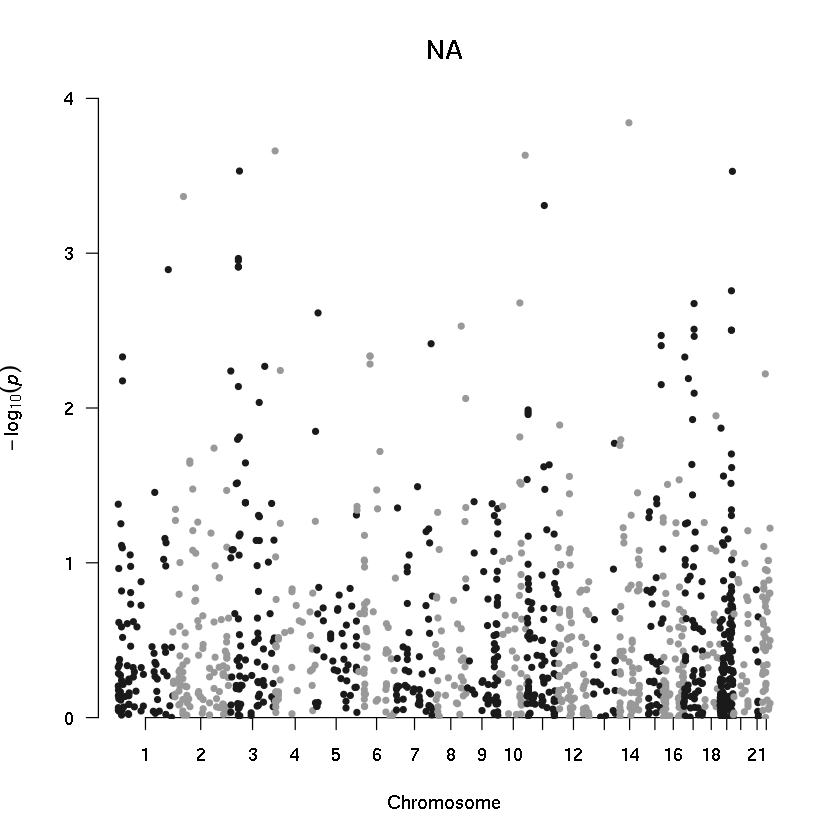

[1] "splice_acceptor_variant"
[1] 65 23


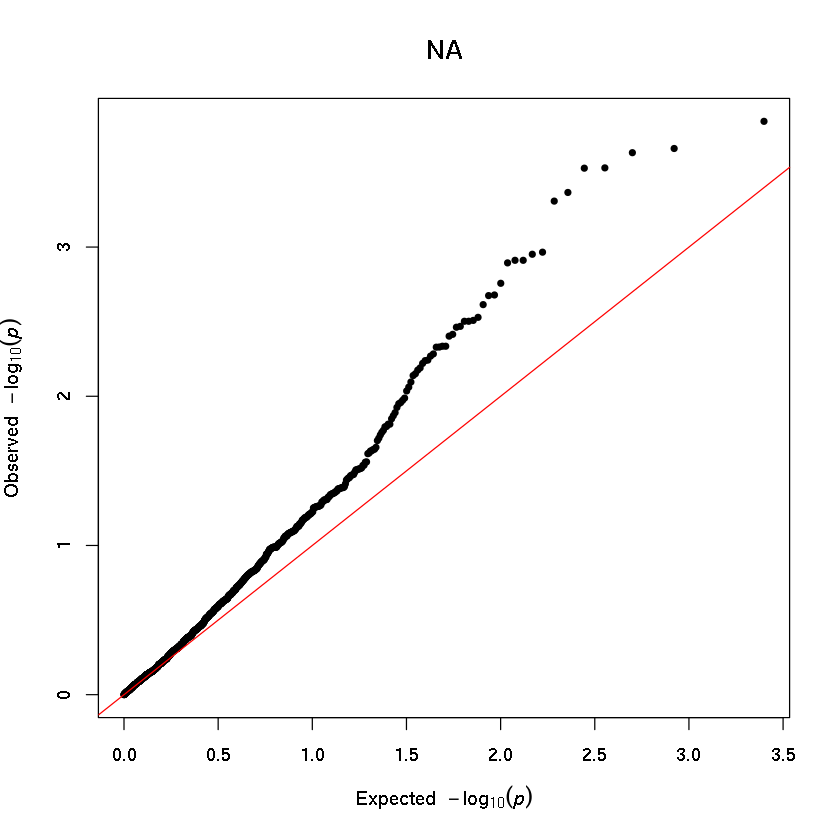

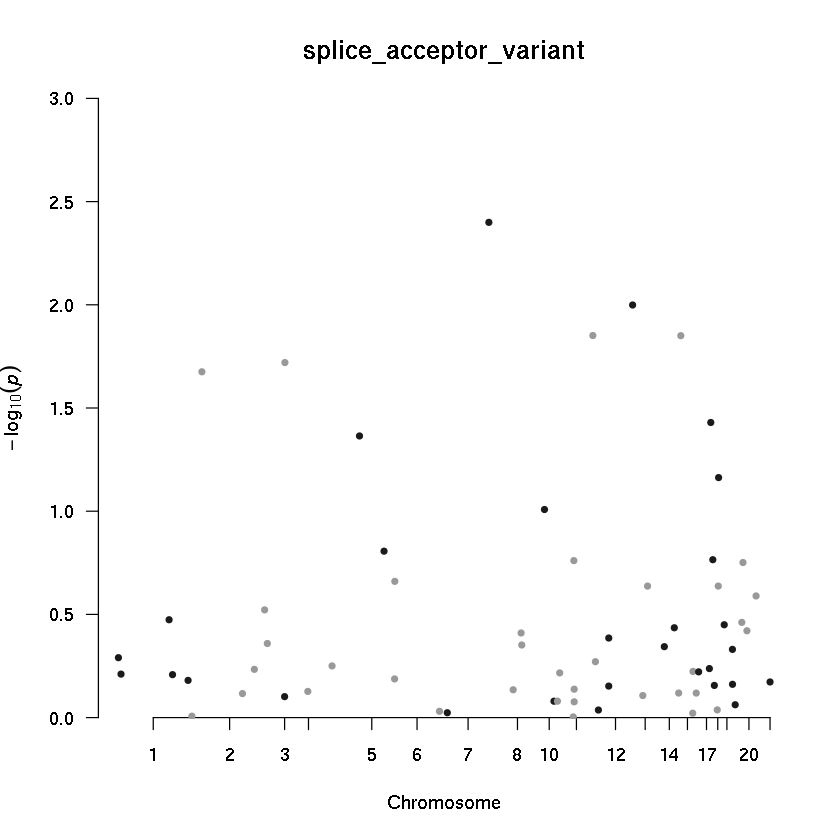

[1] "inframe_insertion"
[1] 93 23


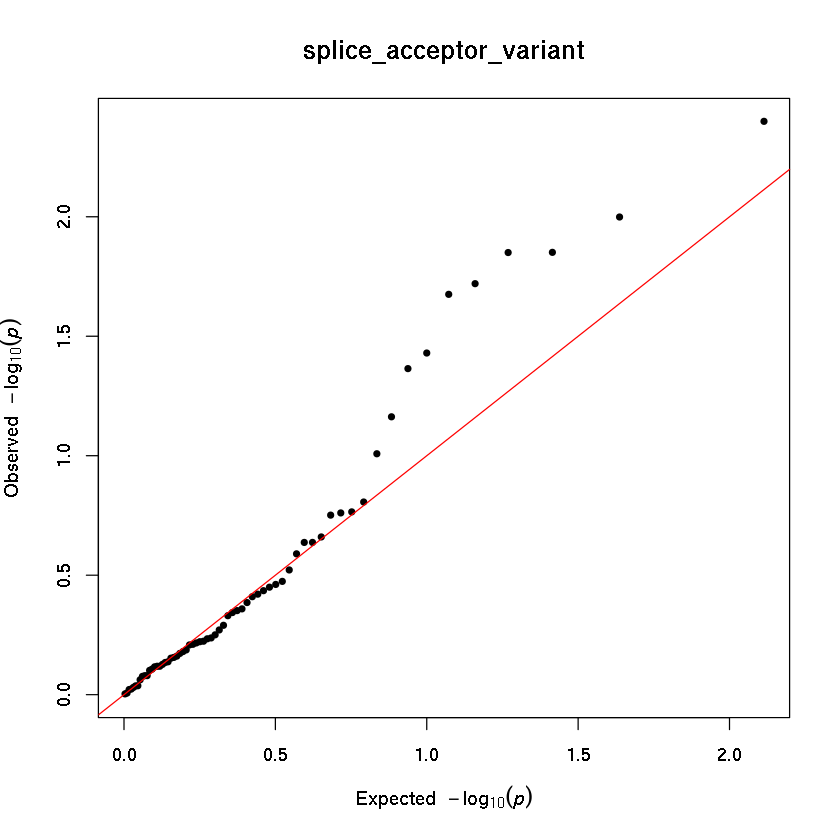

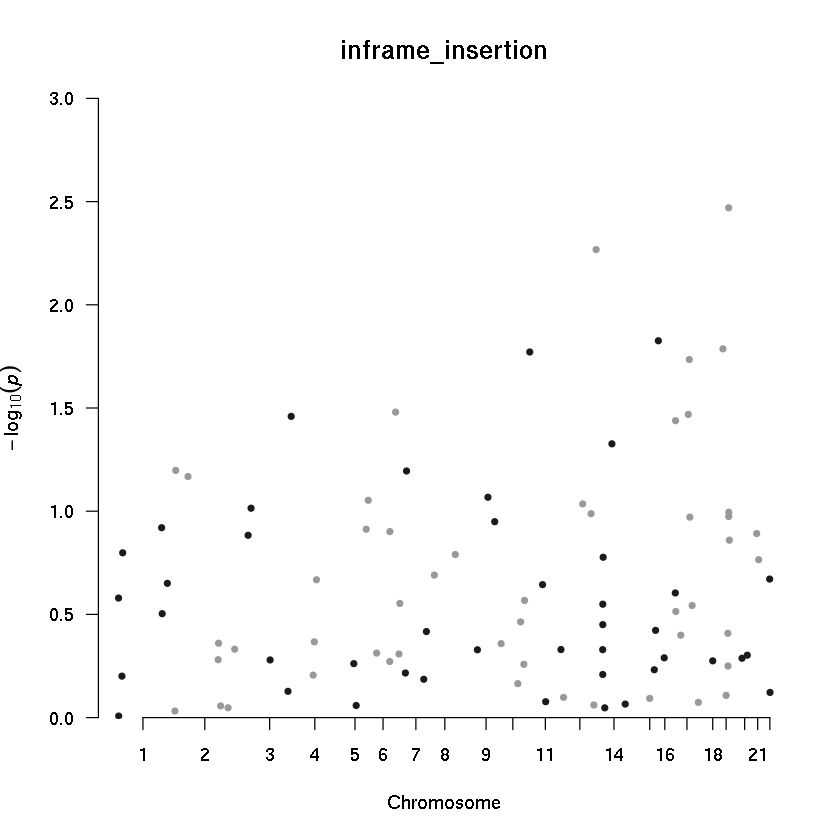

[1] "inframe_deletion"
[1] 151  23


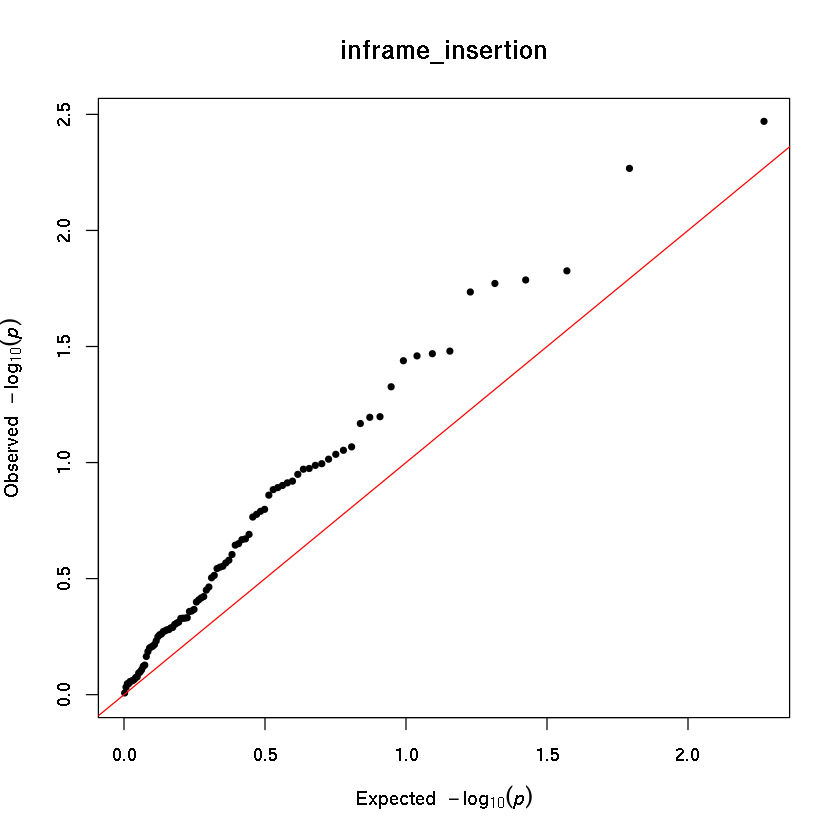

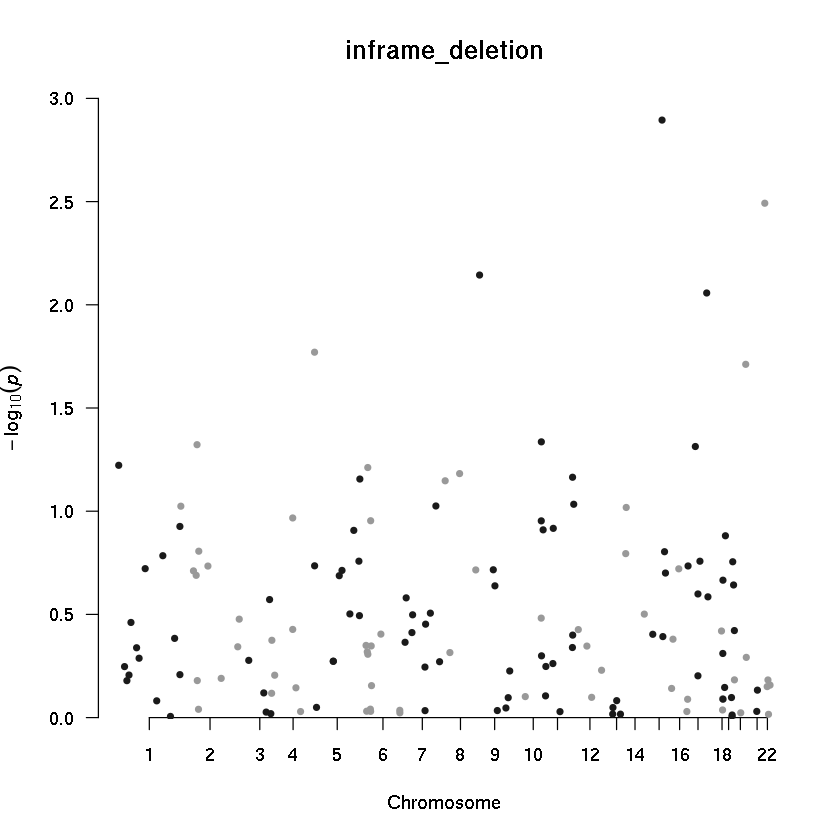

[1] "frameshift_variant"
[1] 185  23


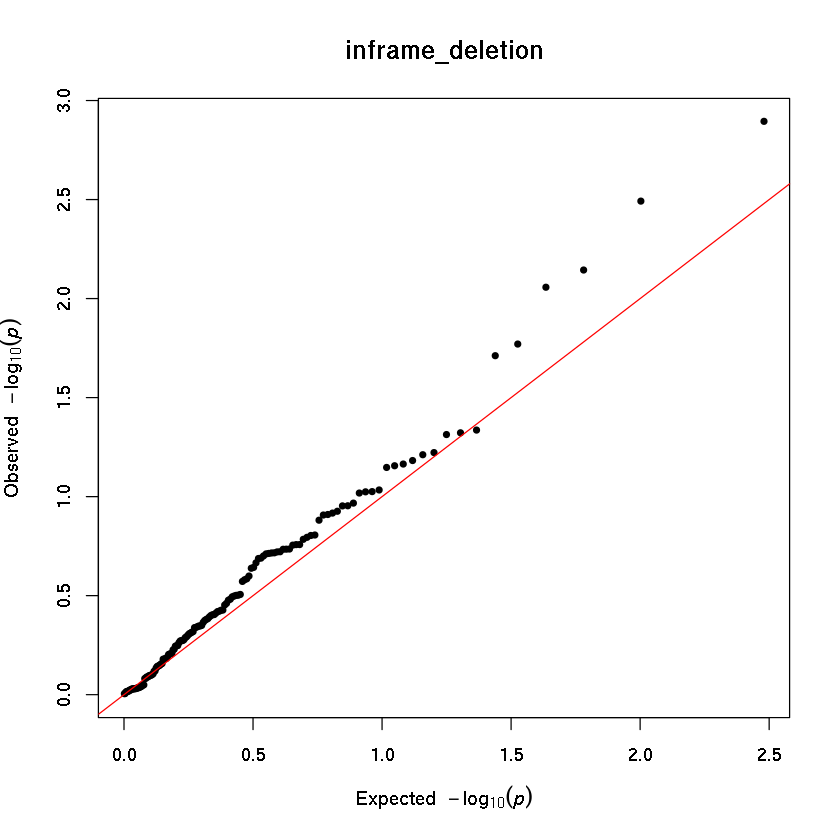

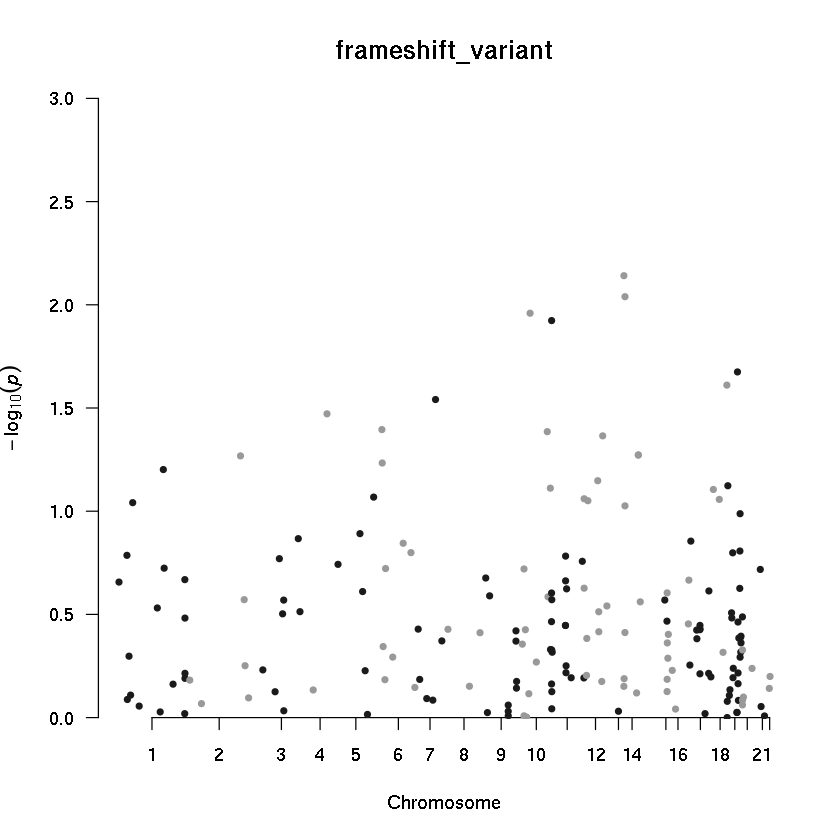

[1] "splice_donor_variant"
[1] 63 23


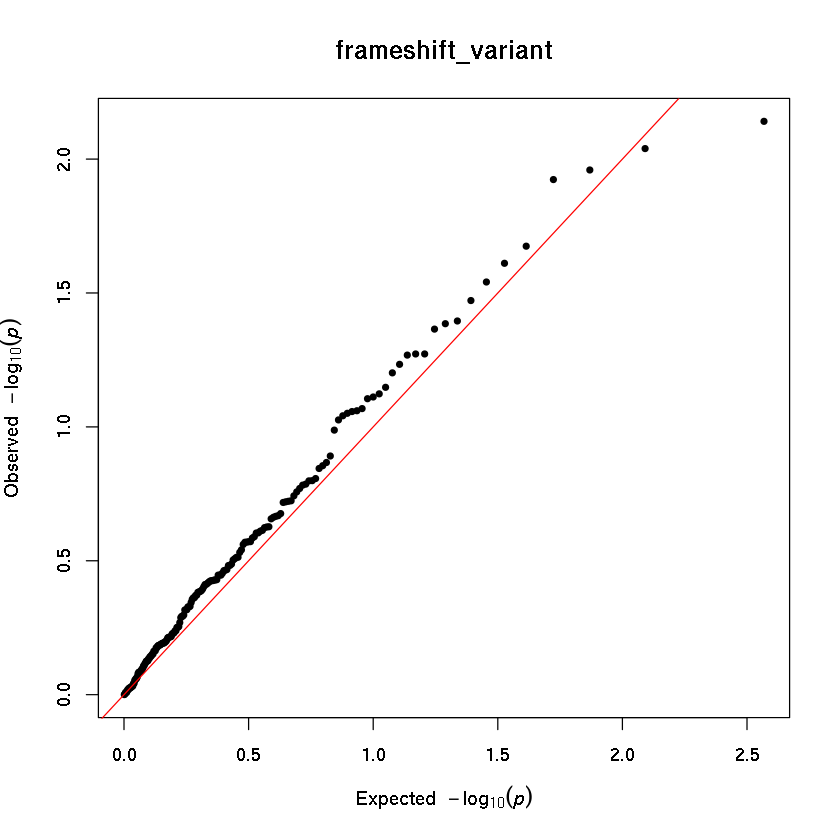

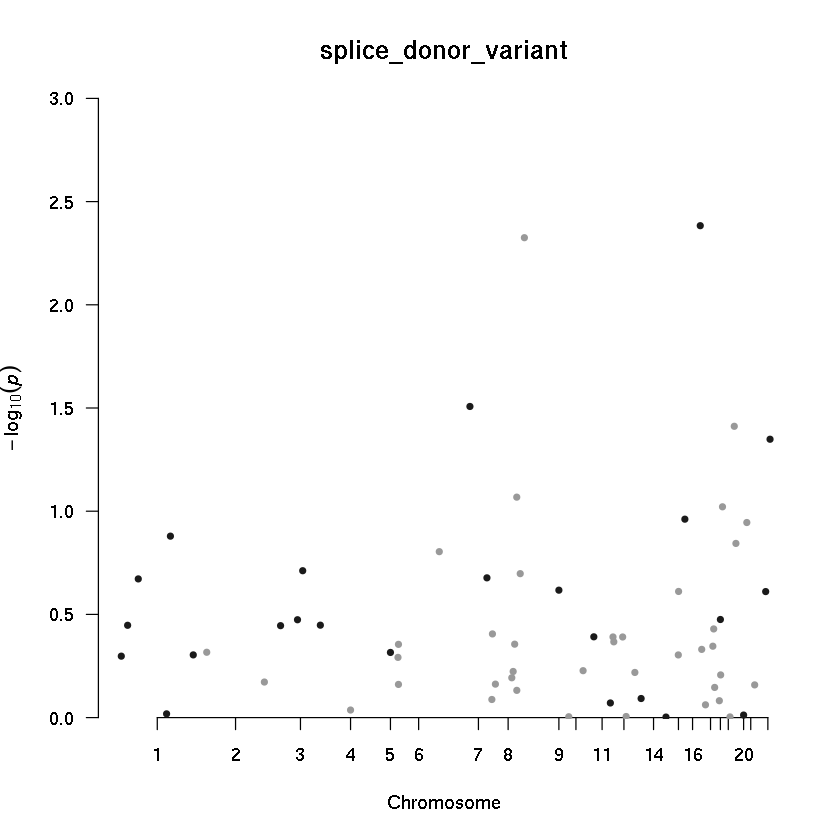

[1] "stop_lost"
[1] 44 23


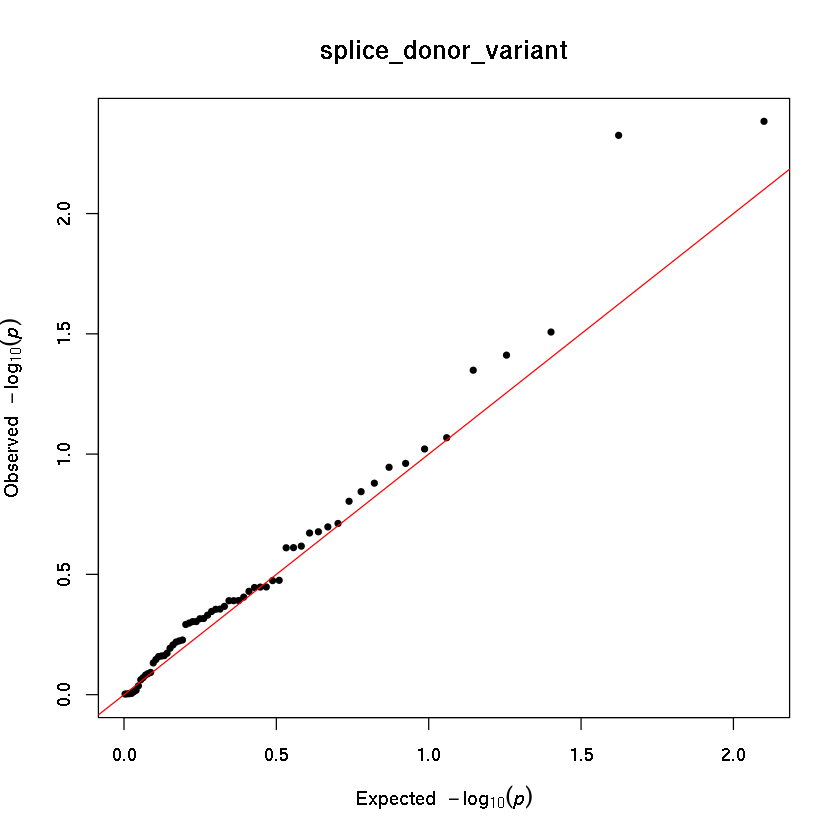

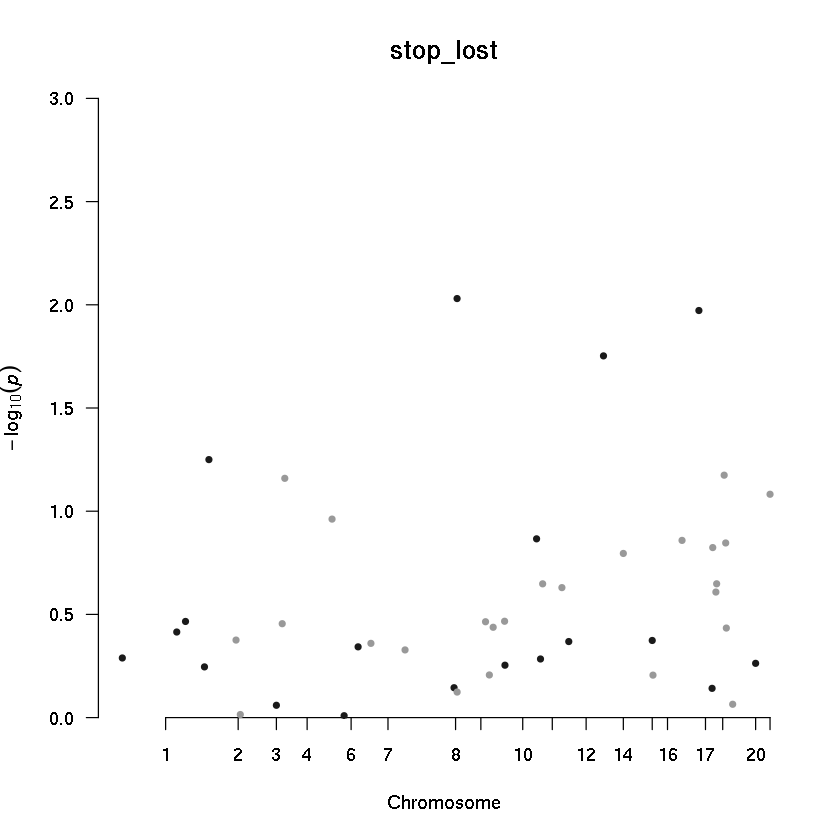

[1] "stop_gained"
[1] 172  23


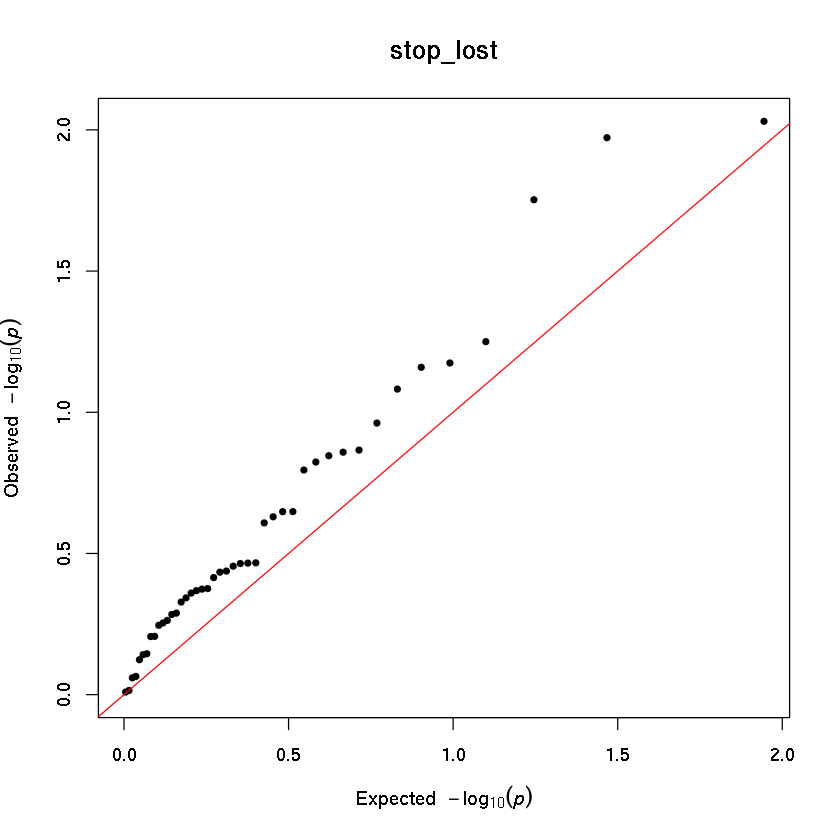

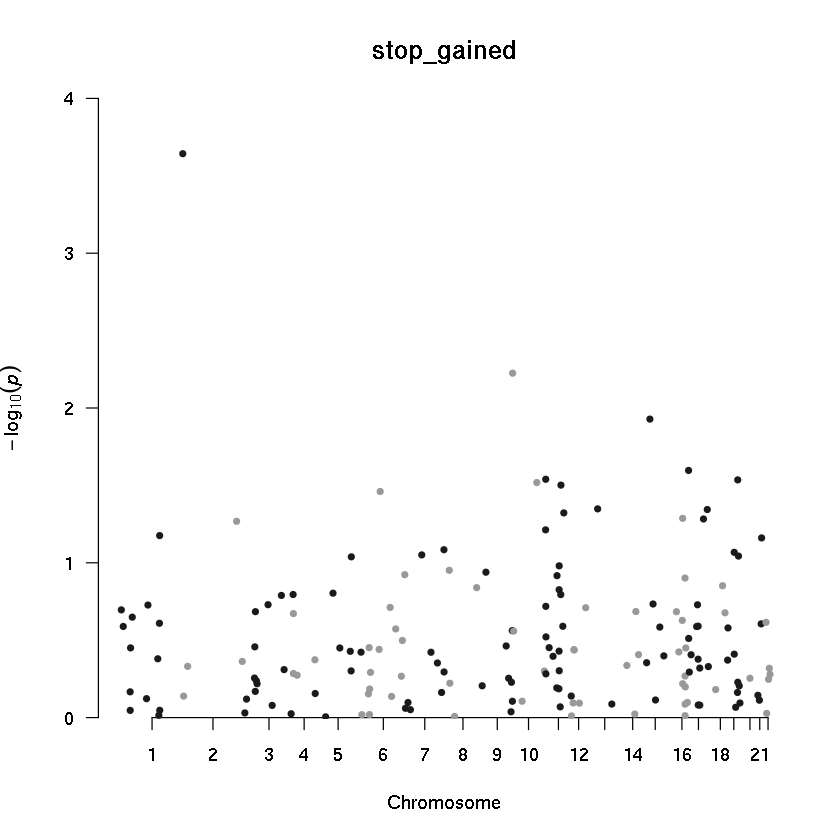

[1] "stop_retained_variant"
[1] 25 23


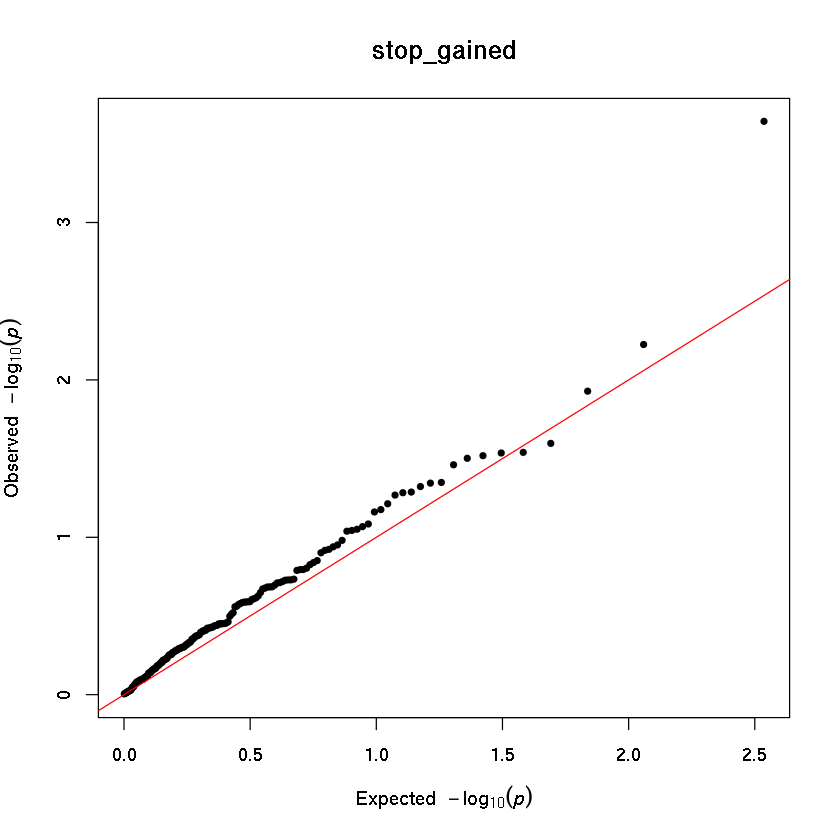

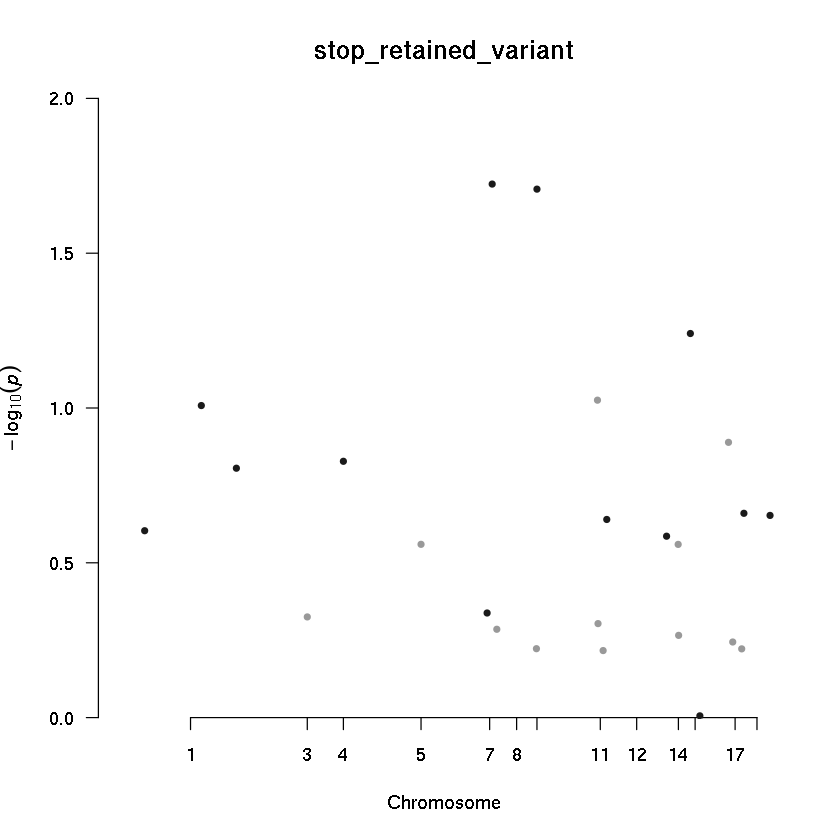

[1] "start_lost"
[1] 61 23


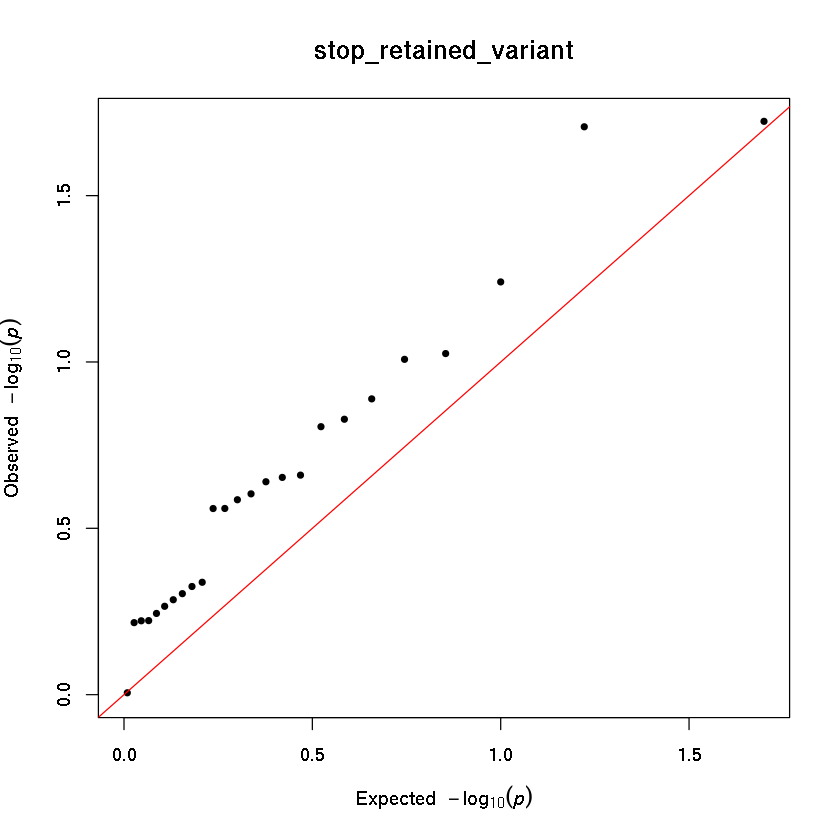

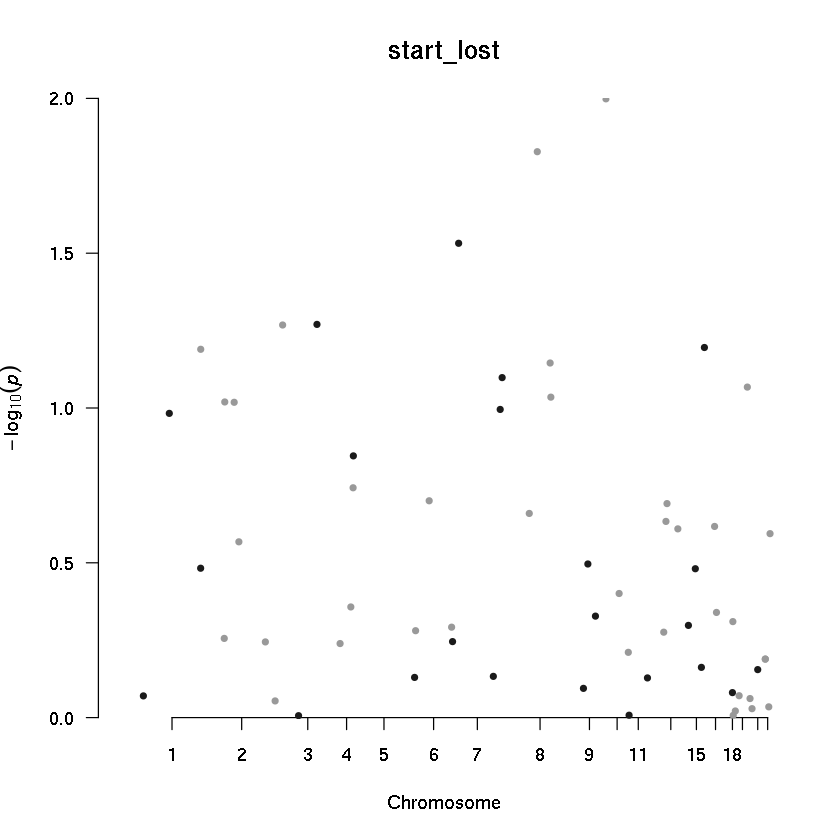

[1] "downstream_gene_variant"
[1] 55 23


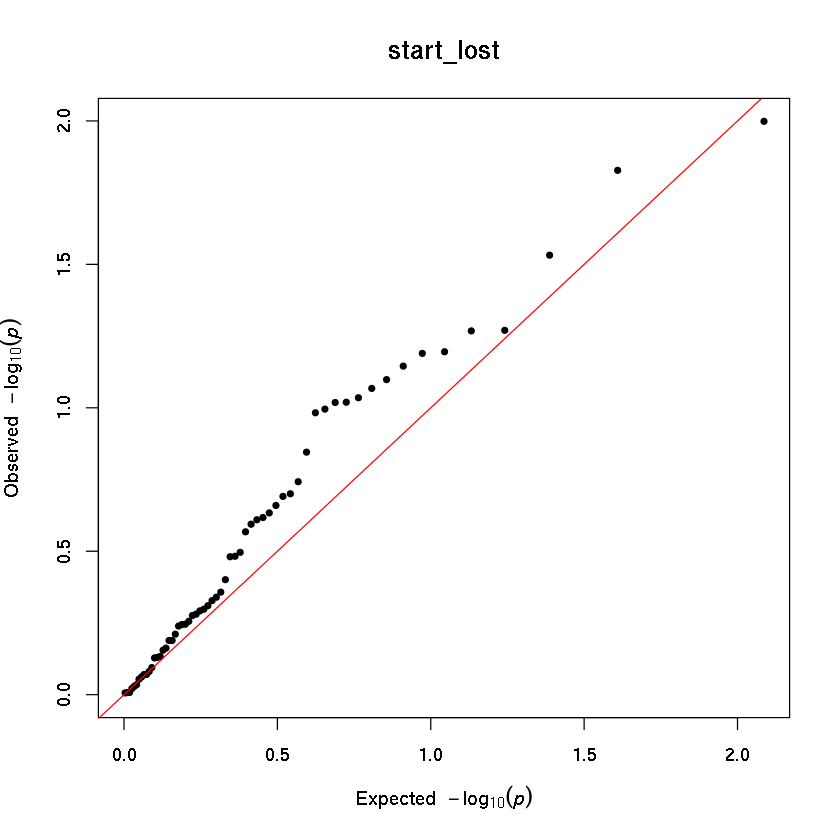

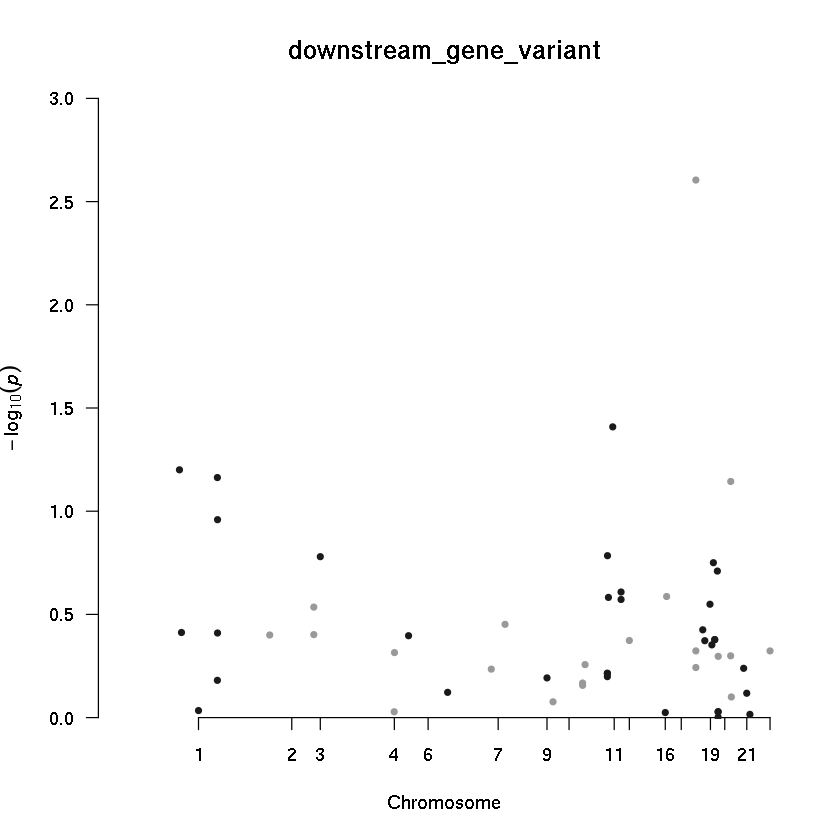

[1] "protein_altering_variant"
[1]  1 23


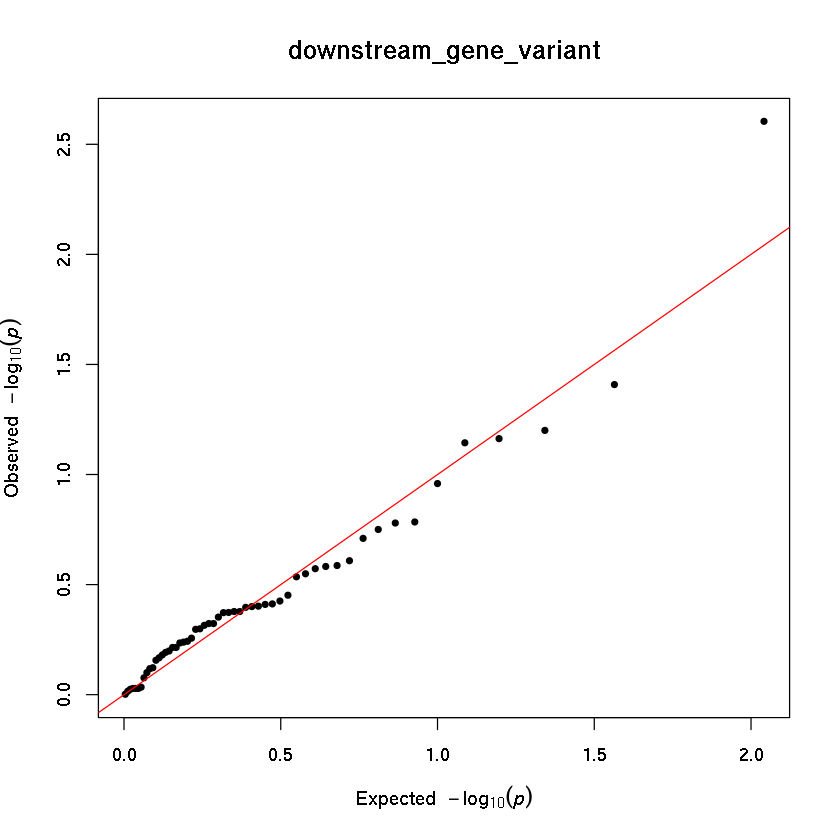

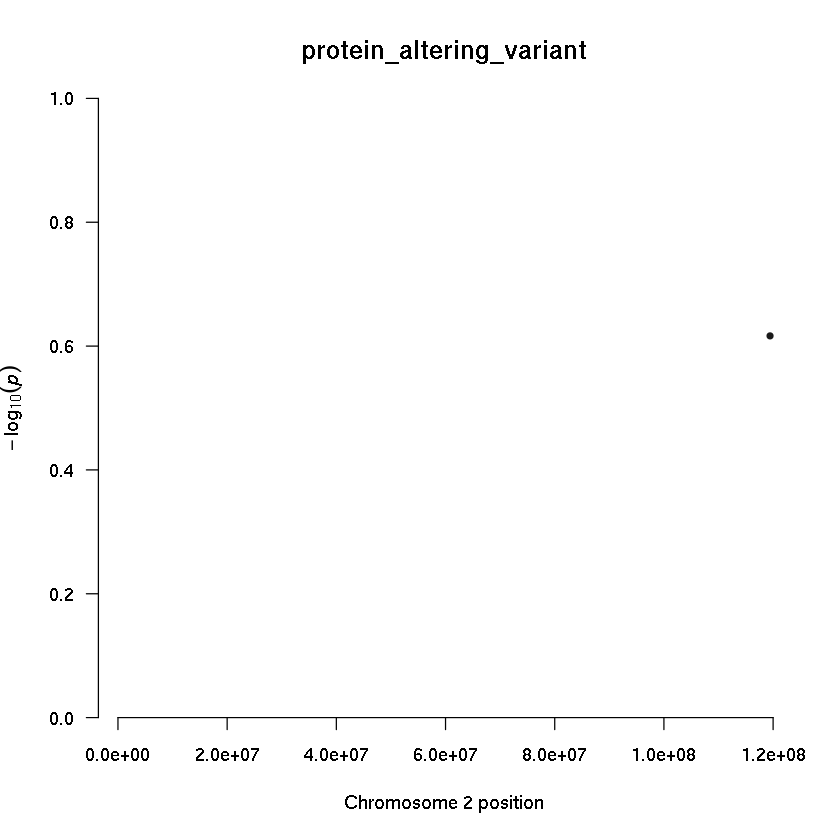

[1] "mature_miR\"\"_variant"
[1]  6 23


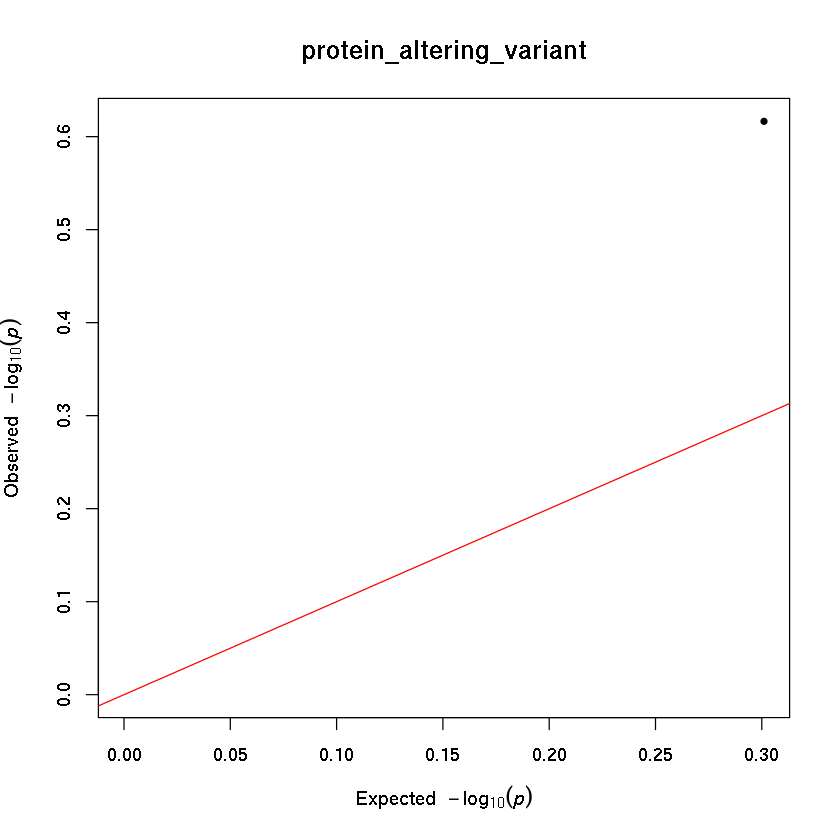

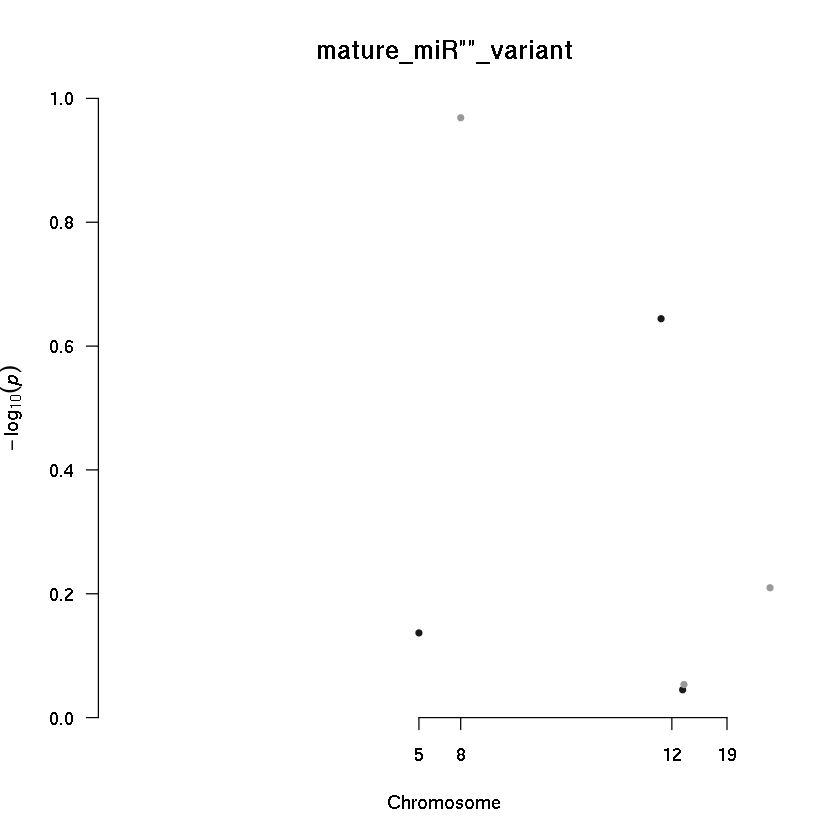

[1] "coding_sequence_variant"
[1]  5 23


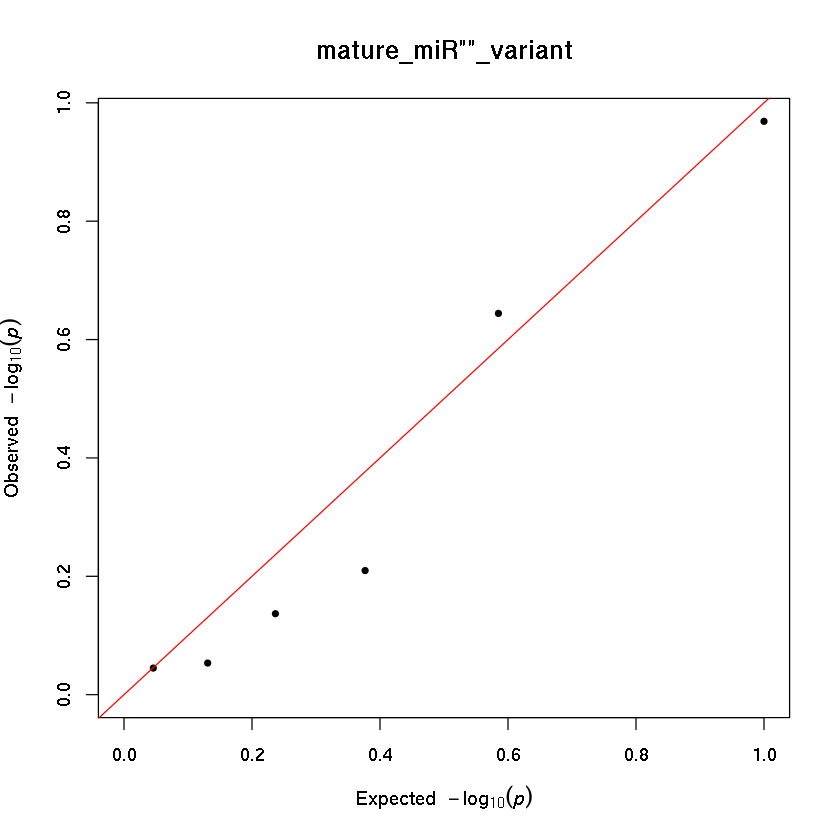

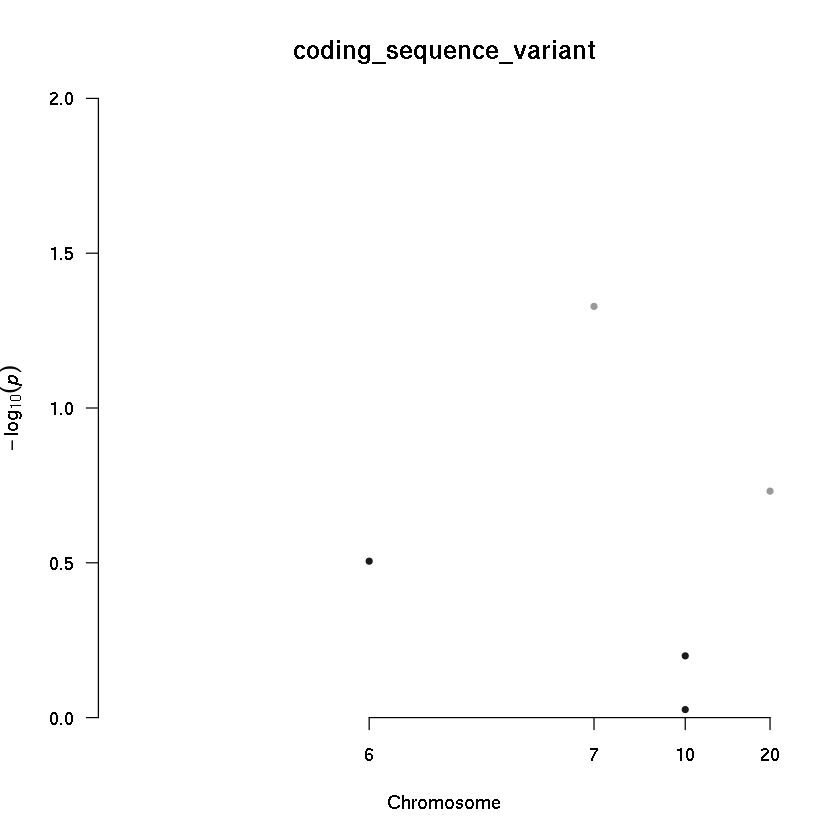

[1] "intergenic_variant"
[1]  4 23


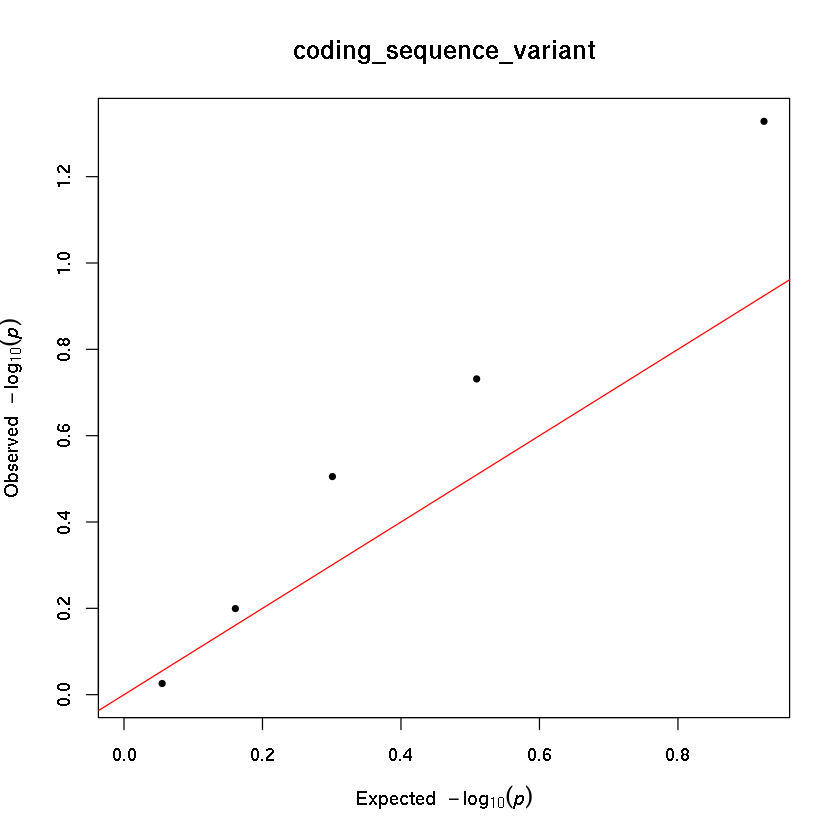

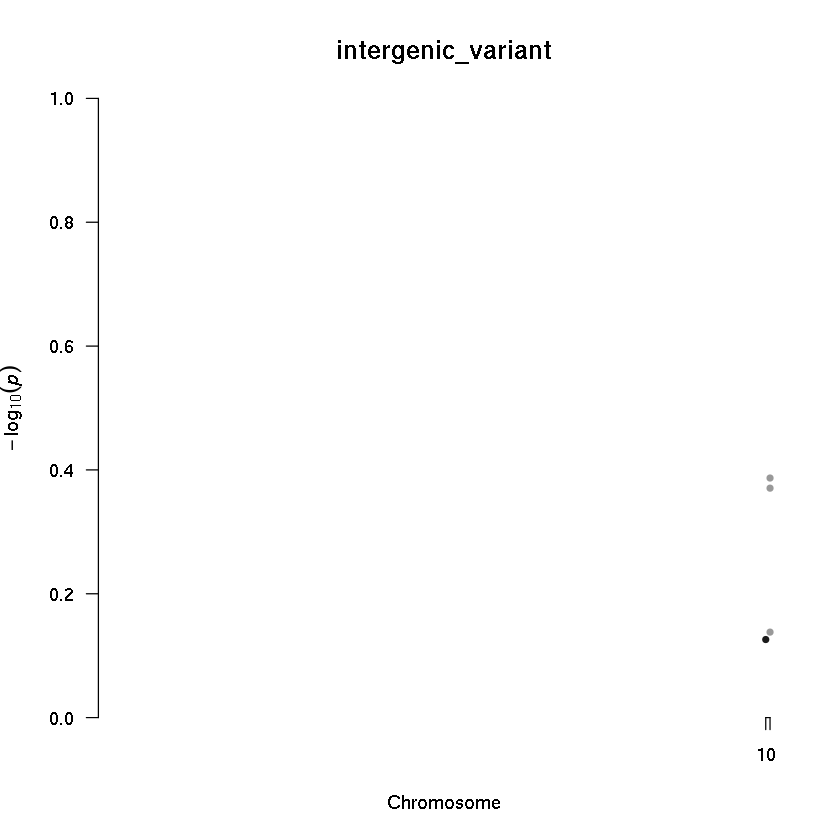

CHR BP     ID           REF ALT A1 FIRTH? TEST OBS_CT OR       ⋯
1:942934:G:C 1   942934 1:942934:G:C G   C   C  N      ADD  1089   1.055120 ⋯
1:944296:G:A 1   944296 1:944296:G:A G   A   G  N      ADD  1089   0.788446 ⋯
1:944307:T:C 1   944307 1:944307:T:C T   C   T  N      ADD  1089   0.797598 ⋯
1:944858:A:G 1   944858 1:944858:A:G A   G   A  N      ADD  1083   0.802427 ⋯
1:952180:A:C 1   952180 1:952180:A:C A   C   A  N      ADD  1089   0.823289 ⋯
1:952421:A:G 1   952421 1:952421:A:G A   G   A  N      ADD  1088   0.737866 ⋯
             ERRCODE SNP          CHROM POS    rsID        Gene           
1:942934:G:C .       1:942934:G:C 1     942934 rs142558220 ENSG00000187634
1:944296:G:A .       1:944296:G:A 1     944296 rs6605067   ENSG00000188976
1:944307:T:C .       1:944307:T:C 1     944307 rs2839      ENSG00000188976
1:944858:A:G .       1:944858:A:G 1     944858 rs3748592   ENSG00000188976
1:952180:A:C .       1:952180:A:C 1     952180 rs3748595   ENSG00000188976
1:952421:A:G .       1:952421:A:G 1     952421 rs3828047   ENSG00000188976
             Consequence        
1:942934:G:C synonymous_variant 
1:944296:G:A 3_prime_UTR_variant
1:944307:T:C 3_prime_UTR_variant
1:944858:A:G intron_variant     
1:952180:A:C intron_variant     
1:952421:A:G synonymous_variant 
             HGVSp                                                                                                                                                                                                                          
1:942934:G:C ENSP00000349216.4:p.Gly388=,ENSP00000342313.3:p.Gly480=,ENSP00000412228.1:p.Gly307=,ENSP00000484643.1:p.Gly372=,ENSP00000482090.1:p.Gly400=,ENSP00000480870.1:p.Gly355=,ENSP00000484256.1:p.Gly418=,ENSP00000482138.1:p.Gly481=
1:944296:G:A                                                                                                                                                                                                                                
1:944307:T:C                                                                                                                                                                                                                                
1:944858:A:G                                                                                                                                                                                                                                
1:952180:A:C                                                                                                                                                                                                                                
1:952421:A:G ENSP00000317992.6:p.Thr394=                                                                                                                                                                                                    
             LoF Gene_symbol
1:942934:G:C     SAMD11     
1:944296:G:A     NOC2L      
1:944307:T:C     NOC2L      
1:944858:A:G     NOC2L      
1:952180:A:C     NOC2L      
1:952421:A:G     NOC2L

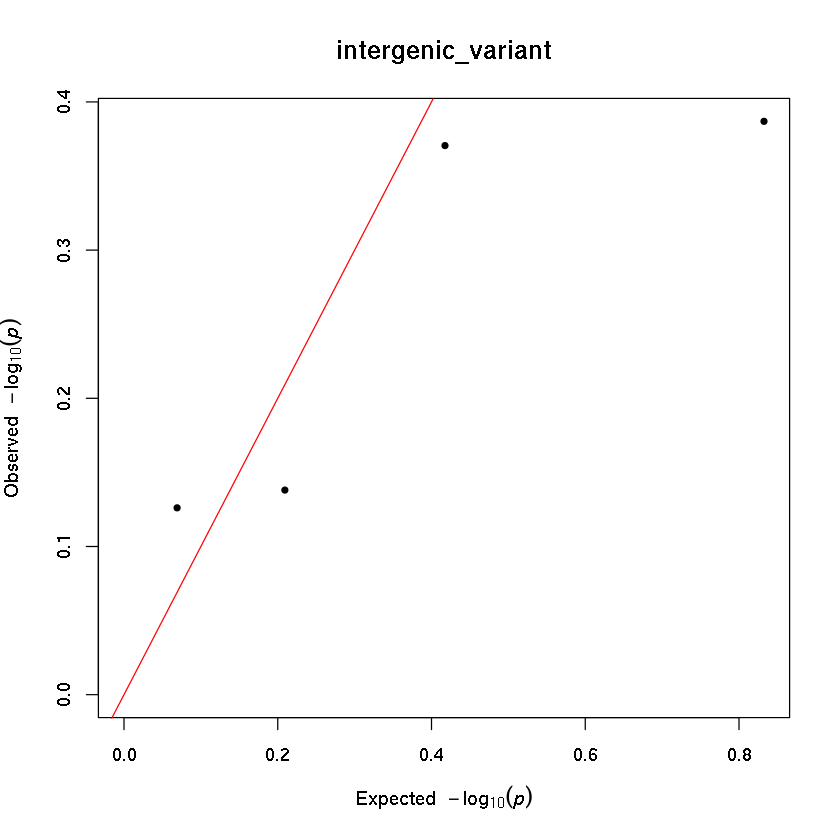

In [6]:
gwasres = parse_gwasres(
    "intra_others_eu_beds_v2/age_adj_gwas_no_exclude_10pcs.class.glm.logistic.hybrid",
    annots_m)
gwasres = gwasres[!is.na(gwasres$P),]
gwasres$Consequence[is.na(gwasres$Consequence)] = "NA"
for(cons in unique(gwasres$Consequence)){
    currd = gwasres[cons == gwasres$Consequence,]
    print(cons)
    print(dim(currd))
    try({
        manhattan(currd,annotateTop=F,annotatePval=5e-8,snp="Gene_symbol",main=cons)
        qq(currd$P,main=cons) 
    })
}
head(gwasres)

In [30]:
df = data.frame(
    logp = -log10(gwasres$P),or = gwasres$OR,cons = gwasres$Consequence
)
summary(lm(logp~cons,data=df))
summary(lm(or~cons,data=df))


Call:
lm(formula = logp ~ cons, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5729 -0.3576 -0.1596  0.1835 24.4697 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.505214   0.007963  63.448   <2e-16
cons5_prime_UTR_variant                -0.010865   0.013529  -0.803   0.4219
conscoding_sequence_variant            -0.051865   0.239223  -0.217   0.8284
consdownstream_gene_variant            -0.010203   0.073867  -0.138   0.8901
consframeshift_variant                 -0.107989   0.044661  -2.418   0.0156
consincomplete_terminal_codon_variant  -0.117398   0.534682  -0.220   0.8262
consinframe_deletion                    0.068666   0.049449   1.389   0.1650
consinframe_insertion                  -0.022716   0.063946  -0.355   0.7224
consintergenic_variant                 -0.291284   0.267430  -1.089   0.2761
consintron_variant                      0.003117   0.008772   0.355   0.7223



Call:
lm(formula = or ~ cons, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6695 -0.1378 -0.0237  0.1084  6.7502 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             1.0327601  0.0032595 316.842   <2e-16
cons5_prime_UTR_variant                -0.0062779  0.0055383  -1.134   0.2570
conscoding_sequence_variant            -0.1628975  0.0979275  -1.663   0.0962
consdownstream_gene_variant             0.0449854  0.0302377   1.488   0.1368
consframeshift_variant                 -0.0153416  0.0182824  -0.839   0.4014
consincomplete_terminal_codon_variant  -0.1540011  0.2188754  -0.704   0.4817
consinframe_deletion                   -0.0025221  0.0202424  -0.125   0.9008
consinframe_insertion                  -0.0222988  0.0261766  -0.852   0.3943
consintergenic_variant                 -0.0691571  0.1094741  -0.632   0.5276
consintron_variant                     -0.0014120  0.0035907  -0.393 

In [3]:
# Add the gnomad ref
gnomad_ref = fread(
    "/oak/stanford/groups/euan/projects/elite/ukbb_exome/elite_filtered_vcfs/comp_freq_with_gnomad.all.tsv",
    data.table=F,stringsAsFactors=F)
head(gnomad_ref)

#CHROM ID            REF ALT ALT_FREQS  OBS_CT AF_fin     
1 1      1:10492:C:T   C   T   0.0542169  166    0.0106199  
2 1      1:13273:G:C   G   C   0.177165   508    0.226696   
3 1      1:13289:CCT:C CCT C   0.00398406 502    0.000814553
4 1      1:14671:G:C   G   C   0.00943396 424    0.00722146 
5 1      1:14907:A:G   A   G   0.341346   208    0.387016   
6 1      1:14930:A:G   A   G   0.402062   194    0.298551   
  P_fin                AF_nfe     P_nfe             
1 3.37410729853613e-07 0.0239781  0.0218455313158744
2 0.00896685962448678  0.216508   0.0358060066230697
3 0.158753685148409    0.00327099 1                 
4 0.801600026494123    0.0151766  0.442126660101954 
5 0.200151962442784    0.368029   0.467801624694257 
6 0.00212590291319842  0.332197   0.0466109375842625

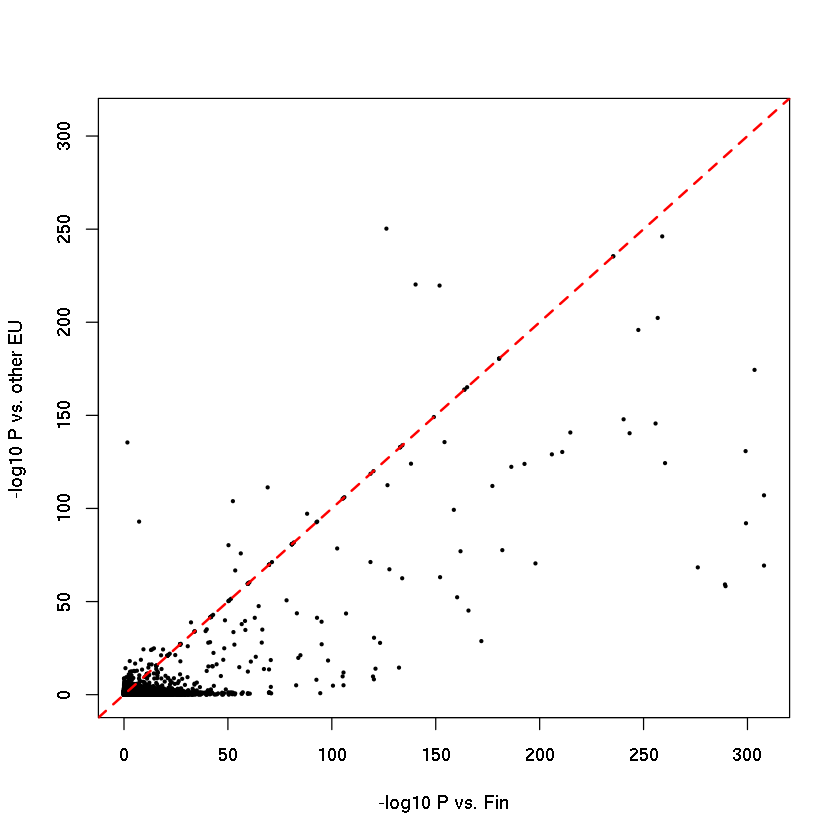

In [4]:
gnomad_ref_raw = gnomad_ref
gnomad_ref = gnomad_ref[gnomad_ref[["ID"]] %in% gwasres[["ID"]],]
rownames(gnomad_ref) = gnomad_ref[["ID"]]
#gnomad_shared = intersect(rownames(gnomad_ref),gwasres[["ID"]])
#length(gnomad_shared)
plot(-log10(as.numeric(gnomad_ref[["P_fin"]])),
     -log10(as.numeric(gnomad_ref[["P_nfe"]])),pch=20,cex=0.5,
    xlab = "-log10 P vs. Fin",ylab = "-log10 P vs. other EU")
abline(0,1,lwd=2,lty=2,col="red")

In [26]:
dim(gnomad_ref)
dim(gwasres)
gwasres = gwasres[gwasres[["ID"]] %in% gnomad_ref[["ID"]],]
rownames(gwasres) = gwasres[["ID"]]

[1] 72194    10

[1] 72195    14

Warning message in manhattan(gwasres2):
“No SNP column found. OK unless you're trying to highlight.”

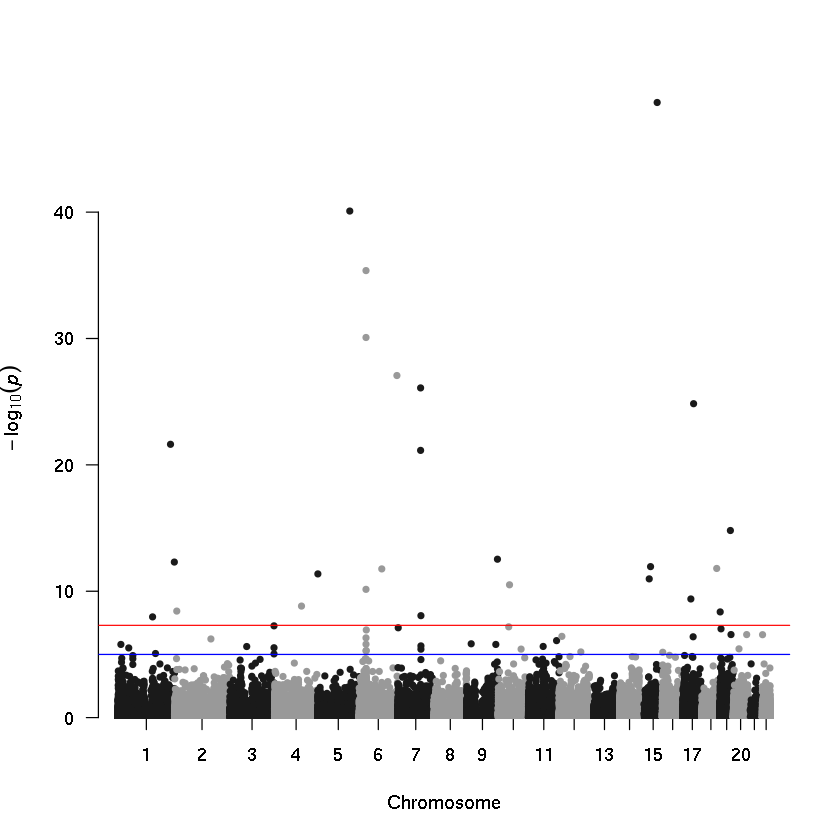

In [27]:
gnomad_ref = gnomad_ref[rownames(gwasres),]
gwasres2 = gwasres
gwasres2$P = pmax(as.numeric(gwasres$P),as.numeric(gnomad_ref[["P_nfe"]]))
gwasres2 = gwasres2[!is.na(gwasres2$P),]
manhattan(gwasres2)

In [28]:
selected_res = gwasres2[as.numeric(gwasres2$P)<5e-08,]
print(selected_res)

                   CHR        BP                 ID  REF ALT A1 FIRTH? TEST
15:78774757:G:C     15  78774757    15:78774757:G:C    G   C  C      N  ADD
5:141201394:T:G      5 141201394    5:141201394:T:G    T   G  G      N  ADD
6:167373202:G:A      6 167373202    6:167373202:G:A    G   A  A      N  ADD
6:31356399:C:G       6  31356399     6:31356399:C:G    C   G  G      N  ADD
7:101035412:T:C      7 101035412    7:101035412:T:C    T   C  C      N  ADD
6:31356203:A:G       6  31356203     6:31356203:A:G    A   G  G      N  ADD
7:101036479:G:A      7 101036479    7:101036479:G:A    G   A  A      N  ADD
17:47137265:G:A     17  47137265    17:47137265:G:A    G   A  A      N  ADD
1:231217589:G:GA     1 231217589   1:231217589:G:GA    G  GA GA      N  ADD
1:248039172:A:G      1 248039172    1:248039172:A:G    A   G  G      N  ADD
19:45795906:CCCT:C  19  45795906 19:45795906:CCCT:C CCCT   C  C      N  ADD
9:135098020:G:GA     9 135098020   9:135098020:G:GA    G  GA GA      N  ADD
15:49634796:

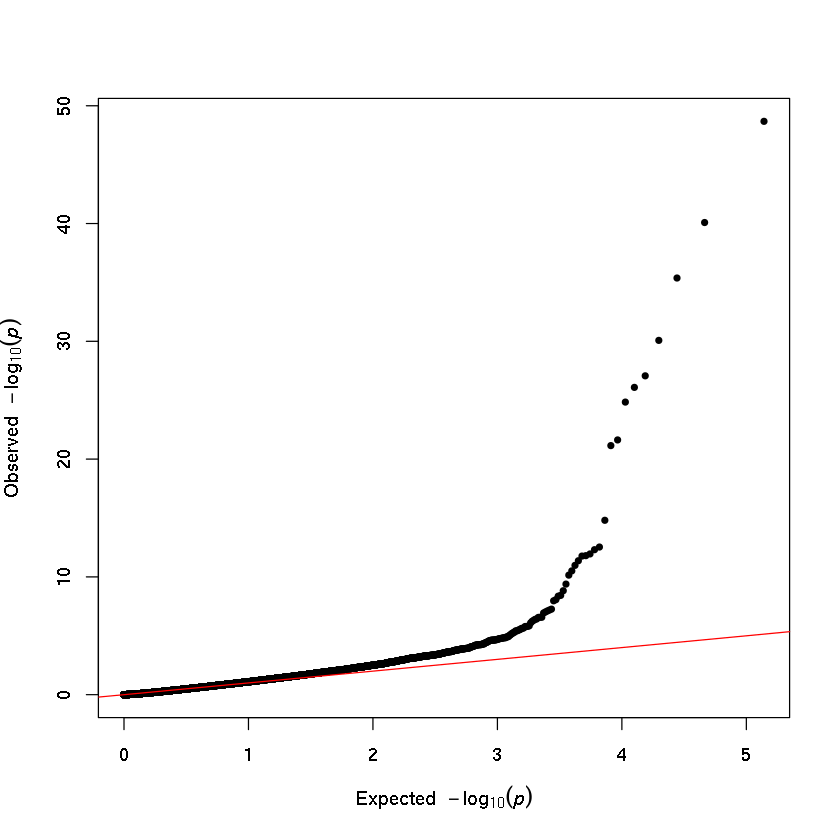

In [29]:
qq(gwasres2$P)

[1] 1

[1] 1.262464e-308

Warning message in manhattan(gwasres3):
“No SNP column found. OK unless you're trying to highlight.”

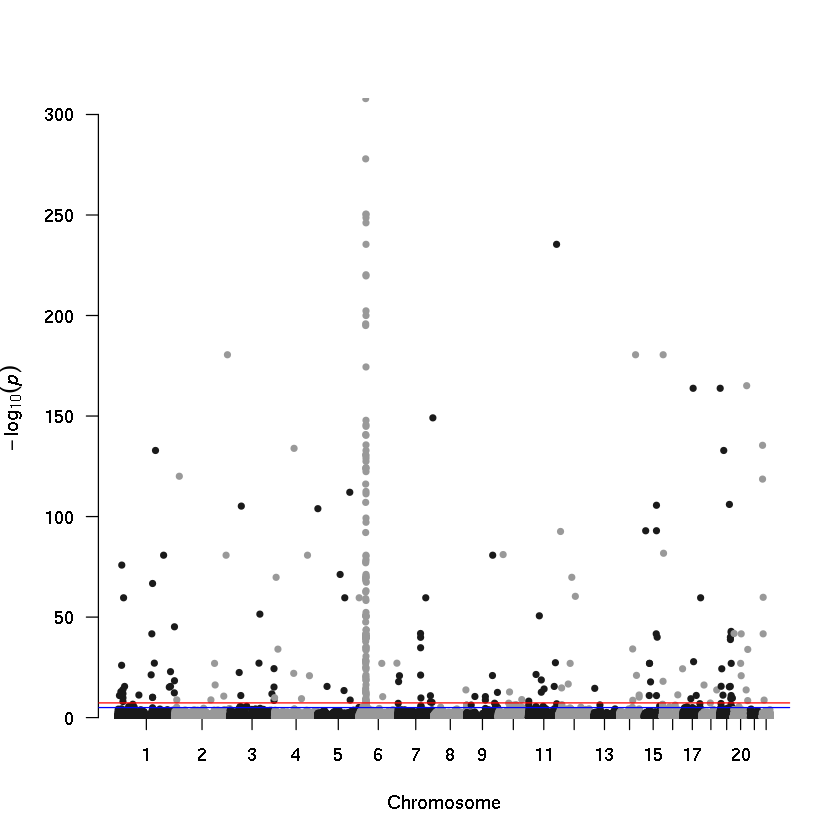

In [46]:
gwasres3 = gwasres
gwasres3$P = as.numeric(gnomad_ref[["P_nfe"]])
#head(gwasres3)
names(gwasres3)[ncol(gwasres3)] = "P"
gwasres3$P = as.numeric(gwasres3$P)
#hist(gwasres3$P)
gwasres3 = gwasres3[!is.na(gwasres3$P),]
gwasres3$P[gwasres3$P==1] = 1 - 1e-40
gwasres3$P[gwasres3$P==0] = 1e-40
max(gwasres3$P)
min(gwasres3$P)
manhattan(gwasres3)

In [50]:
selected_res = gwasres3[as.numeric(gwasres3$P)<5e-08,]
print(selected_res)

                               CHR        BP                             ID
15:78774757:G:C                 15  78774757                15:78774757:G:C
5:141201394:T:G                  5 141201394                5:141201394:T:G
7:101035412:T:C                  7 101035412                7:101035412:T:C
7:101036479:G:A                  7 101036479                7:101036479:G:A
17:47137265:G:A                 17  47137265                17:47137265:G:A
1:231217589:G:GA                 1 231217589               1:231217589:G:GA
1:248039172:A:G                  1 248039172                1:248039172:A:G
19:45795906:CCCT:C              19  45795906             19:45795906:CCCT:C
9:135098020:G:GA                 9 135098020               9:135098020:G:GA
15:49634796:TA:T                15  49634796               15:49634796:TA:T
15:43799153:A:T                 15  43799153                15:43799153:A:T
18:65762831:G:GA                18  65762831               18:65762831:G:GA
5:837438:C:G

# gnomAD analysis

In [5]:
gnomad_ref_filtered = gnomad_ref_raw[as.numeric(gnomad_ref_raw[["AF_nfe"]])>0.05,]
dim(gnomad_ref_filtered)

Warning message in `[.data.frame`(gnomad_ref_raw, as.numeric(gnomad_ref_raw[["AF_nfe"]]) > :
“NAs introduced by coercion”

[1] 2403007      10

In [6]:
head(gnomad_ref_filtered)

#CHROM ID          REF ALT ALT_FREQS OBS_CT AF_fin   P_fin               
2  1      1:13273:G:C G   C   0.177165  508    0.226696 0.00896685962448678 
5  1      1:14907:A:G A   G   0.341346  208    0.387016 0.200151962442784   
6  1      1:14930:A:G A   G   0.402062  194    0.298551 0.00212590291319842 
14 1      1:61987:A:G A   G   0.405488  328    0.521868 3.1239294661264e-05 
15 1      1:61989:G:C G   C   0.405488  328    0.522977 2.61236785961324e-05
16 1      1:62203:T:C T   C   0.327731  238    0.435343 0.0010268809190949  
   AF_nfe   P_nfe               
2  0.216508 0.0358060066230697  
5  0.368029 0.467801624694257   
6  0.332197 0.0466109375842625  
14 0.539746 1.41354319344235e-06
15 0.539839 1.3892778163749e-06 
16 0.492276 5.3663679572089e-07

In [9]:
colnames(gnomad_ref_filtered)[1] = "CHR"
colnames(gnomad_ref_filtered)[ncol(gnomad_ref_filtered)] = "P"
pos = sapply(gnomad_ref_filtered[["ID"]],function(x)strsplit(x,split=":")[[1]][2])
gnomad_ref_filtered$POS = pos

In [12]:
gnomad_ref_filtered$BP = as.numeric(gnomad_ref_filtered$POS)
gnomad_ref_filtered$CHR = as.numeric(gnomad_ref_filtered$CHR)
gnomad_ref_filtered$P = as.numeric(gnomad_ref_filtered$P)

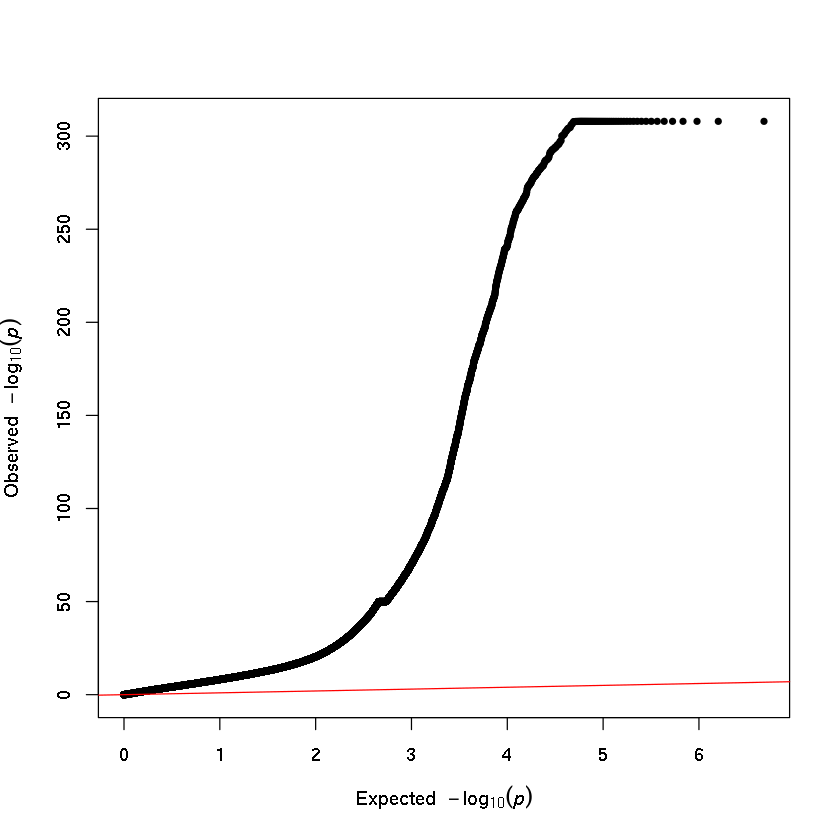

In [15]:
gnomad_ref_filtered = gnomad_ref_filtered[!is.na(gnomad_ref_filtered$P),]
gnomad_ref_filtered$P[gnomad_ref_filtered$P==1] = 1-1e-50
gnomad_ref_filtered$P[gnomad_ref_filtered$P==0] = 1e-50
qq(gnomad_ref_filtered$P)